# PROJECT 1: Random Graphs and Random Walks

Importing Packages

In [3]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



## I. Generating Random Networks 

### 1. Random Networks Using Erdos-Renyi (ER) Model 

#### (a) & (b)




ER GRAPH WITH N = 1000 AND P = 0.003

Number of Vertices: 1000
Number of Edges: 1477

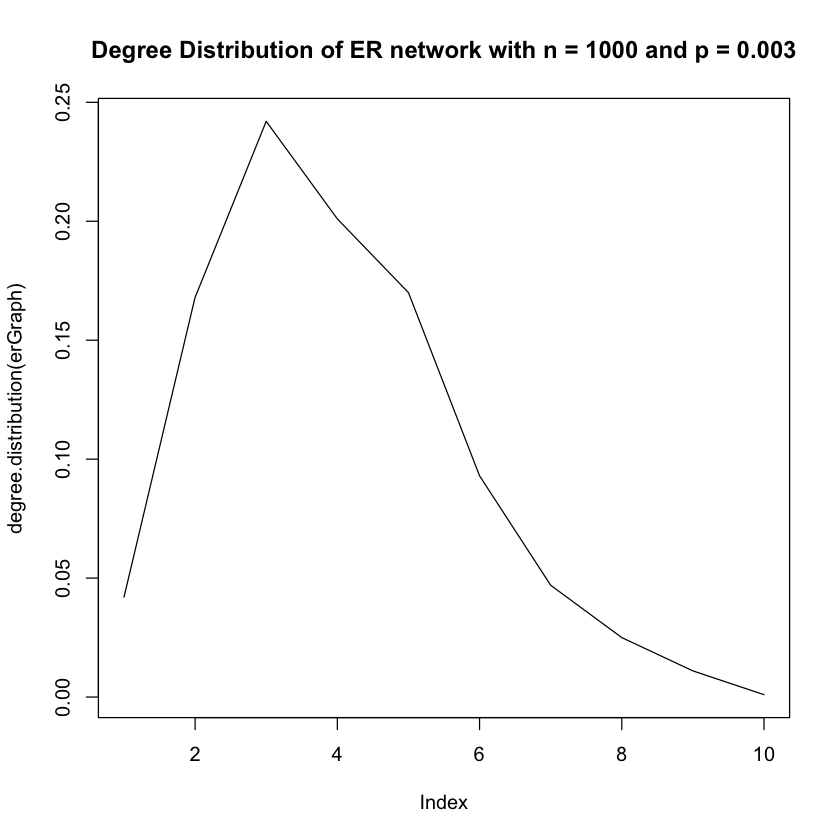

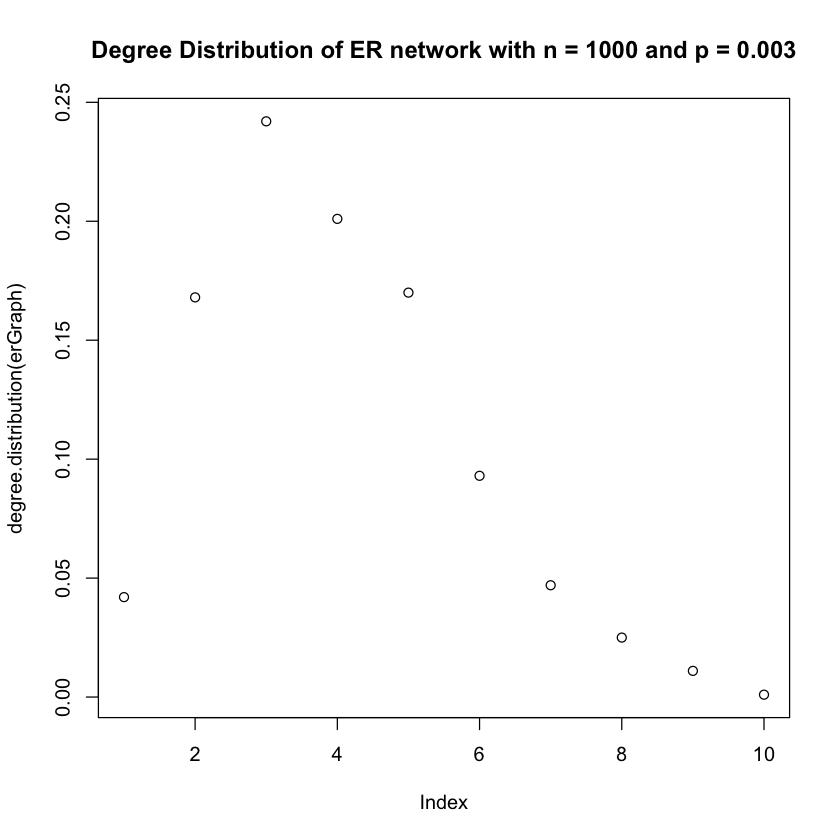


Mean: 2.954
Variance: 2.96885285285285

This graph is Not Connected

Size of GCC: 939
Normalized Size of GCC: 0.939
Number of Edges in GCC: 1467
Diameter of GCC is  16


ER GRAPH WITH N = 1000 AND P = 0.004

Number of Vertices: 1000
Number of Edges: 1901

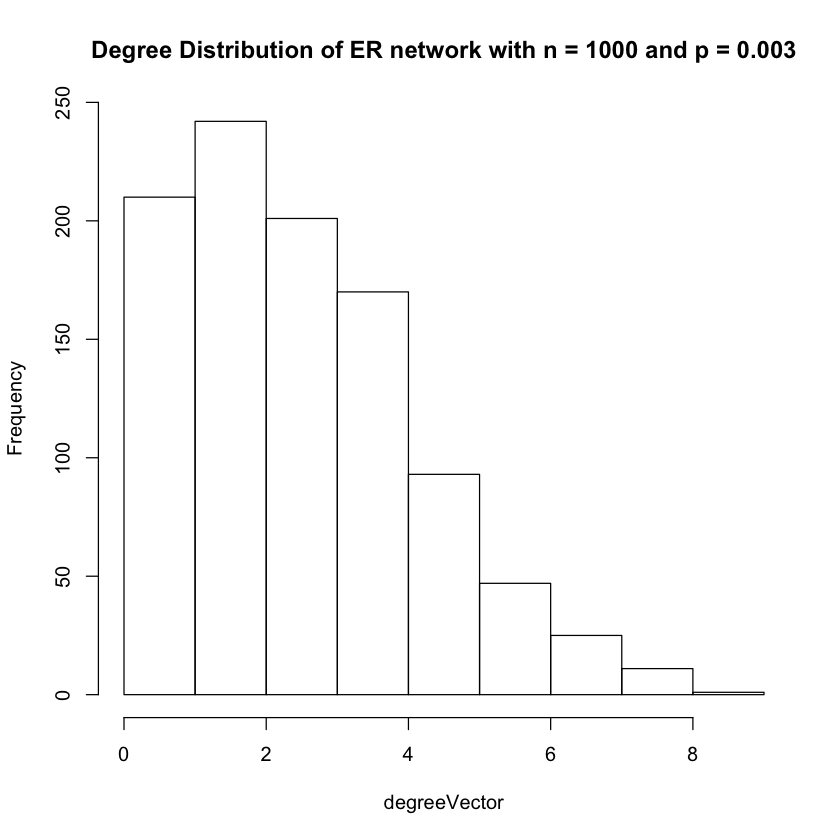

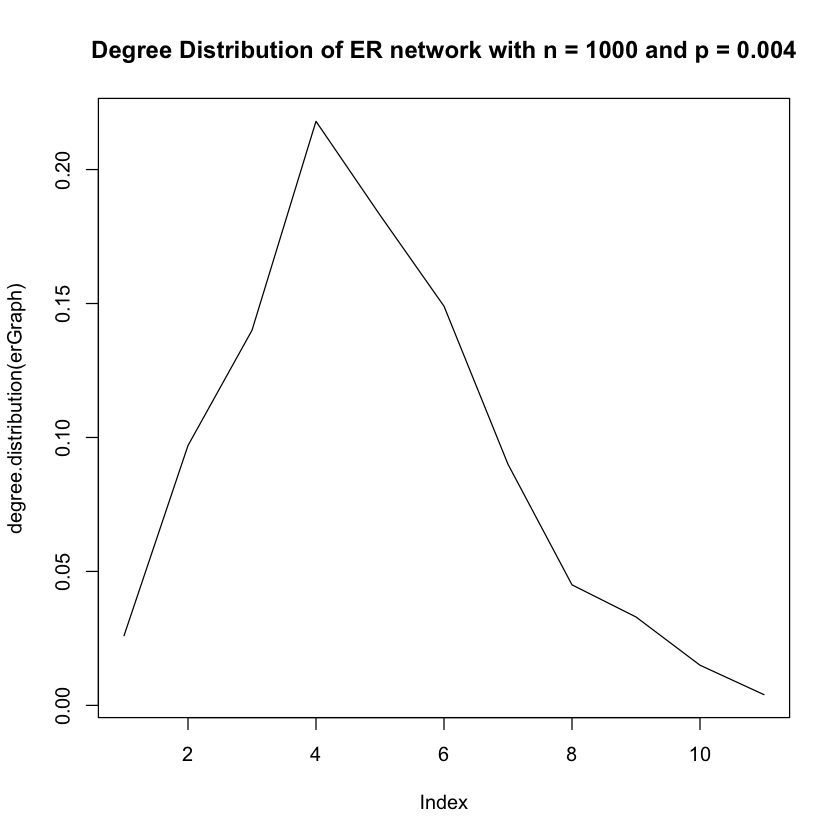

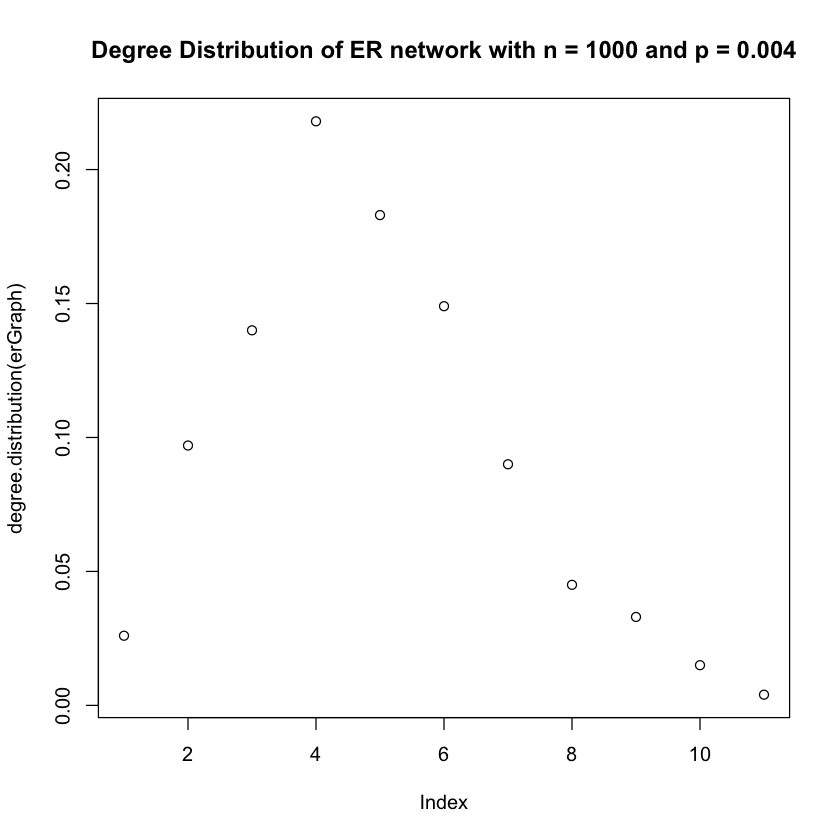


Mean: 3.802
Variance: 3.99278878878879

This graph is Not Connected

Size of GCC: 972
Normalized Size of GCC: 0.972
Number of Edges in GCC: 1900
Diameter of GCC is  11


ER GRAPH WITH N = 1000 AND P = 0.01

Number of Vertices: 1000
Number of Edges: 5014

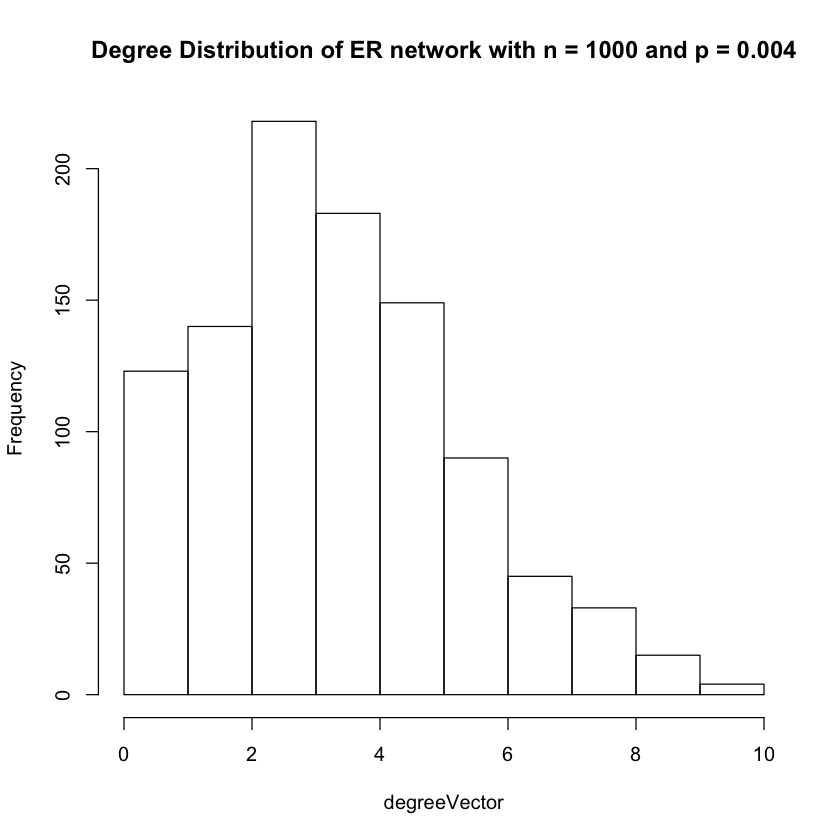

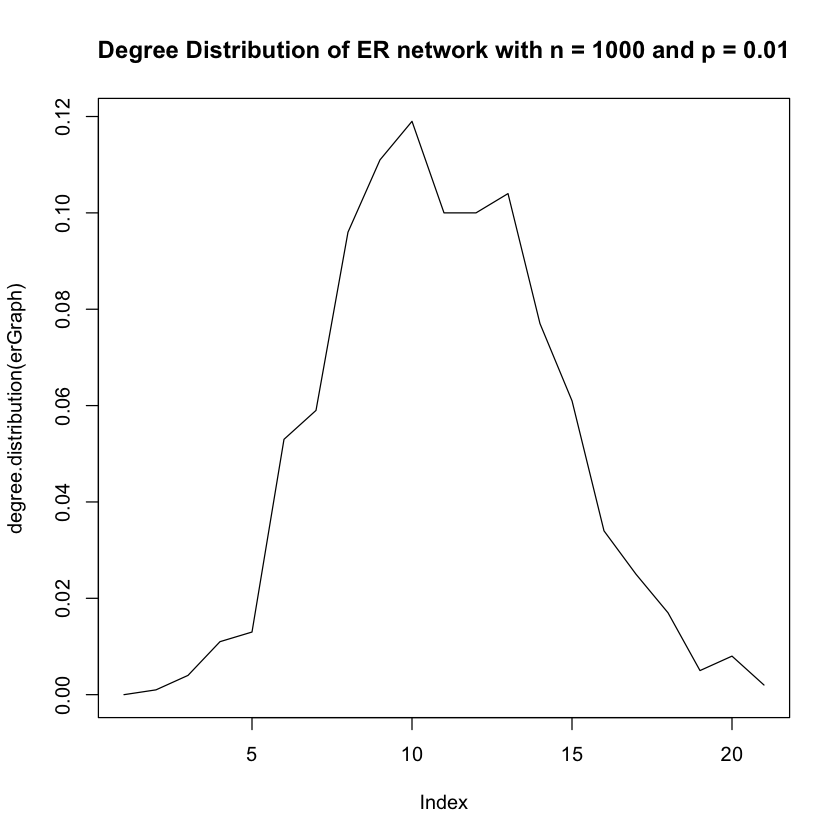

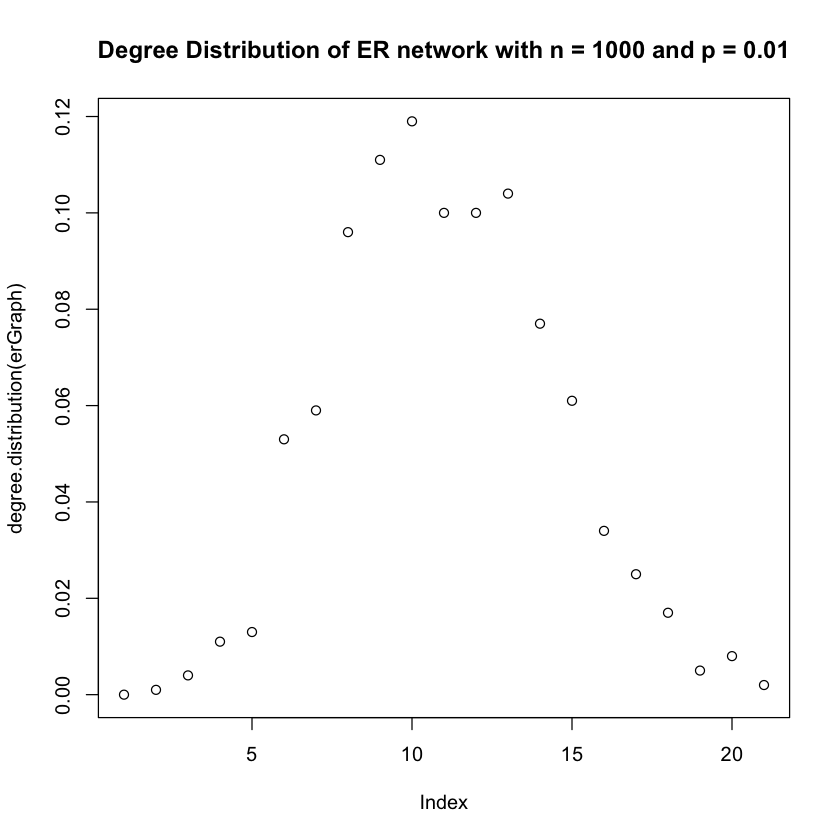


Mean: 10.028
Variance: 10.9862022022022

This Graph is Connected


ER GRAPH WITH N = 1000 AND P = 0.05

Number of Vertices: 1000
Number of Edges: 24966

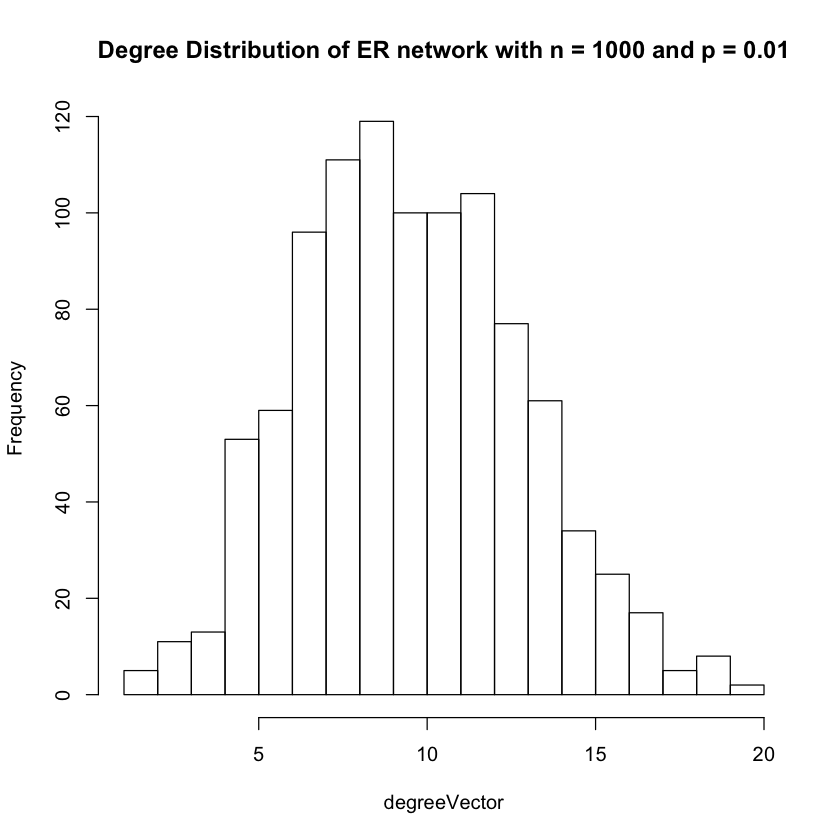

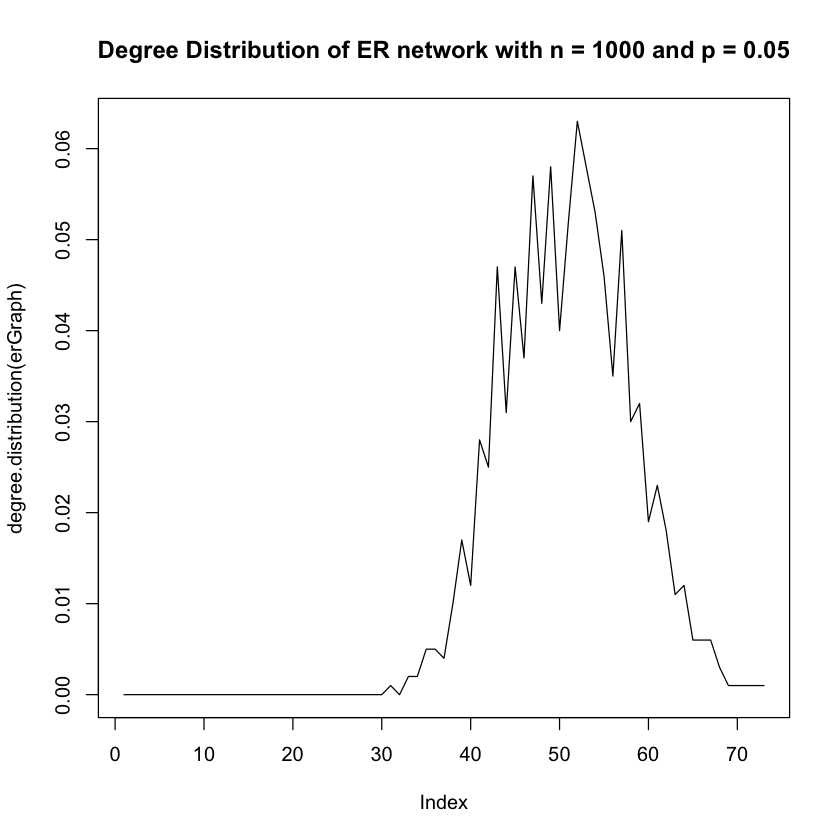

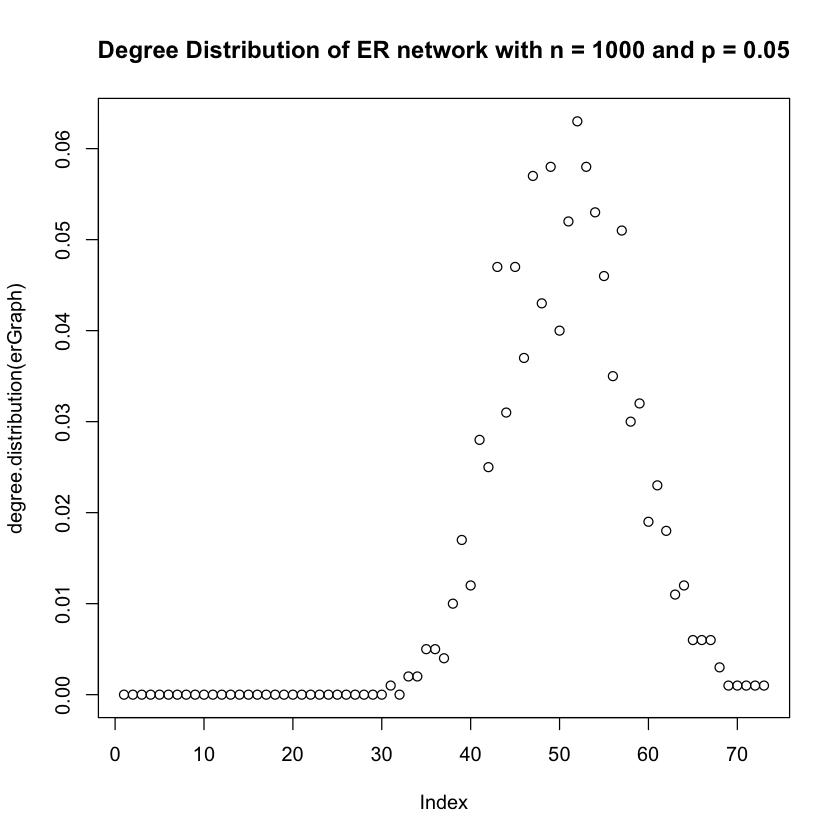


Mean: 49.932
Variance: 48.2936696696697

This Graph is Connected


ER GRAPH WITH N = 1000 AND P = 0.1

Number of Vertices: 1000
Number of Edges: 50081

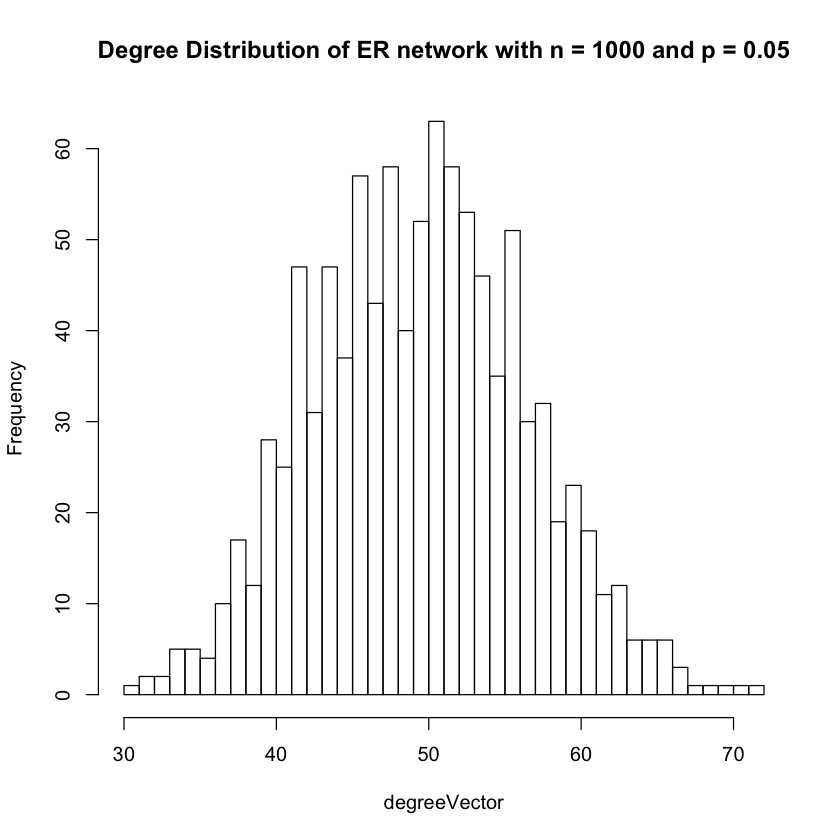

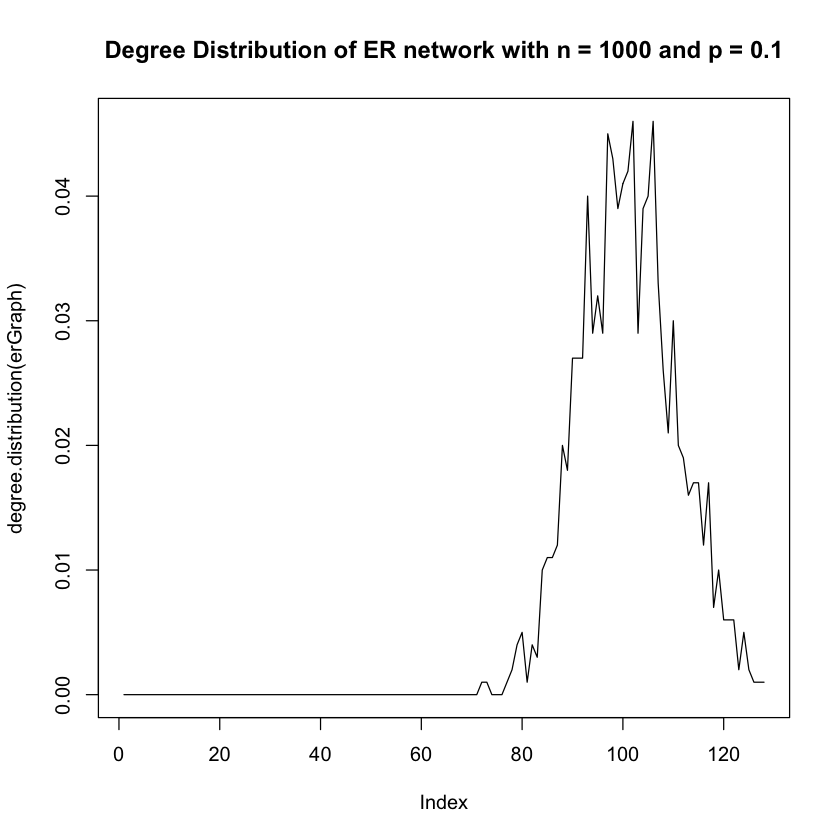

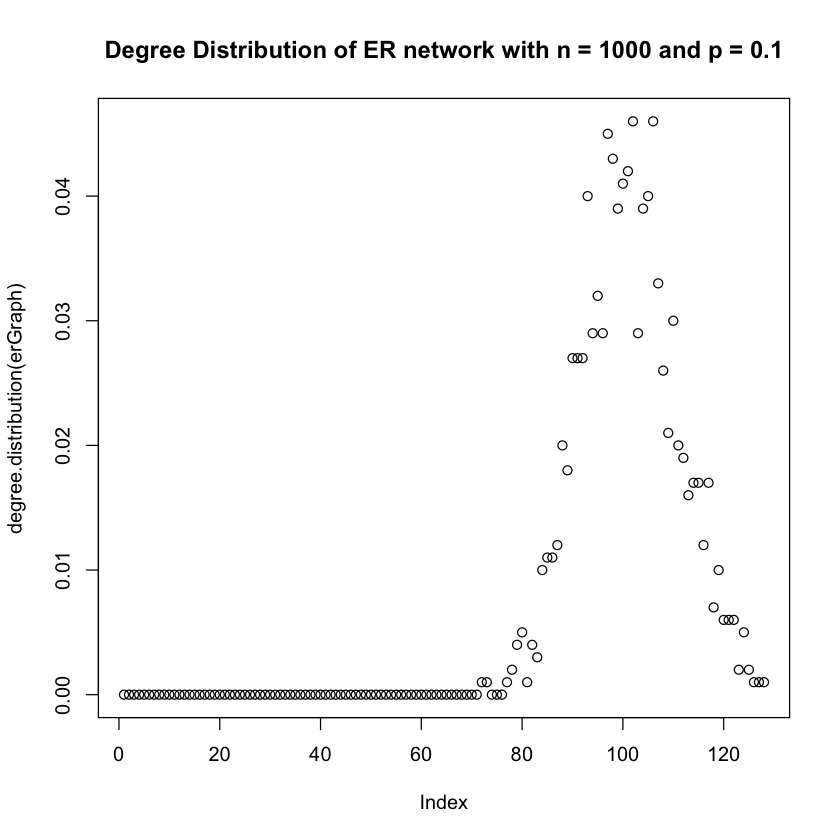


Mean: 100.162
Variance: 89.7695255255255

This Graph is Connected

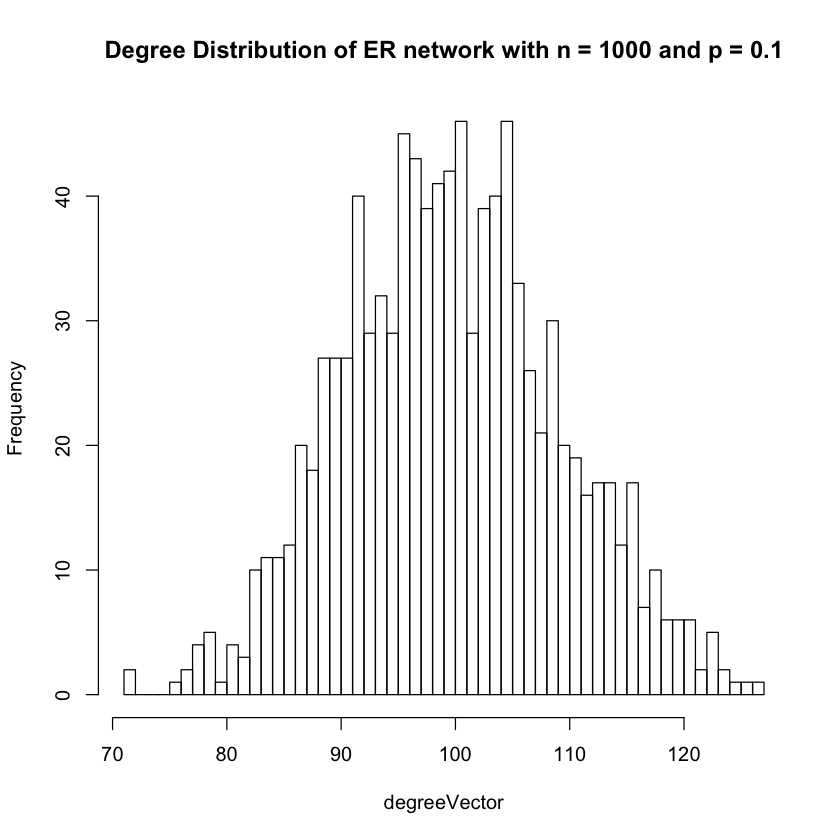

In [4]:
probabilities <- c(0.003, 0.004, 0.01, 0.05, 0.1)
meanList <- c()
varianceList <- c()

for(p in probabilities){
    erGraph <- erdos.renyi.game(1000, p, directed=F)
    
    cat(paste("\n\n\nER GRAPH WITH N = 1000 AND P =", p))
    
    cat(paste("\n\nNumber of Vertices:", vcount(erGraph)))
    cat(paste("\nNumber of Edges:", ecount(erGraph)))
    
    graphTitle <- paste("Degree Distribution of ER network with n = 1000 and p =", p, sep = " ")
    plot(degree.distribution(erGraph), main = graphTitle, type='l')
    plot(degree.distribution(erGraph), main = graphTitle)
    degreeVector <- degree(erGraph)
    hist(degreeVector, main = graphTitle, breaks = max(degreeVector) - min(degreeVector))
    
    graphMean <- mean(degreeVector)
    graphVar <- var(degreeVector)
    meanList <- c(meanList, graphMean)
    varianceList <- c(varianceList, graphVar)
    
    cat(paste("\nMean:", graphMean))
    cat(paste("\nVariance:", graphVar))
    
    if (is.connected(erGraph)){
        cat("\n\nThis Graph is Connected")
    }
    else{
        cat("\n\nThis graph is Not Connected")
        
        #Find Giant Connected Component
        
        erGraph.components <- clusters(erGraph) 
        ix <- which.max(erGraph.components$csize)
        erGraph.giant <- induced.subgraph(erGraph, which(erGraph.components$membership == ix))
        diameter <- vcount(erGraph.giant)
        normalizedDiameter <- diameter / vcount(erGraph)
        
        cat(paste("\n\nSize of GCC:", vcount(erGraph.giant)))
        cat(paste("\nNormalized Size of GCC:", normalizedDiameter))
        cat(paste("\nNumber of Edges in GCC:", ecount(erGraph.giant)))
        cat(paste("\nDiameter of GCC is ", diameter(erGraph.giant)))
    }
    
    #print(degree.distribution(erGraph))
      
}

#### (c)


 0 : 0.001
 0.00025 : 0.00568
 5e-04 : 0.01138
 0.00075 : 0.02568
 0.001 : 0.08627
 0.00125 : 0.34633
 0.0015 : 0.58072
 0.00175 : 0.71368
 0.002 : 0.79851
 0.00225 : 0.85415
 0.0025 : 0.89236
 0.00275 : 0.92138
 0.003 : 0.94022
 0.00325 : 0.95544
 0.0035 : 0.96532
 0.00375 : 0.97447
 0.004 : 0.9796
 0.00425 : 0.98515
 0.0045 : 0.98827
 0.00475 : 0.99066
 0.005 : 0.99295
 0.00525 : 0.99488
 0.0055 : 0.99579
 0.00575 : 0.99683
 0.006 : 0.99734
 0.00625 : 0.99793
 0.0065 : 0.99848
 0.00675 : 0.99868
 0.007 : 0.99911
 0.00725 : 0.99926
 0.0075 : 0.99946
 0.00775 : 0.99962
 0.008 : 0.99966
 0.00825 : 0.99974
 0.0085 : 0.99971
 0.00875 : 0.9998
 0.009 : 0.99995
 0.00925 : 0.99994
 0.0095 : 0.99993
 0.00975 : 0.99992
 0.01 : 0.99997
 0.01025 : 0.99995
 0.0105 : 0.99997
 0.01075 : 0.99996
 0.011 : 0.99999
 0.01125 : 0.99999
 0.0115 : 0.99998
 0.01175 : 0.99997
 0.012 : 1
 0.01225 : 1
 0.0125 : 1
 0.01275 : 1
 0.013 : 1
 0.01325 : 1
 0.0135 : 1
 0.01375 : 1
 0.014 : 1

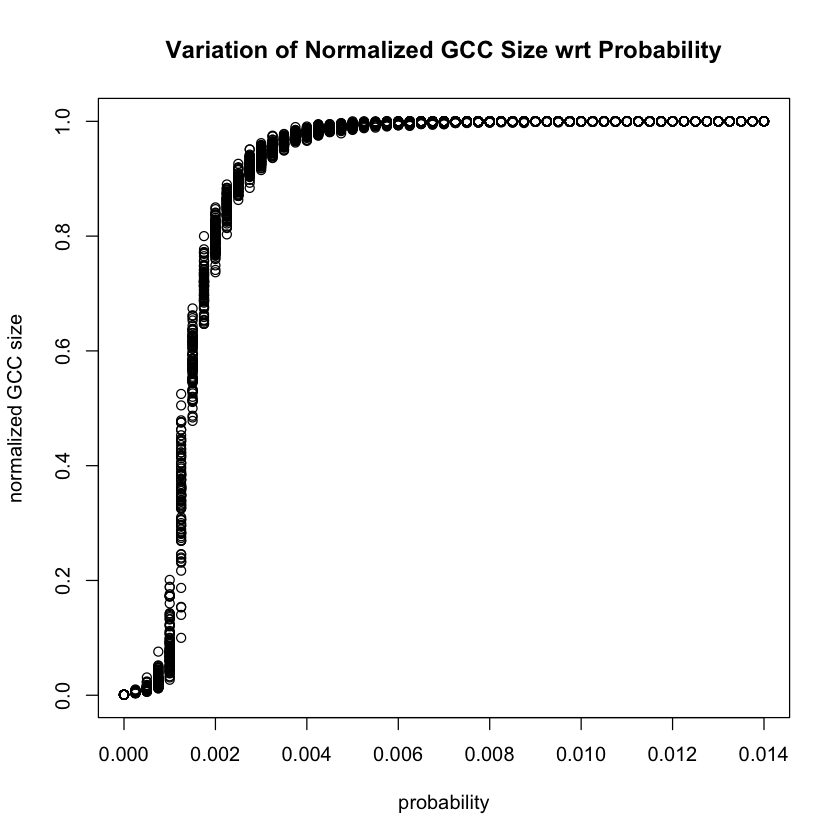

In [5]:
probabilities <- seq(from = 0.000000, to = 0.014, by = 0.00025)

x <- c()
y <- c()
avgNormalizedSize = c()
for(p in probabilities){
    sizes = c()
    for (i in 1:100){
        erGraph <- erdos.renyi.game(1000, p, directed=F)
        
        erGraph.components <- clusters(erGraph) 
        ix <- which.max(erGraph.components$csize)
        erGraph.giant <- induced.subgraph(erGraph, which(erGraph.components$membership == ix))
        size <- vcount(erGraph.giant)
        normalizedSize <- size / vcount(erGraph)
        sizes = c(sizes, normalizedSize)
        x <- c(x, p)
        y <- c(y, normalizedSize)
    }
    avgNormalizedSize = c(avgNormalizedSize, mean(sizes))
}

plot(x, y, xlab = 'probability', ylab = 'normalized GCC size', main = 'Variation of Normalized GCC Size wrt Probability')
# a = log(1000) / 1000
# abline(v = a, col='blue')
# abline(v = 0.001, col='blue')
# abline(v = 2 * a, col='blue')


for(i in 1:length(probabilities)){
    cat(paste("\n", probabilities[i], ":", avgNormalizedSize[i]))
}

#### (d)

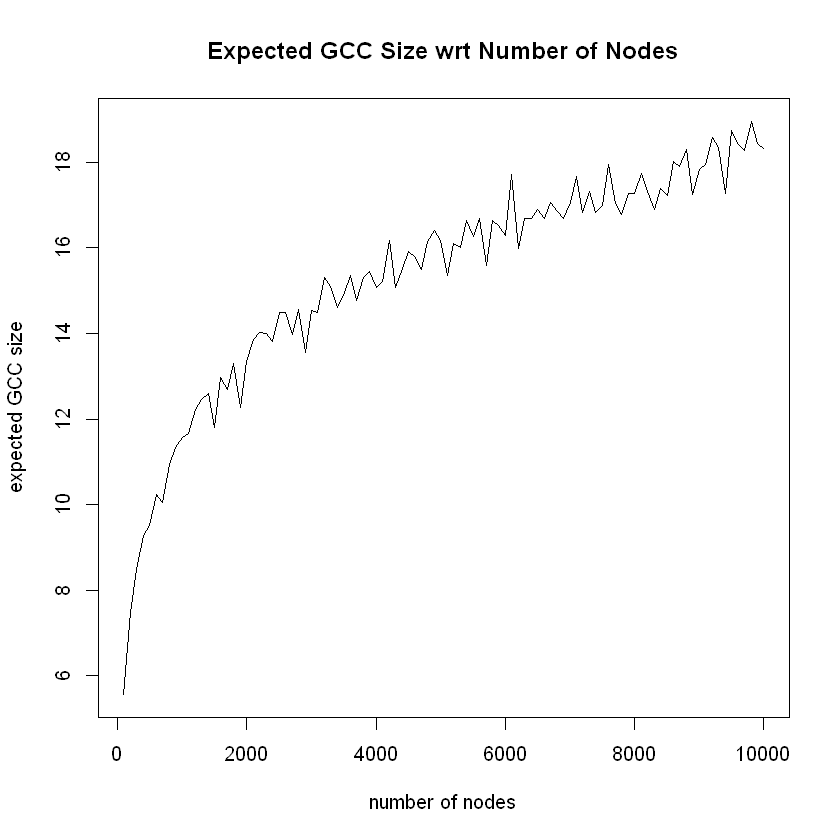

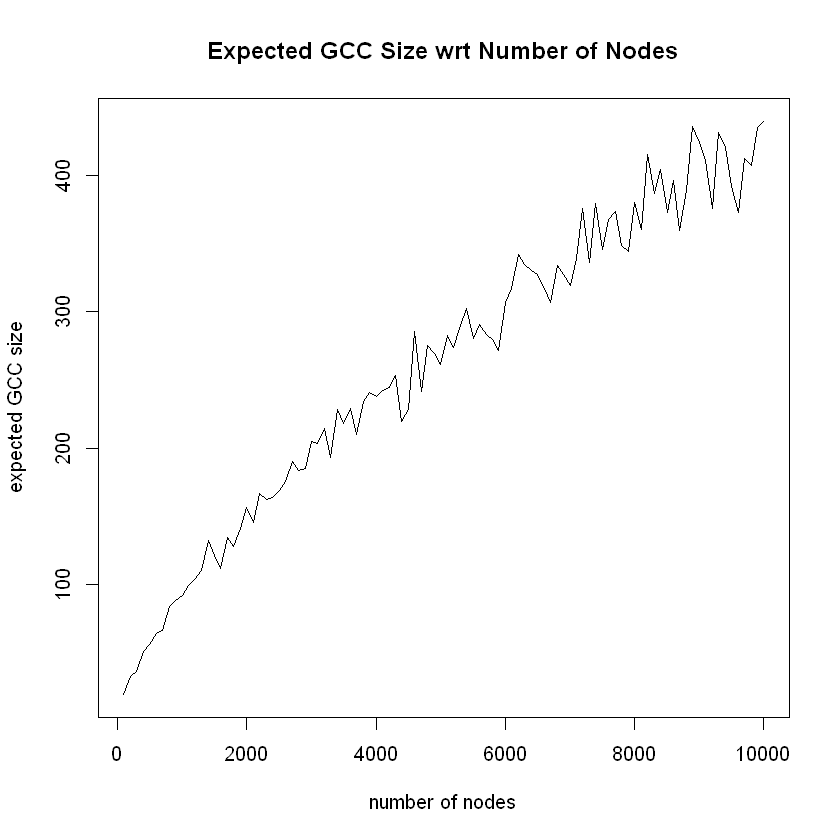

In [27]:
nSeq = seq(from = 100, to = 10000, by = 100)
cSeq = c(0.5, 1)



for (c in cSeq){
    
    x <- c()
    y <- c()
    
    for (n in nSeq){

        p <- c / n
        
        avg <- 0
        for (i in 1:100){
            erGraph <- erdos.renyi.game(n, p, directed=F)

            erGraph.components <- clusters(erGraph) 
            ix <- which.max(erGraph.components$csize)
            erGraph.giant <- induced.subgraph(erGraph, which(erGraph.components$membership == ix))
            diameter <- vcount(erGraph.giant)
            avg <- avg + diameter

        }  

        avg <- avg / 100
        x <- c(x, n)
        y <- c(y, avg)
    }

    plot(x, y, type='l', xlab='number of nodes', ylab='expected GCC size', main='Expected GCC Size wrt Number of Nodes')
}

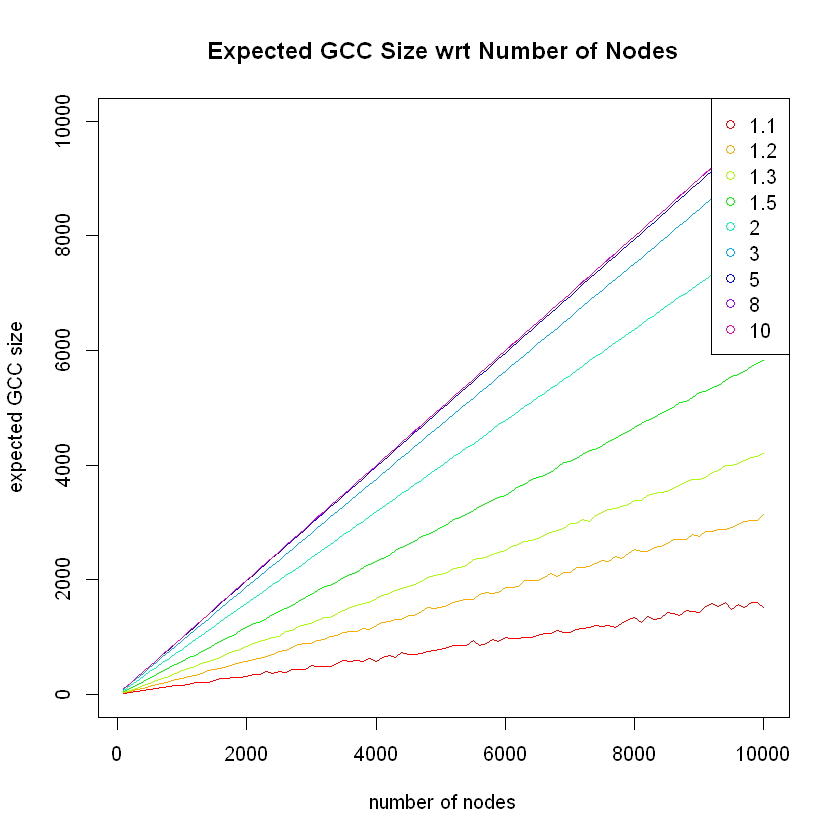

In [32]:
nSeq = seq(from = 100, to = 10000, by = 100)
cSeq = c(1.1, 1.2, 1.3, 1.5, 2, 3, 5, 8, 10)

i <- 1
color <- rainbow(length(cSeq))

for (c in cSeq){
    
    x <- c()
    y <- c()
    
    for (n in nSeq){

        p <- c / n

        avg <- 0
        for (j in 1:100){
            erGraph <- erdos.renyi.game(n, p, directed=F)

            erGraph.components <- clusters(erGraph) 
            ix <- which.max(erGraph.components$csize)
            erGraph.giant <- induced.subgraph(erGraph, which(erGraph.components$membership == ix))
            diameter <- vcount(erGraph.giant)
            avg <- avg + diameter

        }  

        avg <- avg / 100
        x <- c(x, n)
        y <- c(y, avg)
       
    }
    
    if (i == 1){
        plot(x, y, col = color[i], type='l', ylim=c(0,10000), xlab='number of nodes', ylab='expected GCC size', main='Expected GCC Size wrt Number of Nodes')
    }
    else{
        lines(x, y, col = color[i], type='l')
    }
        
    i <- i + 1
}
legend("topright", legend = cSeq, col = color, pch = 1)

### 2.  Random Networks Using Preferential Attachment Model

In [46]:
plotDegreeDistribution = function(degreeVector, m, n, title){
    
    res <- hist(degreeVector,breaks = max(degreeVector) - min(degreeVector))
    
    x <- seq(from = 1, to = length(res$counts))
    
    logX <- log10(x)
    logY <- log10(res$counts)
    
    indices = which(!is.finite(logY))
    logY[indices]= NA
    
    plot(logX, logY, type='l', main= title, xlab="degrees (in log scale)", ylab="Frequency (in log scale)")
    abline(lm(logY ~ logX, na.action=na.exclude), col='blue')
    
    print(lm(logY ~ logX, na.action=na.exclude))
    
}

In [146]:
preferentialAttachmentGraph = function(m){
    cat(paste('\nCreating Preferential Attachment Graph for n = 1000 and m = ',m))
    
    #n = 1000
    prefGraph1000 <- barabasi.game(n = 1000, m = m, directed = F)
    cat(paste("\nNumber of Edges: ",ecount(prefGraph1000), "\n"))
    cat(paste("\nIs This Graph Connected?",is.connected(prefGraph1000), "\n"))
    cat(paste('\nModularity = ', modularity(fastgreedy.community(prefGraph1000))))
    
    degreeVector1000 <- degree(prefGraph1000)
    graphTitle1000 = paste("Degree Distribution of Preferential Attachment Model \n with n = 1000 and m = ", m, "in Log Log Scale")
    plotDegreeDistribution(degreeVector1000, m, 1000, graphTitle1000)
    
    #n = 10000
    cat(paste('\nCreating Preferential Attachment Graph for n = 10000 and m = ',m))
    
    prefGraph10k <- barabasi.game(n = 10000, m = m, directed = F)
    cat(paste("\nNumber of Edges: ",ecount(prefGraph10k), "\n"))
    cat(paste("\nIs This Graph Connected?",is.connected(prefGraph10k), "\n"))
    cat(paste('\nModularity = ', modularity(fastgreedy.community(prefGraph10k))))
    
    degreeVector10k <- degree(prefGraph10k)
    graphTitle10k = paste("Degree Distribution of Preferential Attachment Model \n with n = 10000 and m = ", m, "in Log Log Scale")
    plotDegreeDistribution(degreeVector10k, m, 10000, graphTitle10k)
    
    #2e
    adjList1000 = as_adj_list(prefGraph1000)
    nodes = sample(1:1000, 1000, replace = TRUE)
    degrees = c()

    for (i in nodes){
        neighbors = adjList1000[[i]]
        k = sample(1:length(neighbors), 1)
        j = neighbors[[k]]
        degree = length(adjList1000[[j]])
        degrees = c(degrees, degree)
    }
    
    title = "Degree Distribution of Node j when Node i is \n Picked Randomly in Log Log Scale"
    plotDegreeDistribution(degrees, m, 1000, title)
    
    #2f
    numNodes = 1000
    avgDegree <- rep(0,numNodes)
    for (i in 1:100){
        prefGraph <- barabasi.game(n = numNodes, m = m, directed = F)
        degreeVector <- degree(prefGraph)
        avgDegree = avgDegree + degreeVector
    }  
    avgDegree = avgDegree/100
    x <- seq(from = 1, to = numNodes)
    revAvg = rev(avgDegree)
    plot(x, avgDegree, type='l', main='Relationship Between Age of Node \n and Expected Degree', xlab='Timestep', ylab='Expected Degree')
    plot(x, revAvg, type='l', main='Relationship Between Age of Node \n and Expected Degree', xlab='Age', ylab='Expected Degree')

    
}


Creating Preferential Attachment Graph for n = 1000 and m =  1
Number of Edges:  999 

Is This Graph Connected? TRUE 

Modularity =  0.933028123218316

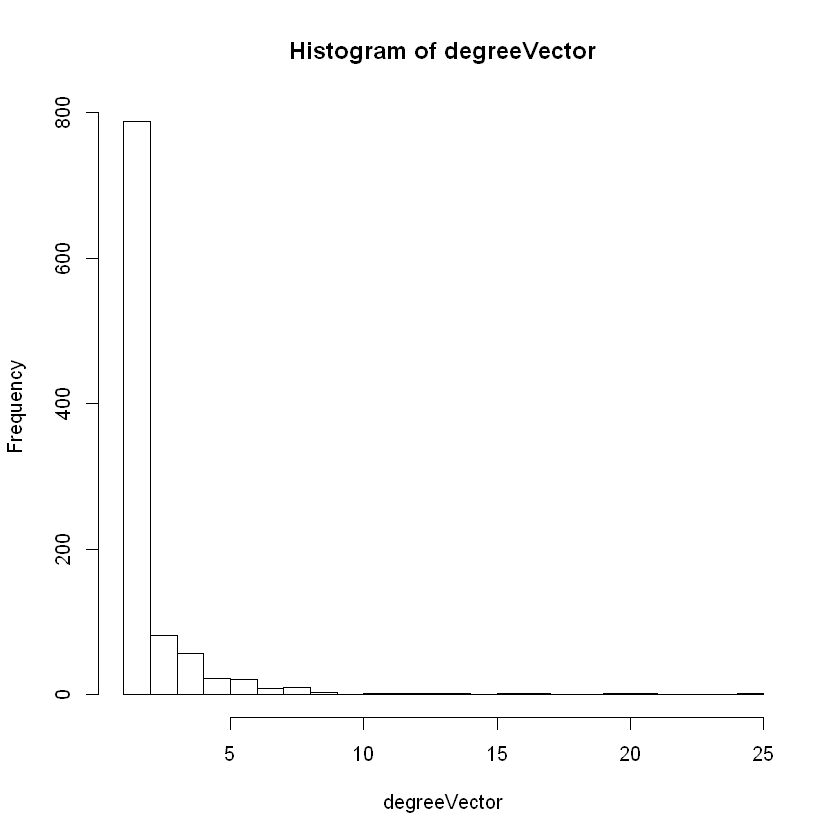


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      2.714       -2.274  


Creating Preferential Attachment Graph for n = 10000 and m =  1
Number of Edges:  9999 

Is This Graph Connected? TRUE 

Modularity =  0.978326195455844

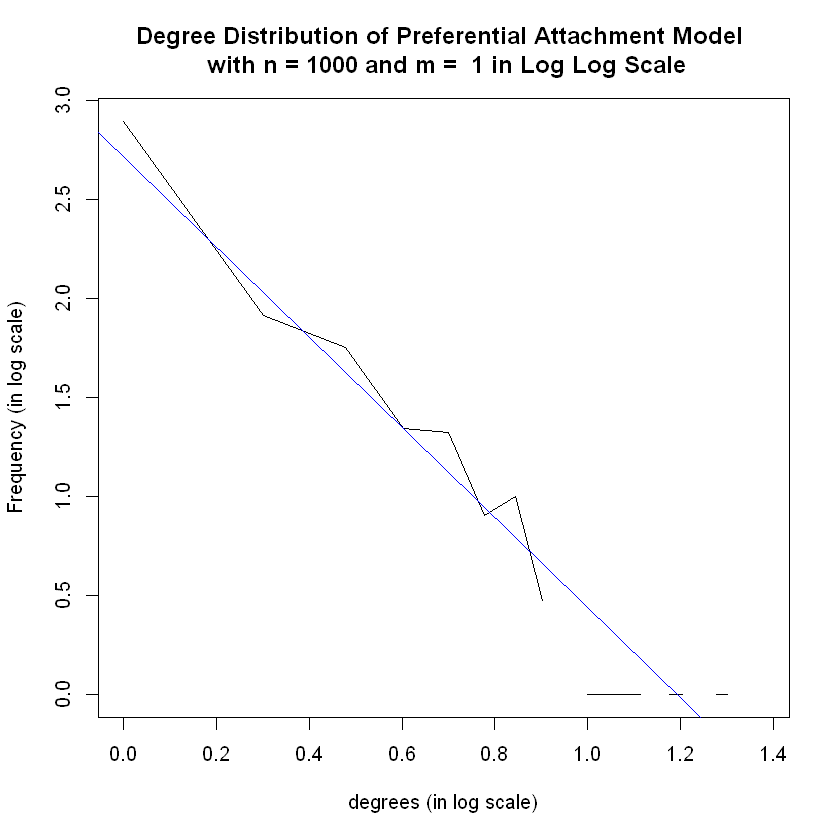

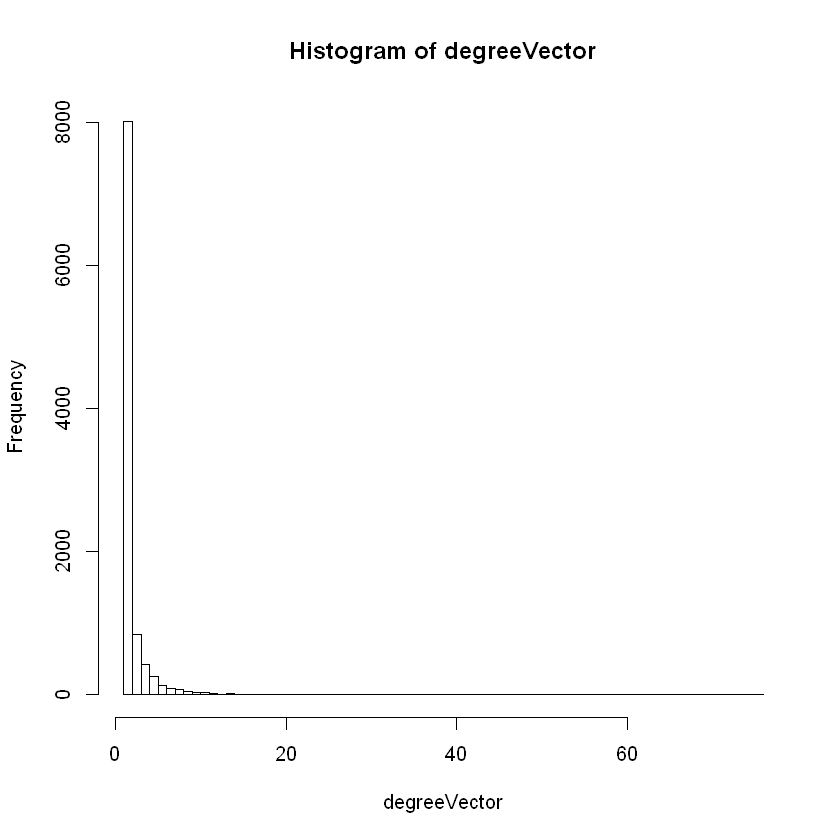


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      3.660       -2.357  



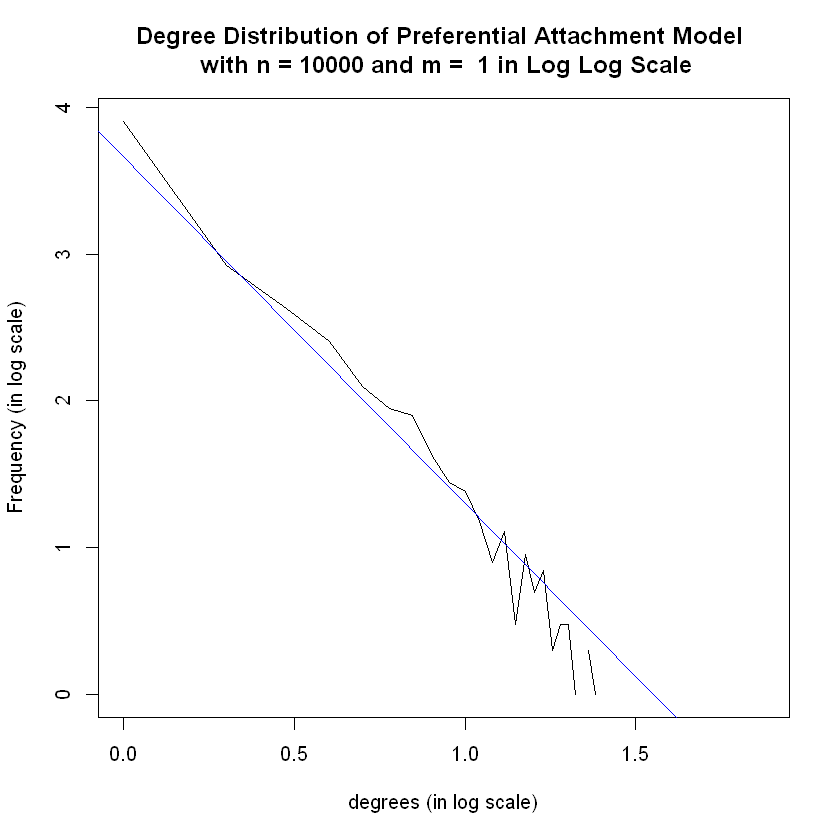

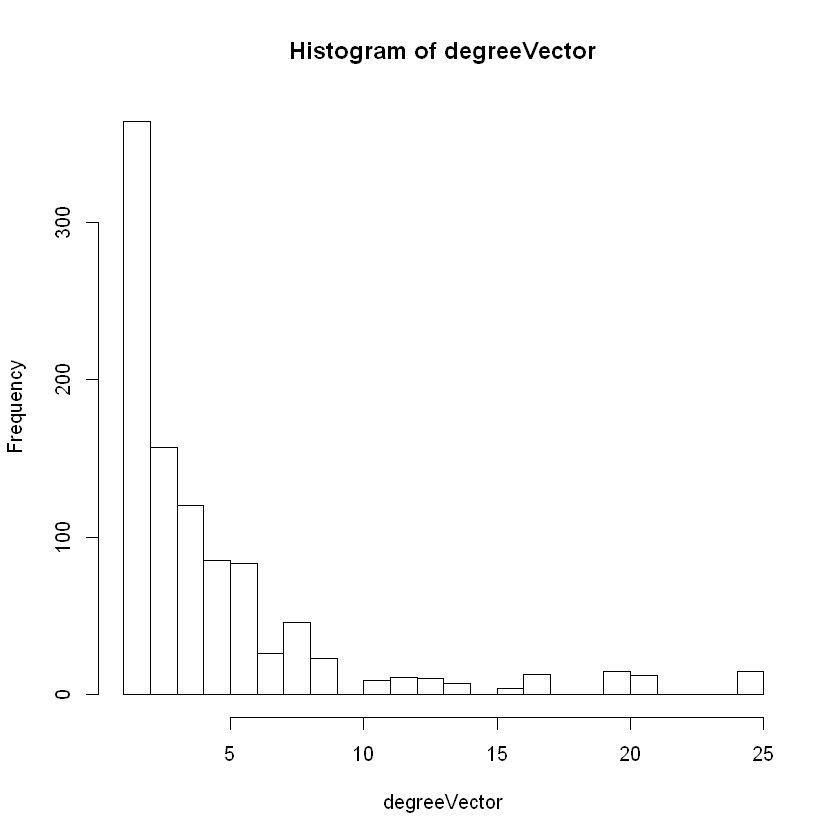


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      2.580       -1.301  



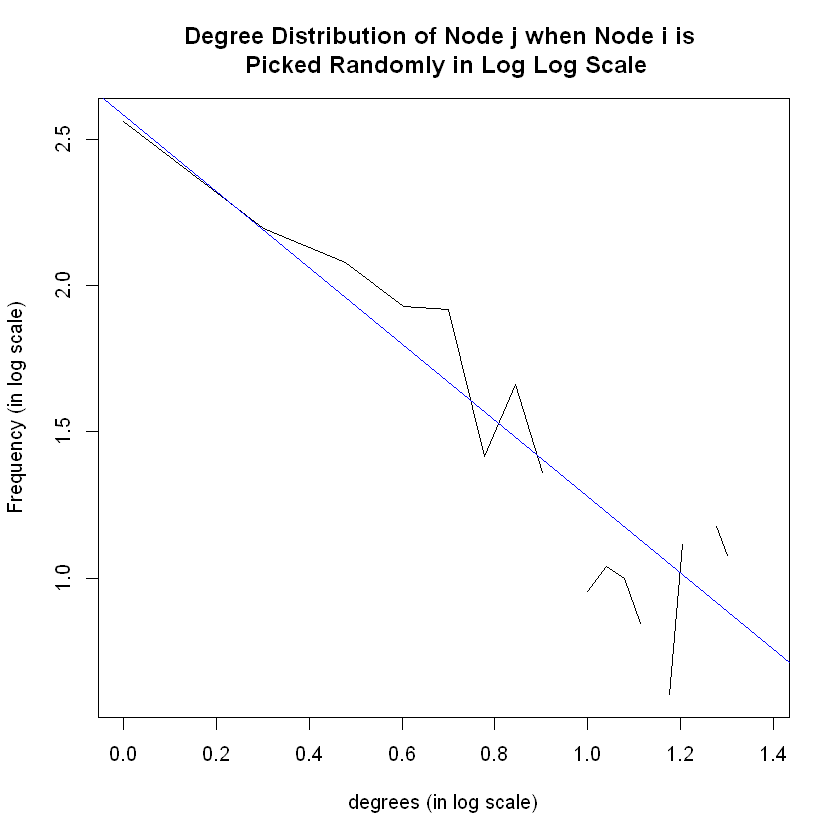

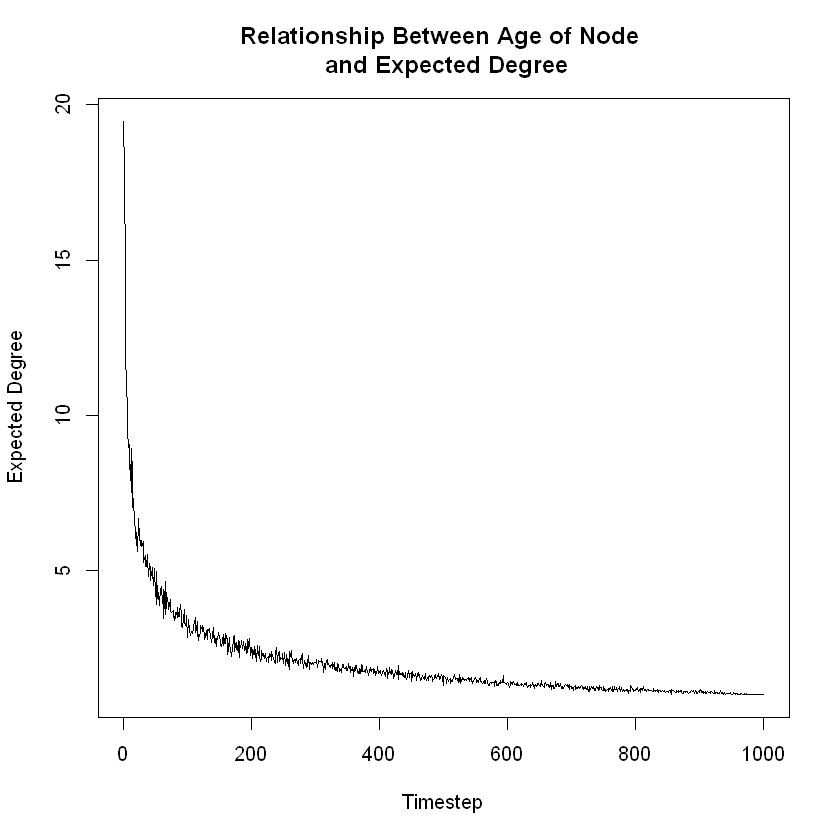

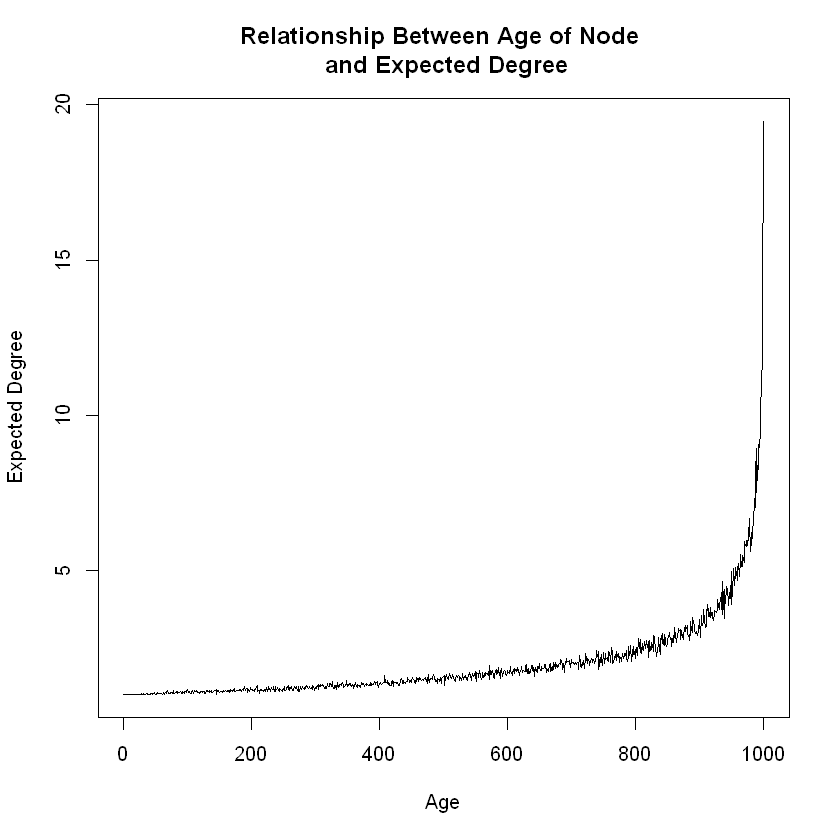

In [147]:
preferentialAttachmentGraph(1)


Creating Preferential Attachment Graph for n = 1000 and m =  2
Number of Edges:  1997 

Is This Graph Connected? TRUE 

Modularity =  0.528240658433818

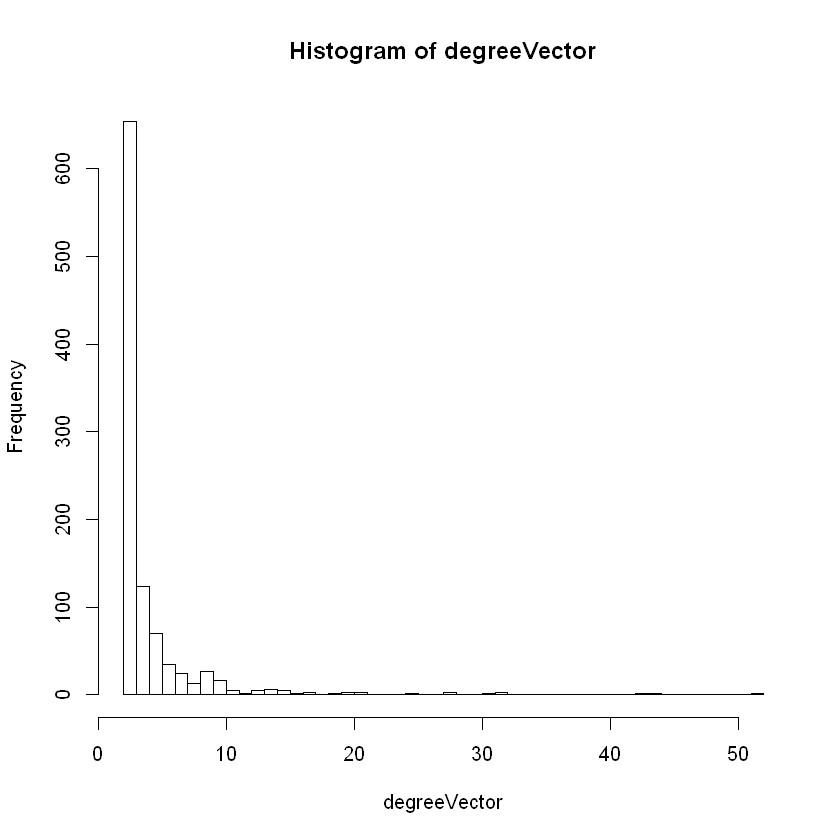


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      2.520       -1.697  


Creating Preferential Attachment Graph for n = 10000 and m =  2
Number of Edges:  19997 

Is This Graph Connected? TRUE 

Modularity =  0.530725280642879

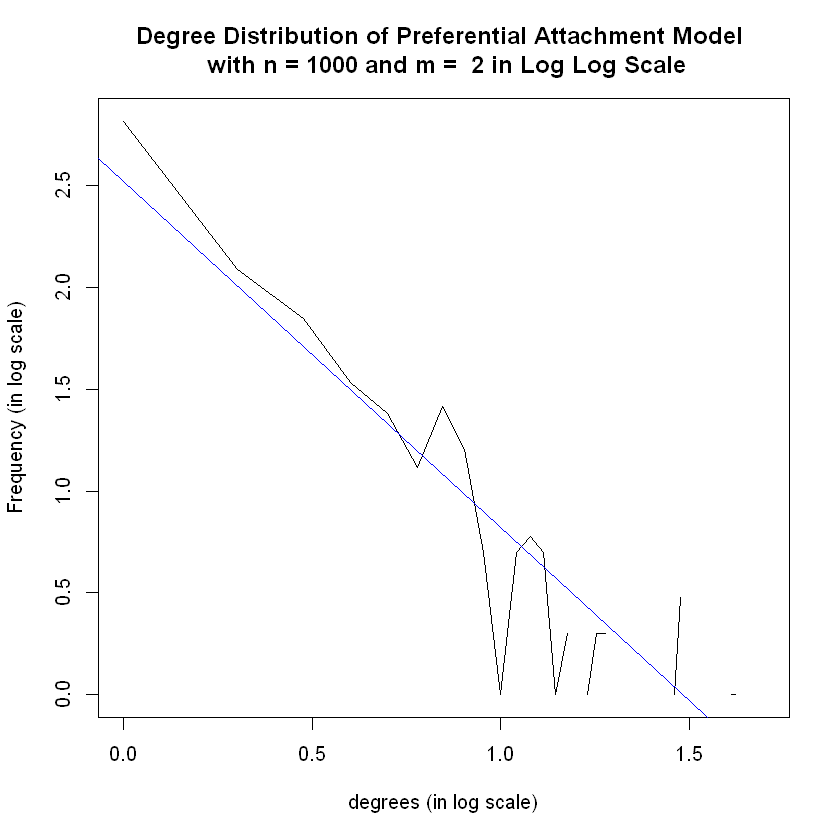

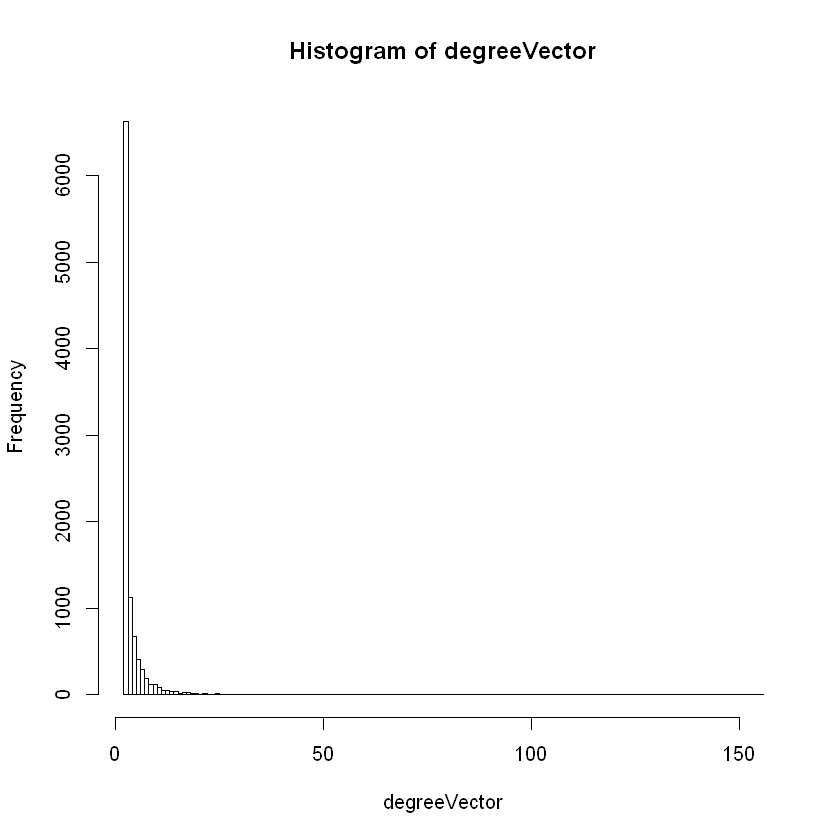


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      3.670       -2.028  



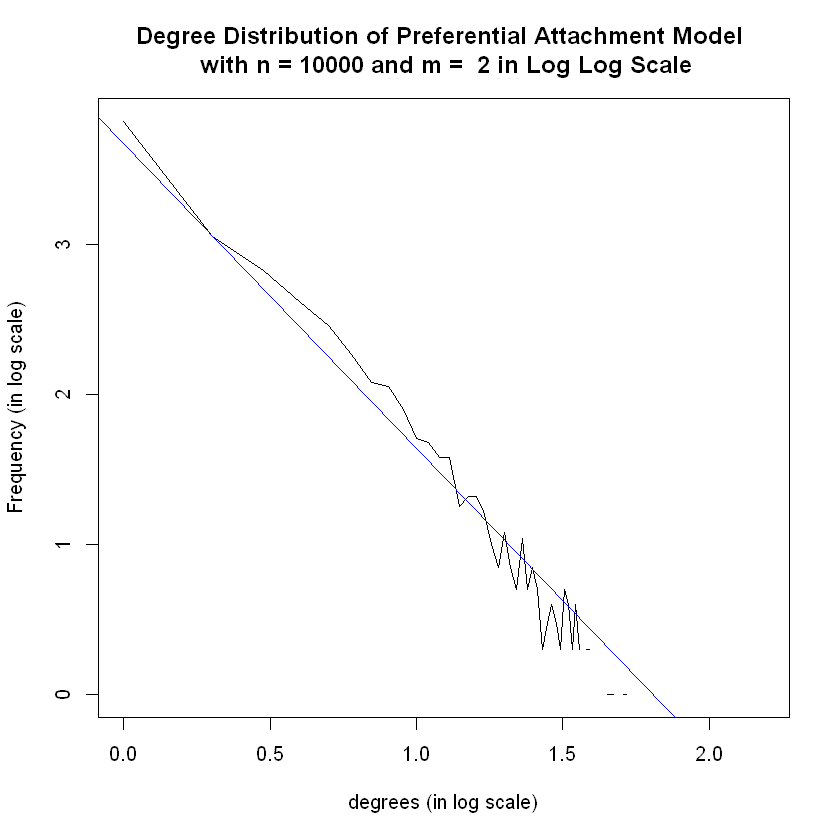

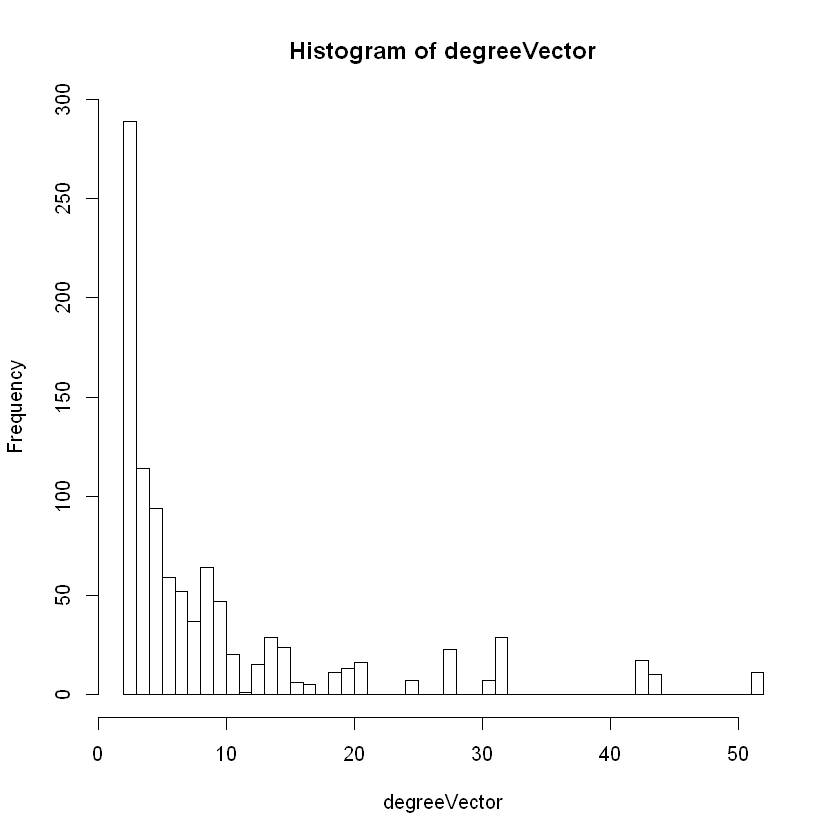


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      2.199       -0.829  



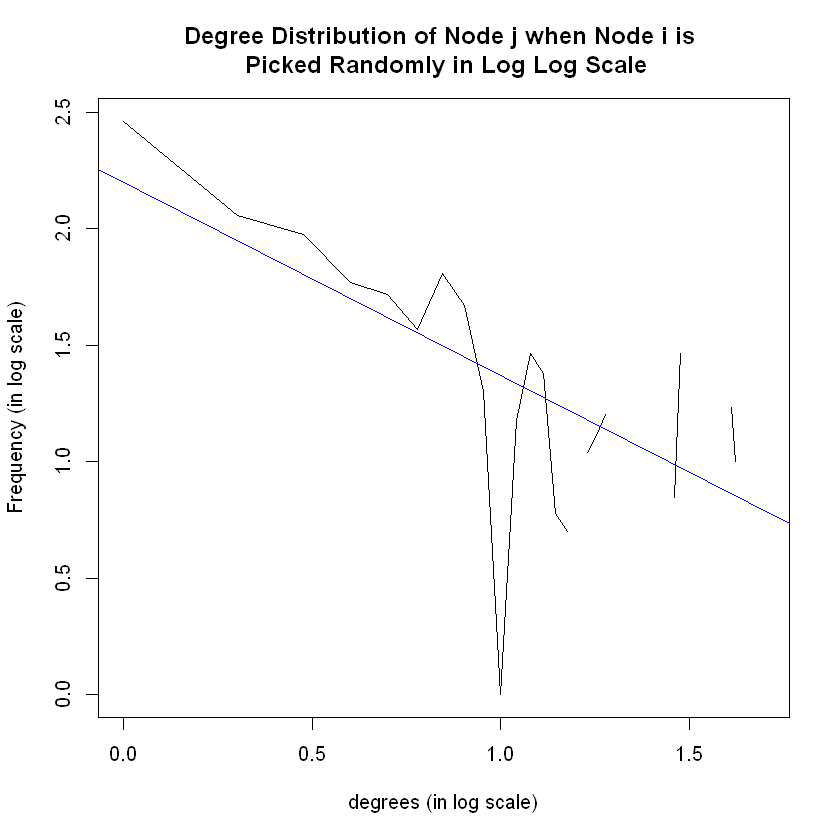

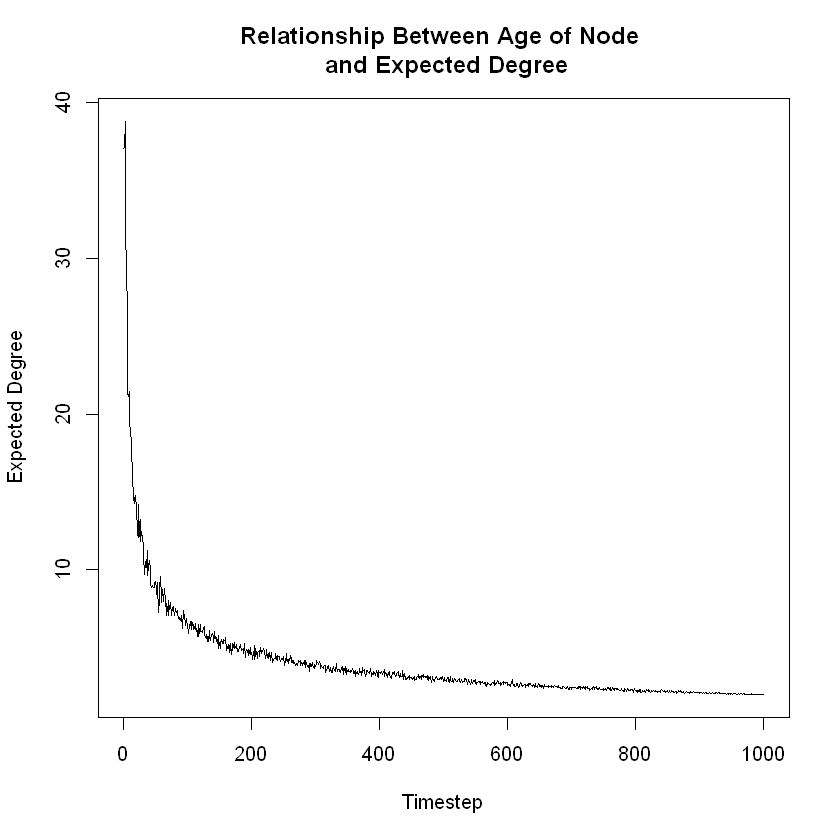

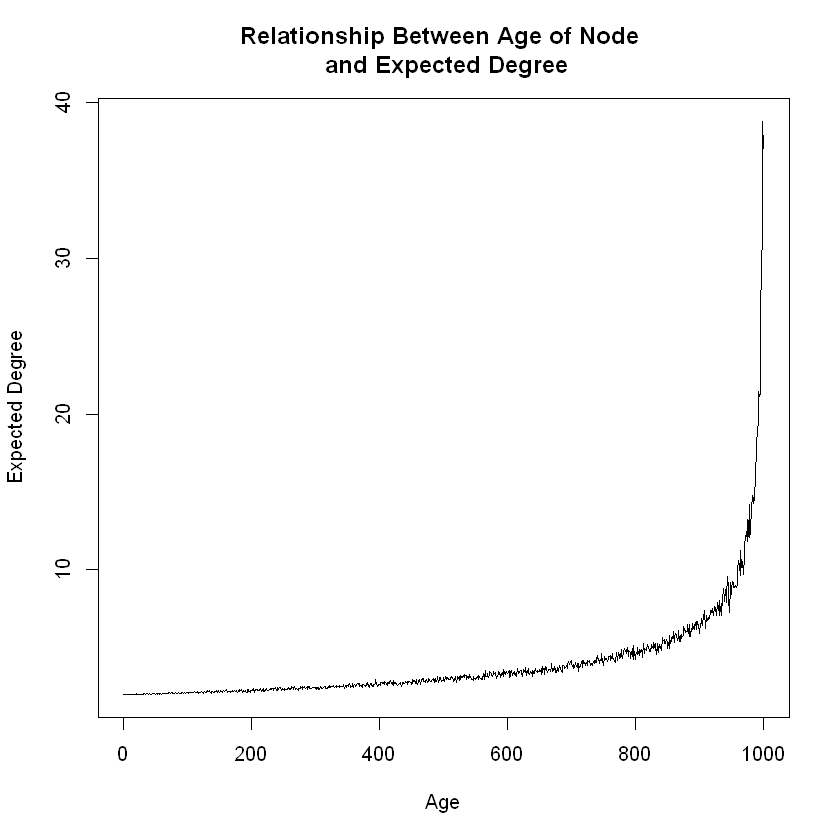

In [148]:
preferentialAttachmentGraph(2)


Creating Preferential Attachment Graph for n = 1000 and m =  5
Number of Edges:  4985 

Is This Graph Connected? TRUE 

Modularity =  0.27658222410461

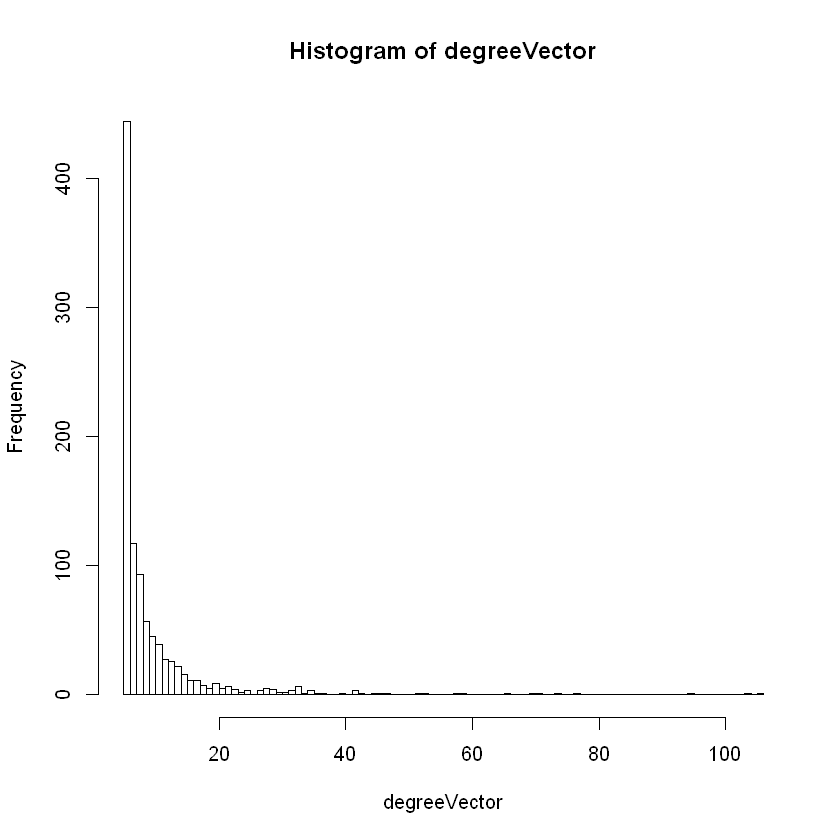


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      2.563       -1.473  


Creating Preferential Attachment Graph for n = 10000 and m =  5
Number of Edges:  49985 

Is This Graph Connected? TRUE 

Modularity =  0.273672016779589

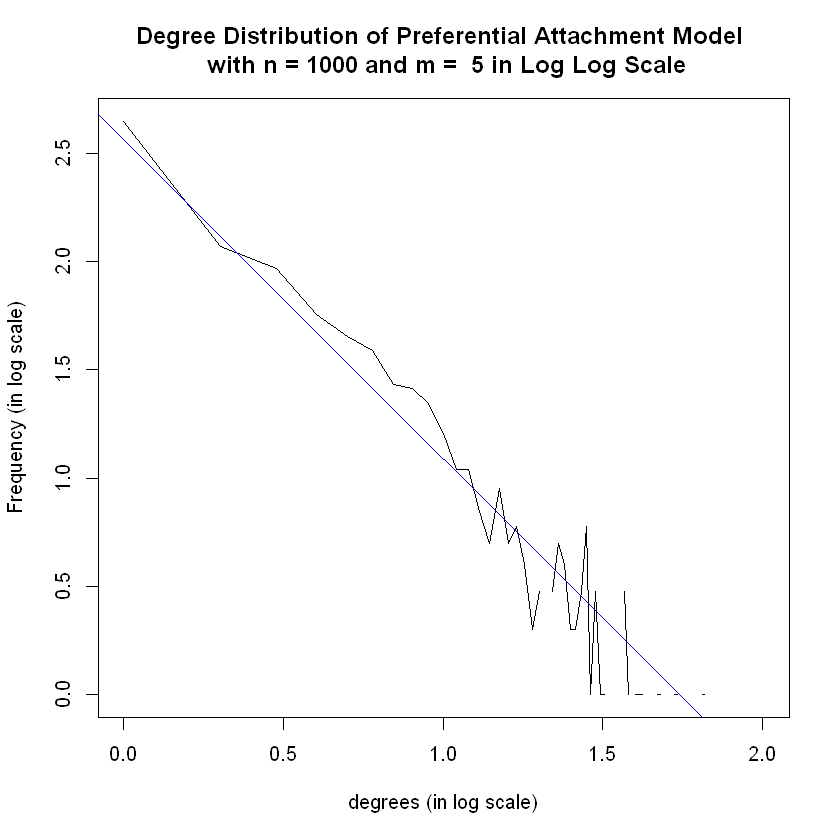

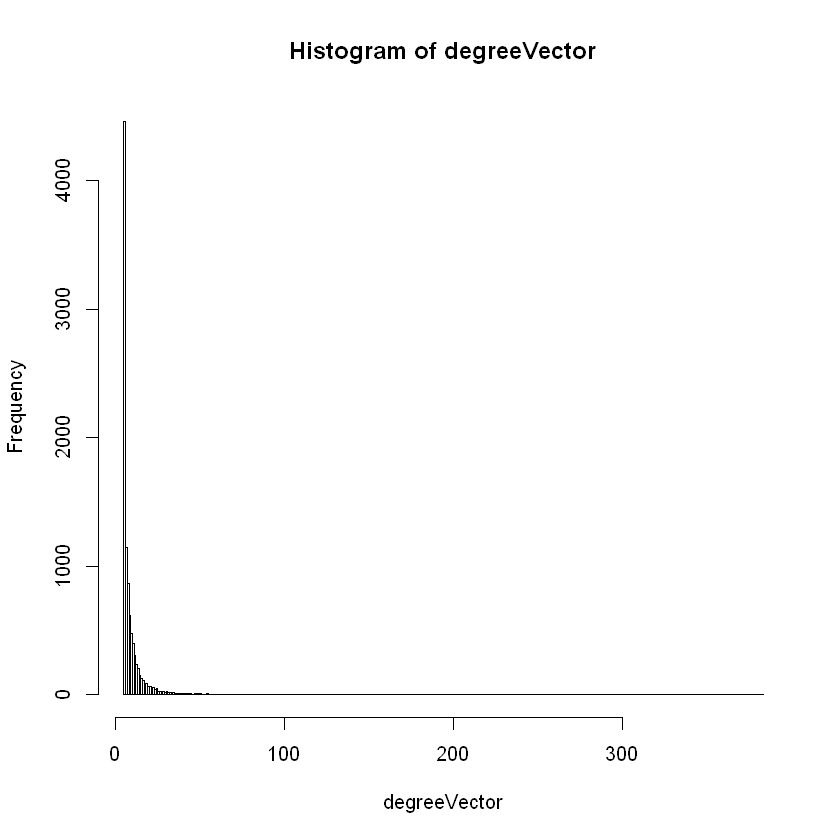


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      3.769       -1.812  



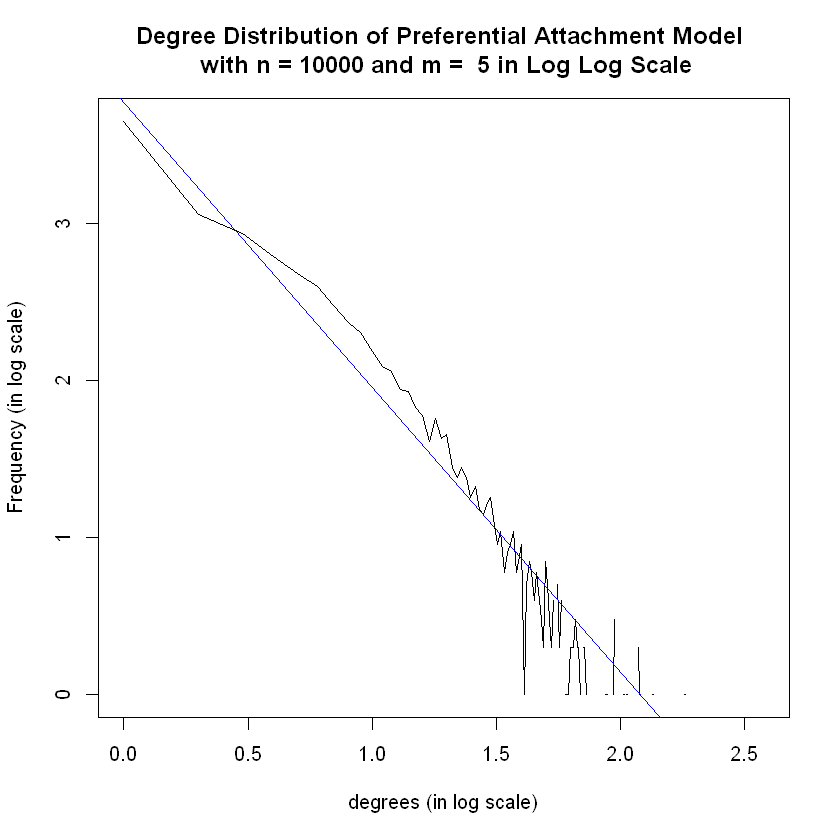

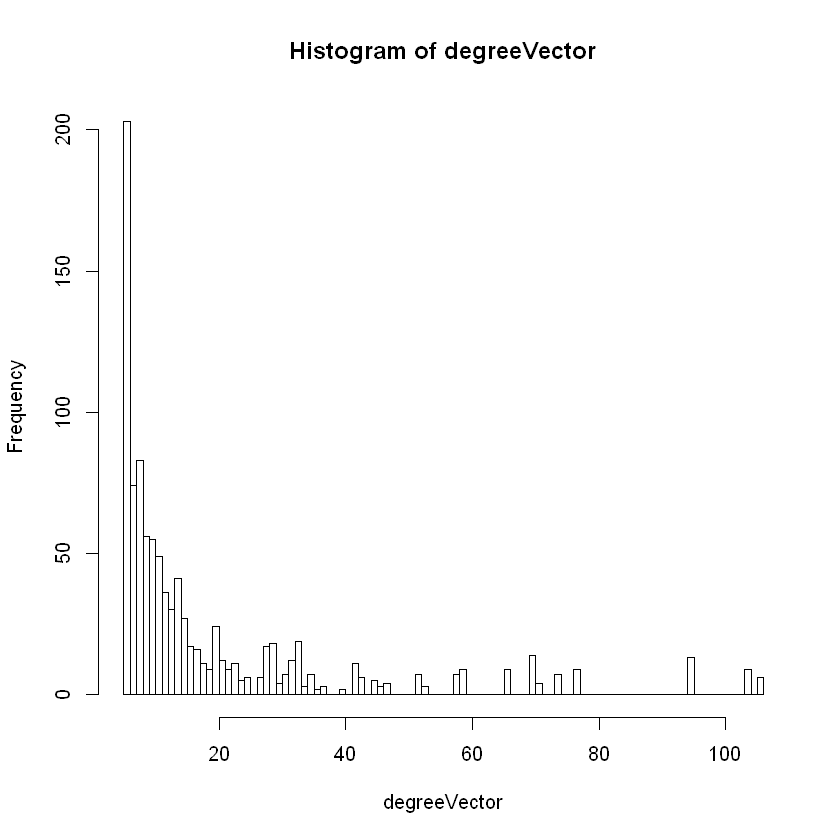


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
     2.0948      -0.7845  



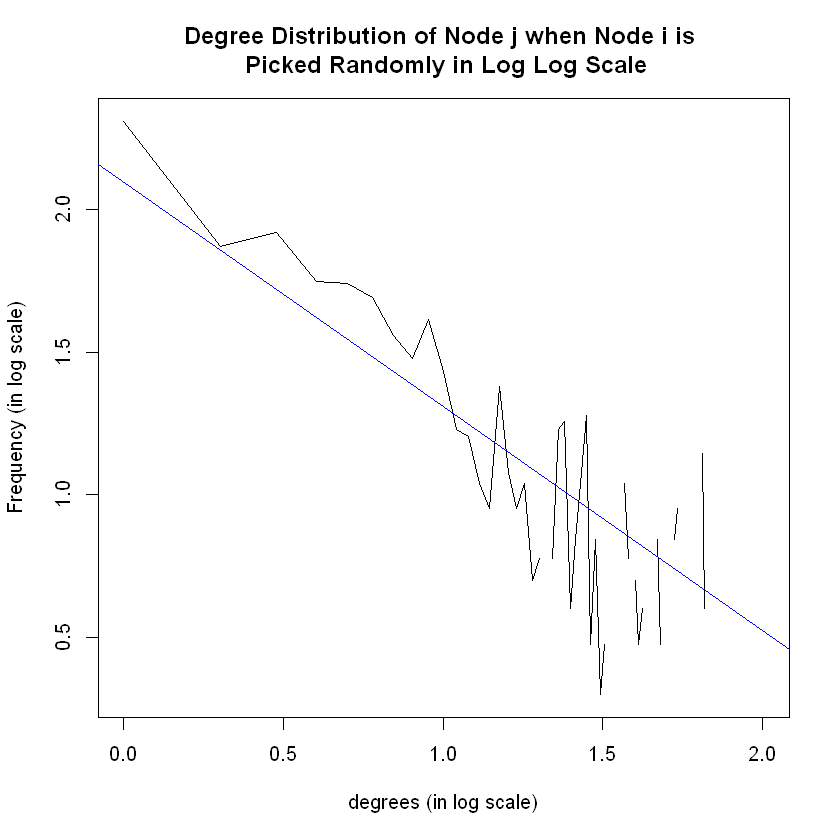

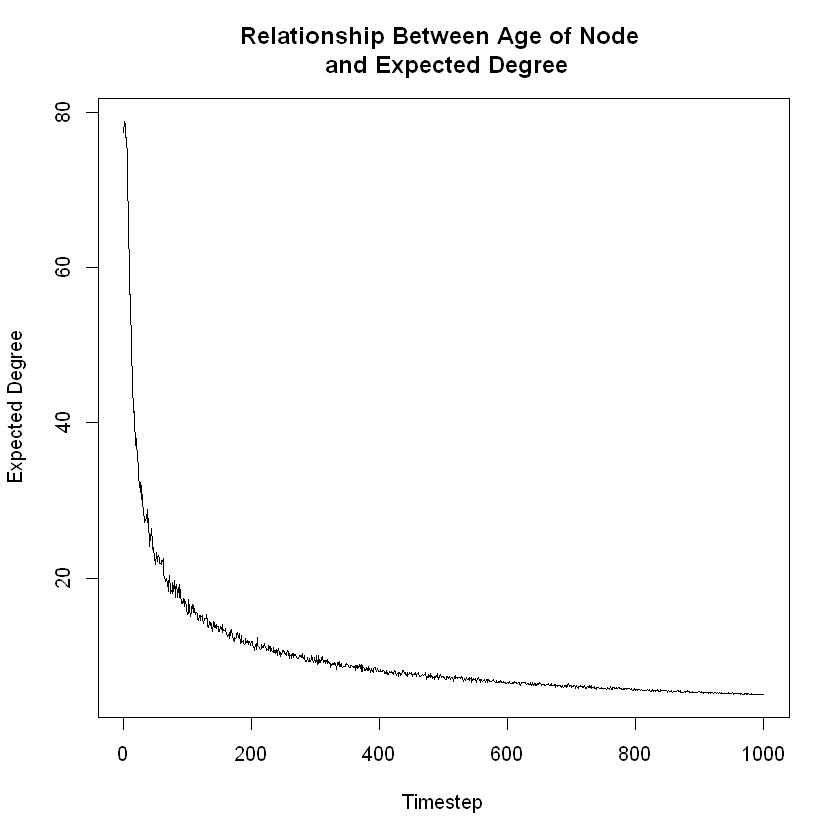

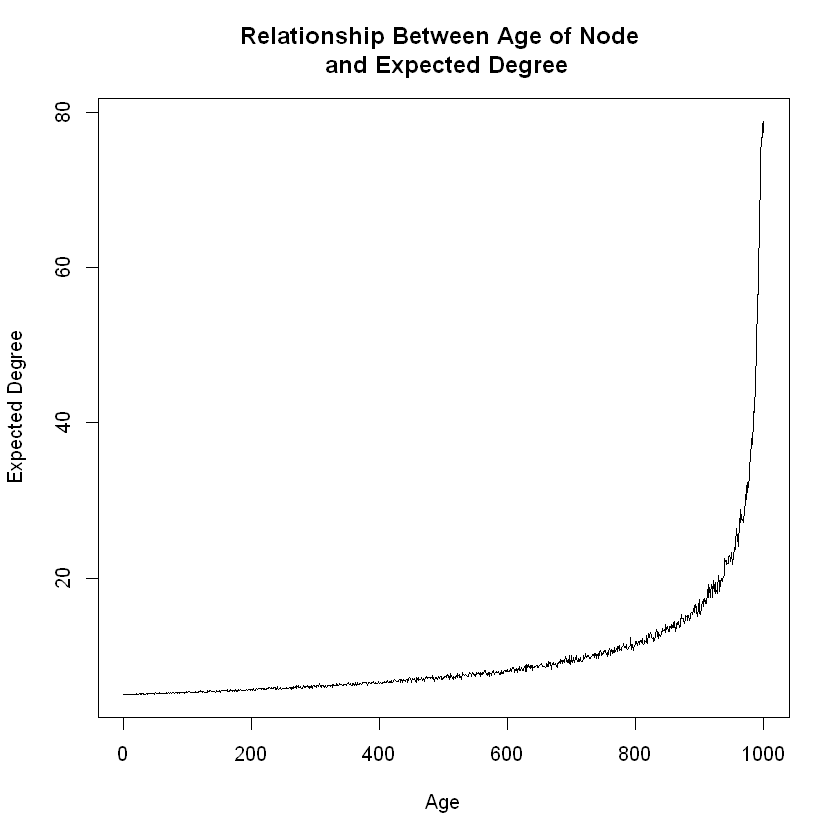

In [149]:
preferentialAttachmentGraph(5)

[1] TRUE

[1] TRUE

[1] FALSE

IGRAPH e977eb5 U--- 1000 999 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
IGRAPH e98e1a7 U--- 1000 999 -- Degree sequence random graph
+ attr: name (g/c), method (g/c)
IGRAPH e98edf8 U--- 1000 999 -- Degree sequence random graph
+ attr: name (g/c), method (g/c)


[1] 0.9333077

[1] 0.9351844

[1] 0.8521074

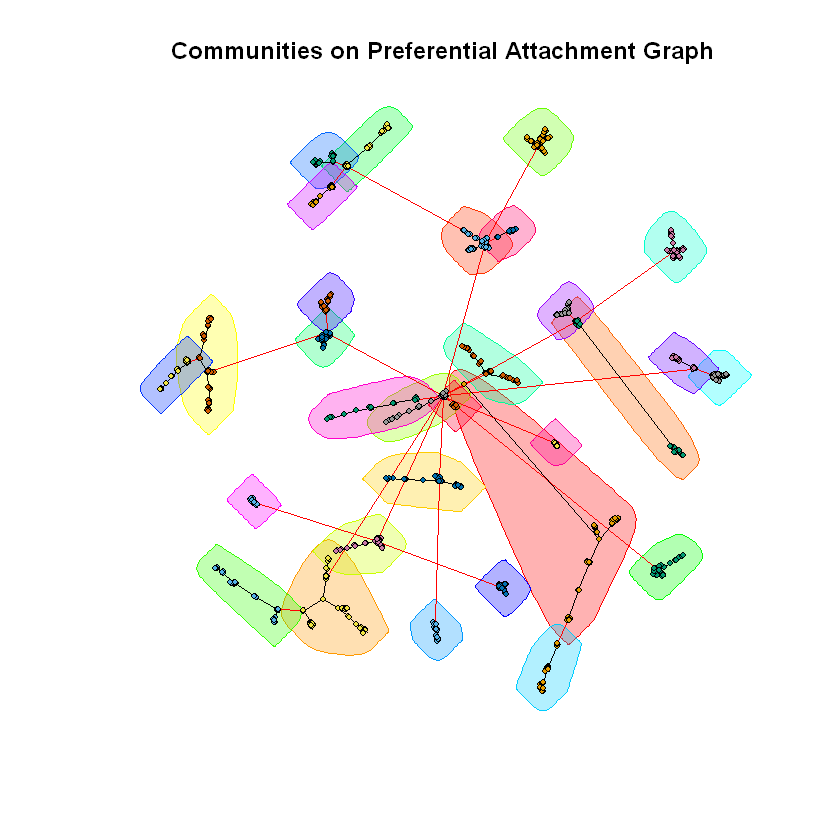

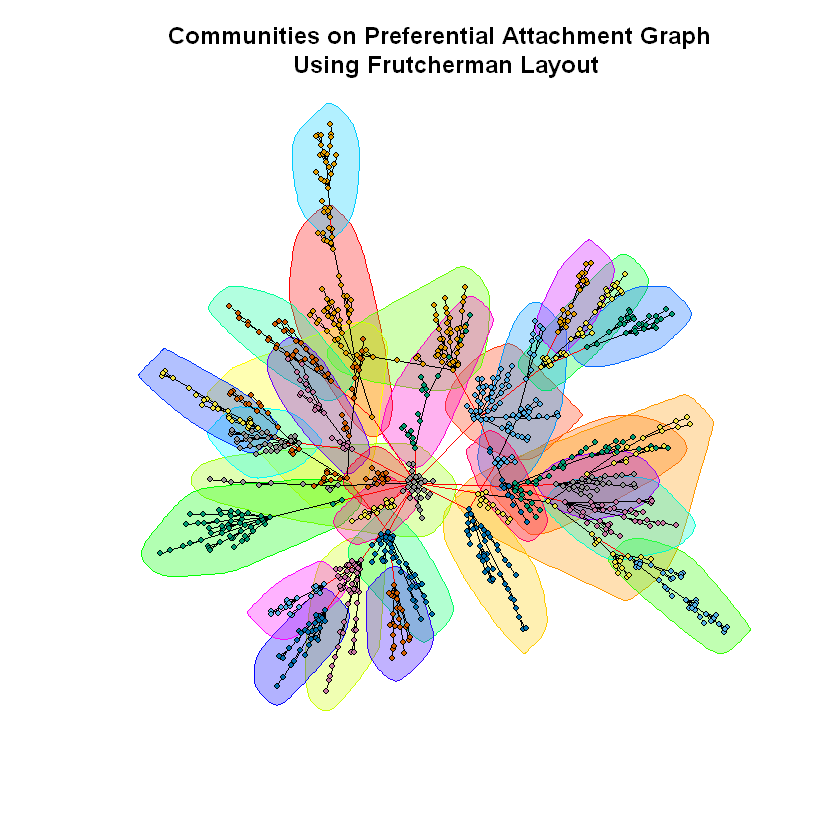

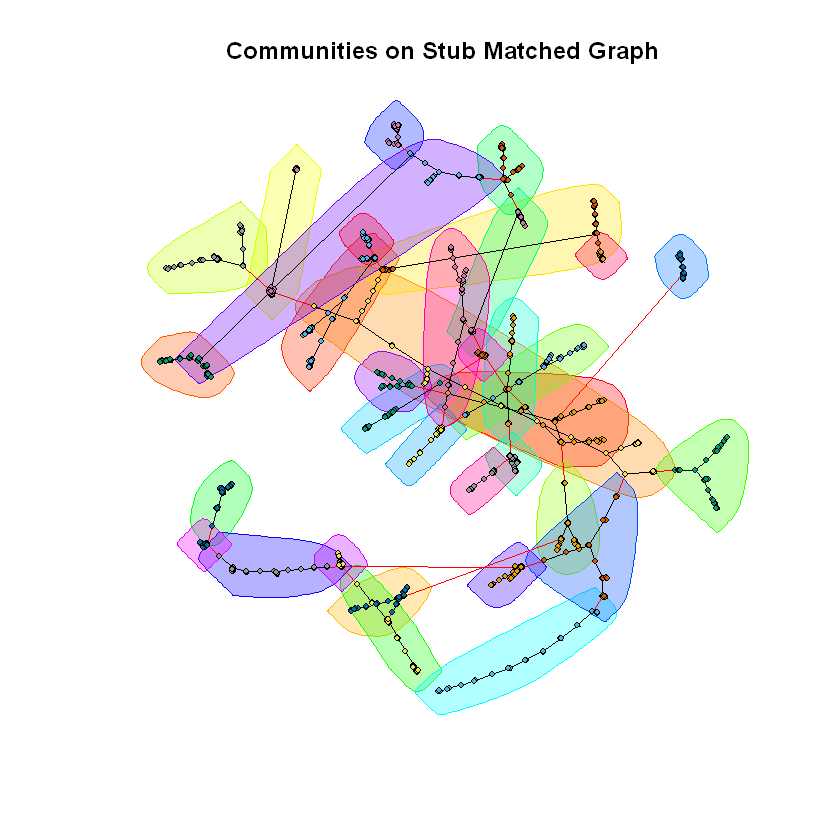

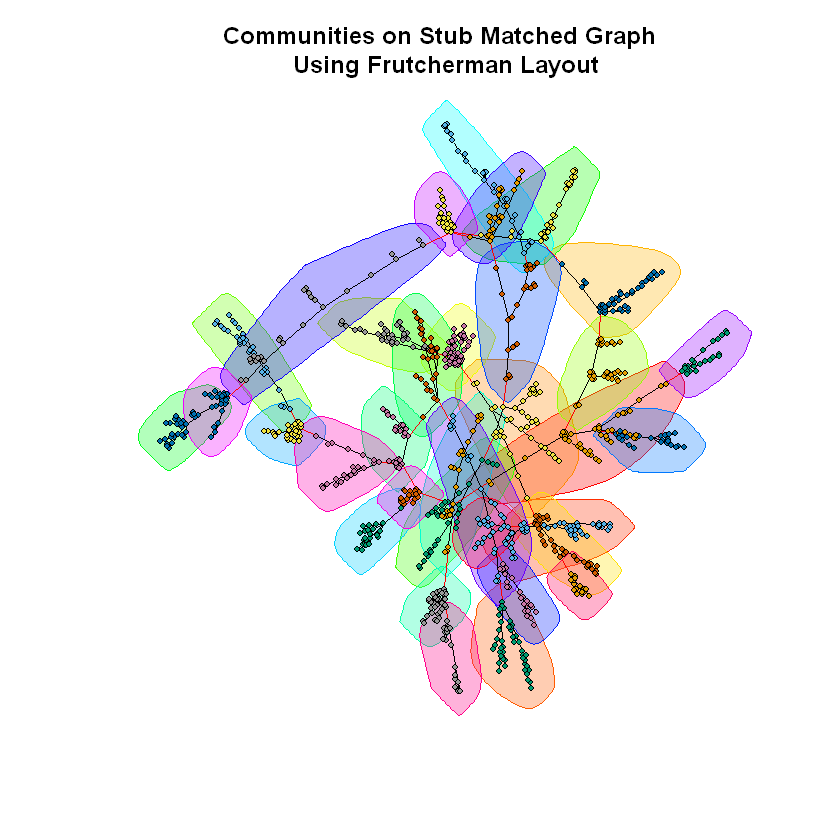

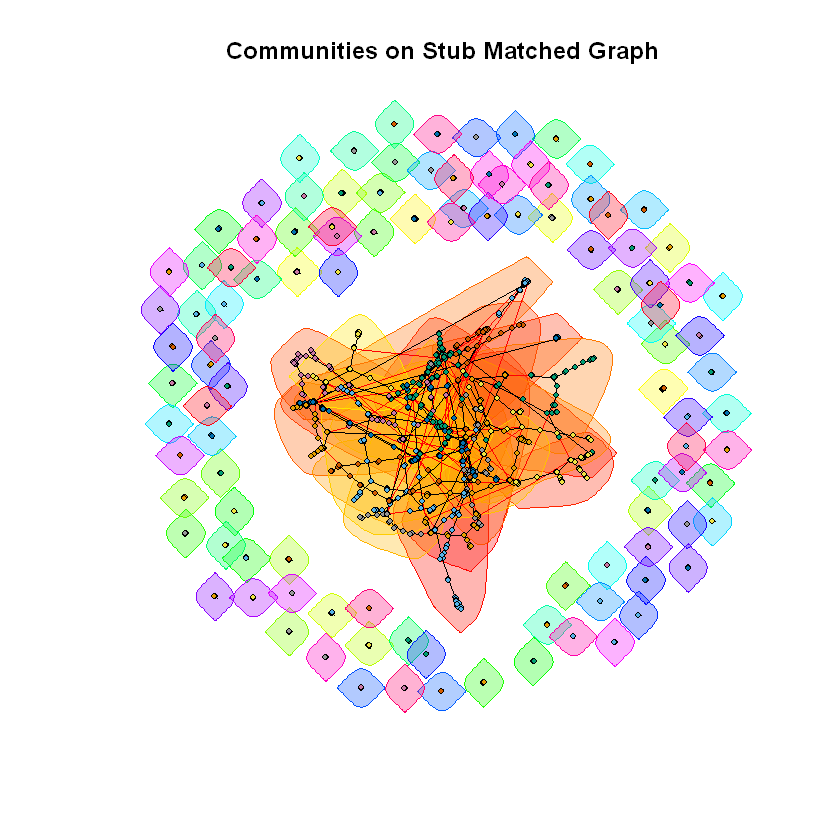

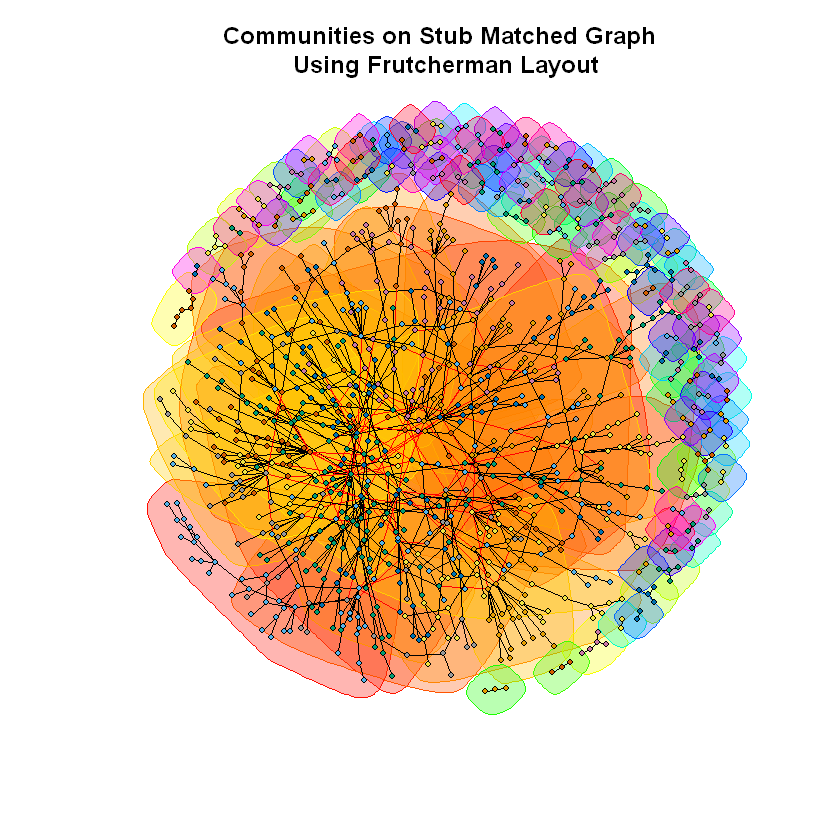

In [55]:
prefGraph = barabasi.game(n = 1000, m = 1, directed = F)
degreeSeq = degree(prefGraph)
stubGraph = degree.sequence.game(degreeSeq, method = c("vl"))
stubGraph2 = degree.sequence.game(degreeSeq, method = c("simple.no.multiple"))

is.connected(prefGraph)
is.connected(stubGraph)
is.connected(stubGraph2)

summary(prefGraph)
summary(stubGraph)
summary(stubGraph2)

fgPref <- fastgreedy.community(prefGraph) #loose version for connected components
modularity(fgPref)

fgStub <- fastgreedy.community(stubGraph) #loose version for connected components
modularity(fgStub)

fgStub2 <- fastgreedy.community(stubGraph2) #loose version for connected components
modularity(fgStub2)

layoutPref <-layout.fruchterman.reingold(prefGraph)
plot(fgPref, prefGraph, vertex.label=NA, vertex.size=2, main="Communities on Preferential Attachment Graph")
plot(fgPref, prefGraph, layout = layoutPref, vertex.label=NA, vertex.size=2, main = "Communities on Preferential Attachment Graph \n Using Frutcherman Layout")

layoutStub <-layout.fruchterman.reingold(stubGraph)
plot(fgStub, stubGraph, vertex.label=NA, vertex.size=2, main="Communities on Stub Matched Graph")
plot(fgStub, stubGraph, layout = layoutStub, vertex.label=NA, vertex.size=2, main = "Communities on Stub Matched Graph \n Using Frutcherman Layout")

layoutStub2 <-layout.fruchterman.reingold(stubGraph2)
plot(fgStub2, stubGraph2, vertex.label=NA, vertex.size=2, main="Communities on Stub Matched Graph")
plot(fgStub2, stubGraph2, layout = layoutStub2, vertex.label=NA, vertex.size=2, main = "Communities on Stub Matched Graph \n Using Frutcherman Layout")


### 3. Modified Preferential Attachment Model That Penalizes the Age of the of a Node 

IGRAPH 71ae7a3 U--- 1000 999 -- Aging Barabasi graph
+ attr: name (g/c), pa.exp (g/n), aging.exp (g/n), m (g/n), aging.bin
| (g/n), out.pref (g/l), zero.deg.appeal (g/n), zero.age.appeal (g/n),
| deg.coef (g/n), age.coef (g/n), time.window (g/n)


[1] TRUE

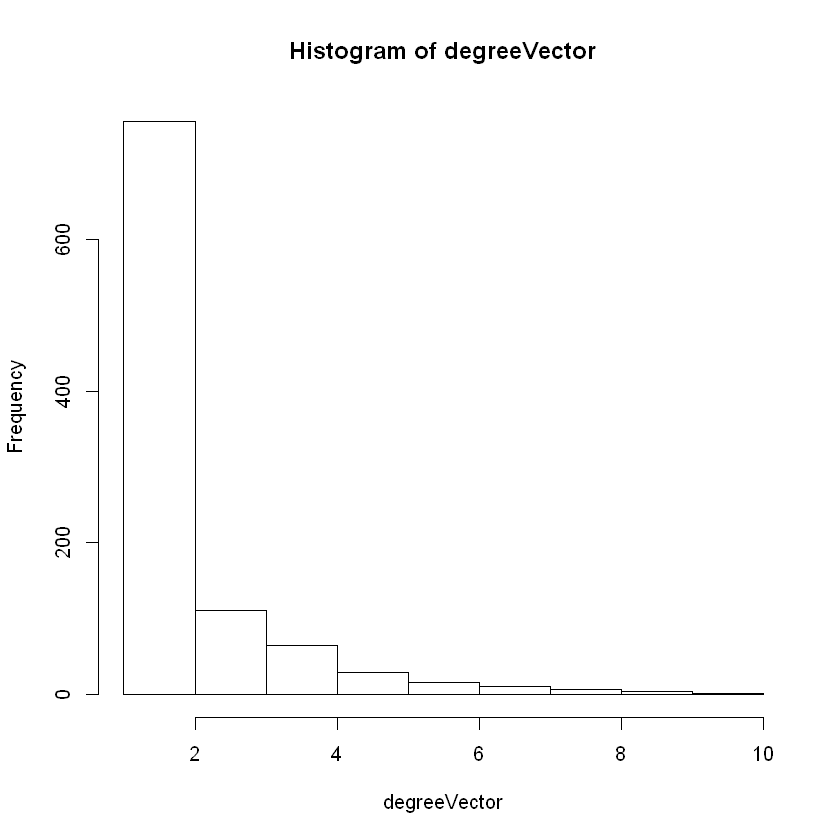


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      2.964       -2.658  



[1] 0.9358713

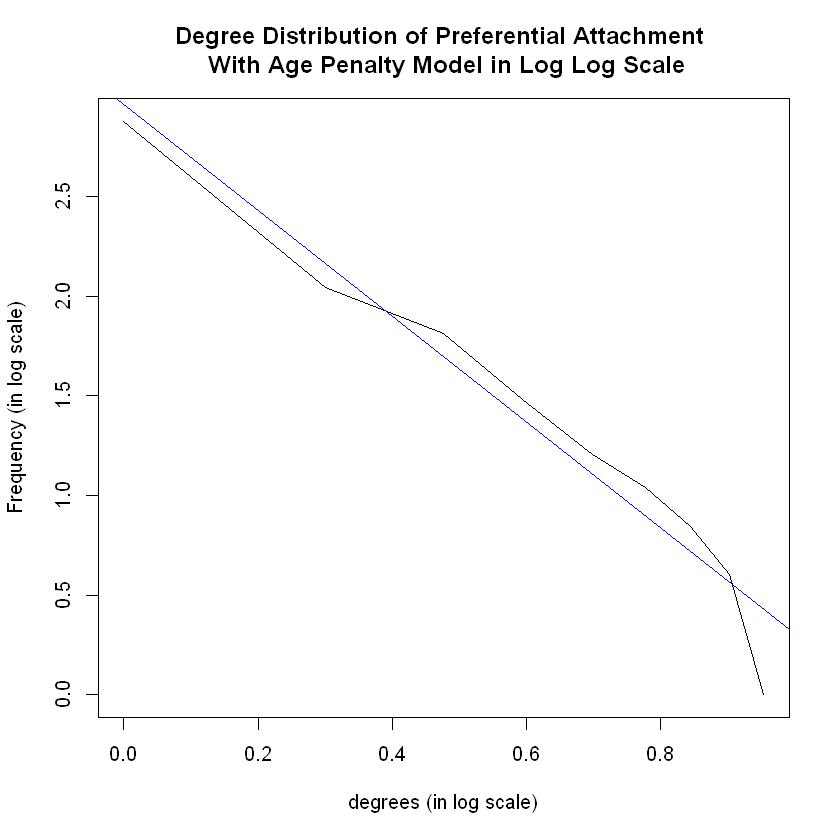

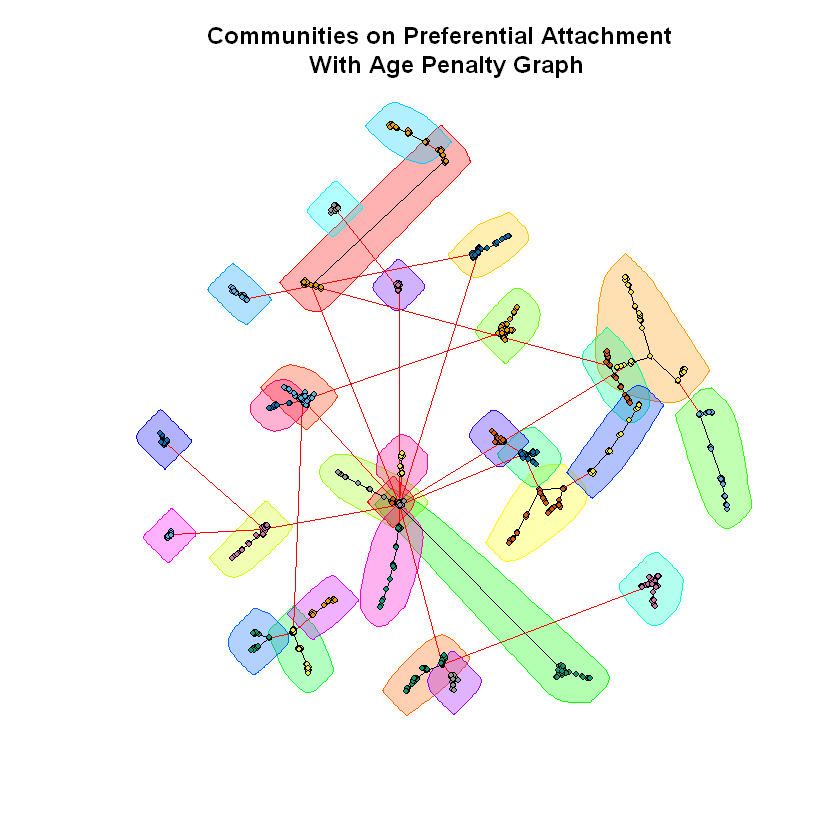

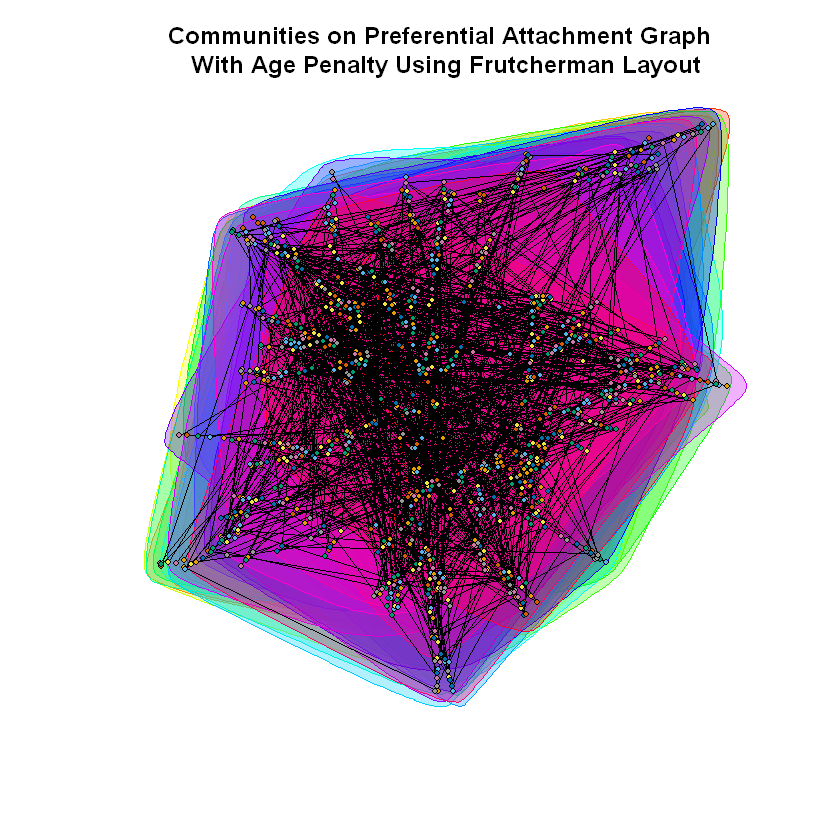

In [60]:
prefAgeGraph = sample_pa_age(1000, pa.exp = 1, aging.exp = -1, m = 1, directed = FALSE,
  zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)

summary(prefAgeGraph)
is.connected(prefAgeGraph)

degreeVector <- degree(prefAgeGraph)
title = "Degree Distribution of Preferential Attachment \n With Age Penalty Model in Log Log Scale"
plotDegreeDistribution(degreeVector, m = NA, n = 1000, title)

fg <- fastgreedy.community(prefAgeGraph) #loose version for connected components
cmsize <- sizes(fg)
modularity(fg)

layoutPref <-layout.fruchterman.reingold(prefAgeGraph)
plot(fgPref, prefGraph, vertex.label=NA, vertex.size=2, main="Communities on Preferential Attachment \n With Age Penalty Graph")
plot(fgPref, prefGraph, layout = layoutPref, vertex.label=NA, vertex.size=2, main = "Communities on Preferential Attachment Graph \n With Age Penalty Using Frutcherman Layout")


## Random Walk

In [8]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
#     rwSeq = c()    
    v = start_node
    for(i in 1:num_steps){
#         rwSeq = c(rwSeq, v)
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)    
    }
    
    return(v)
}

In [9]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [152]:
erGraphRW <- erdos.renyi.game(1000, 0.01, directed=F)
distMatrix <- shortest.paths(erGraphRW, mode = 'all')
transition_matrix = create_transition_matrix(erGraphRW)

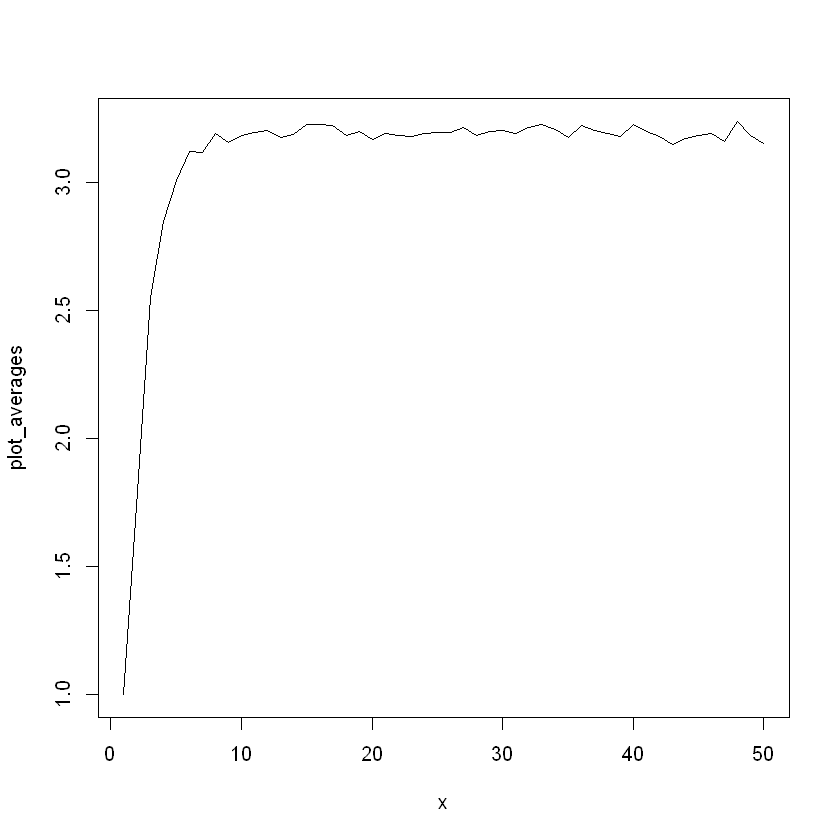

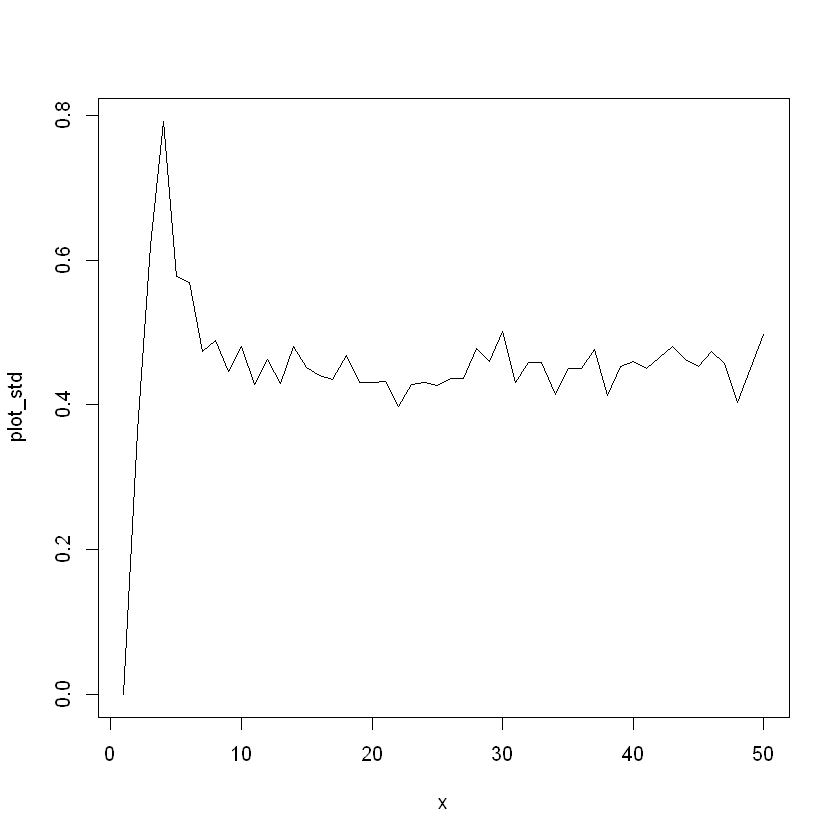

In [139]:
time_steps = 50
num_choices = 1000

plot_averages = c()
plot_std = c()

for(t in 1:time_steps){
    
    distances = c()
    
    for (choice in 1:num_choices){
        startNode = sample(1:vcount(erGraphRW),1)
        lastNode = random_walk(erGraphRW, t, startNode, transition_matrix)
    
        distance = distMatrix[startNode, lastNode]
        distances = c(distances, distance)
    }
    plot_averages = c(plot_averages, mean(distances))
    plot_std = c(plot_std, var(distances))
}

x <- seq(from = 1, to = time_steps)
plot(x, plot_averages, type='l')
plot(x, plot_std, type='l')


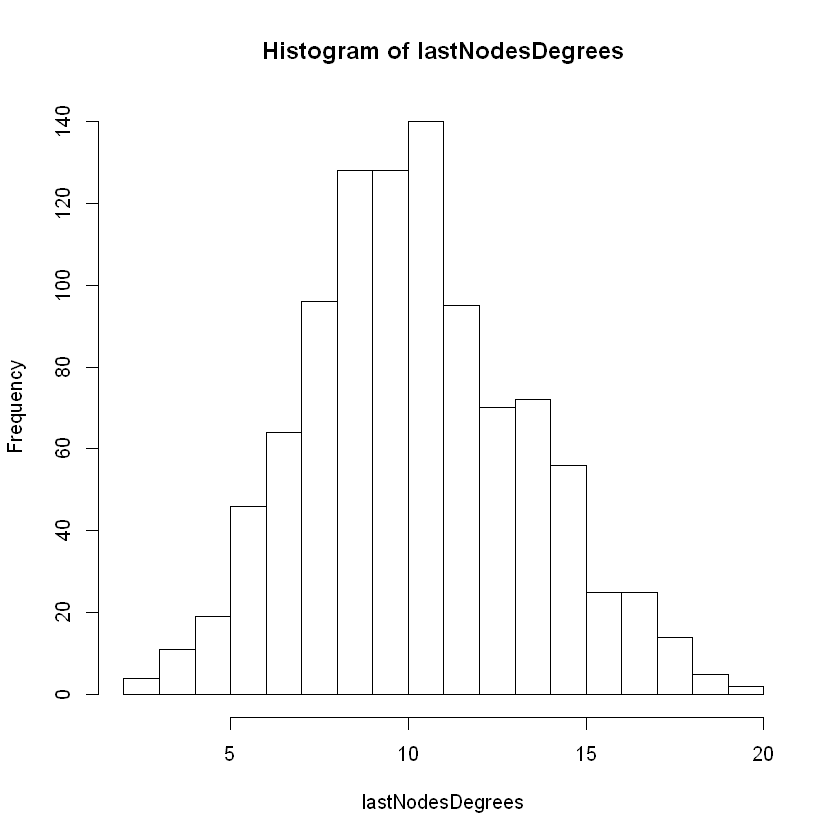

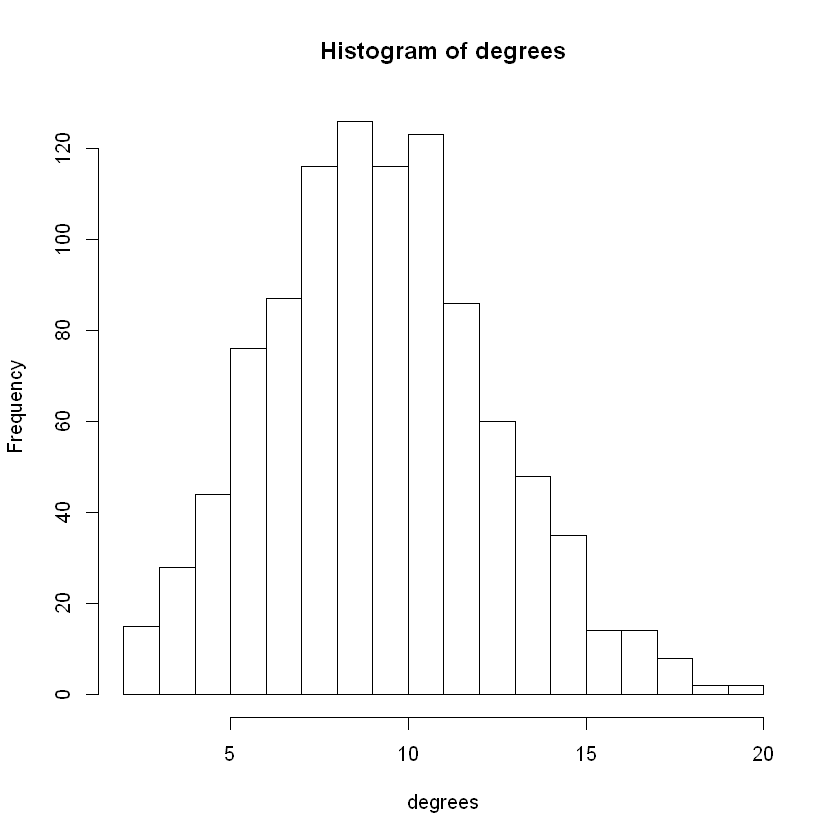

In [156]:
time_steps = 100
num_choices = 1000

lastNodesDegrees = c()

# for(t in 1:time_steps){    
    for (choice in 1:num_choices){
        startNode = sample(1:vcount(erGraphRW),1)
        lastNode = random_walk(erGraphRW, time_steps, startNode, transition_matrix)
    
        lastNodesDegrees = c(lastNodesDegrees, degree(erGraphRW, v=lastNode))
    }
# }

degrees = degree(erGraphRW)
hist(lastNodesDegrees, breaks = max(degrees) - min(degrees))
hist(degrees, breaks = max(degrees) - min(degrees))

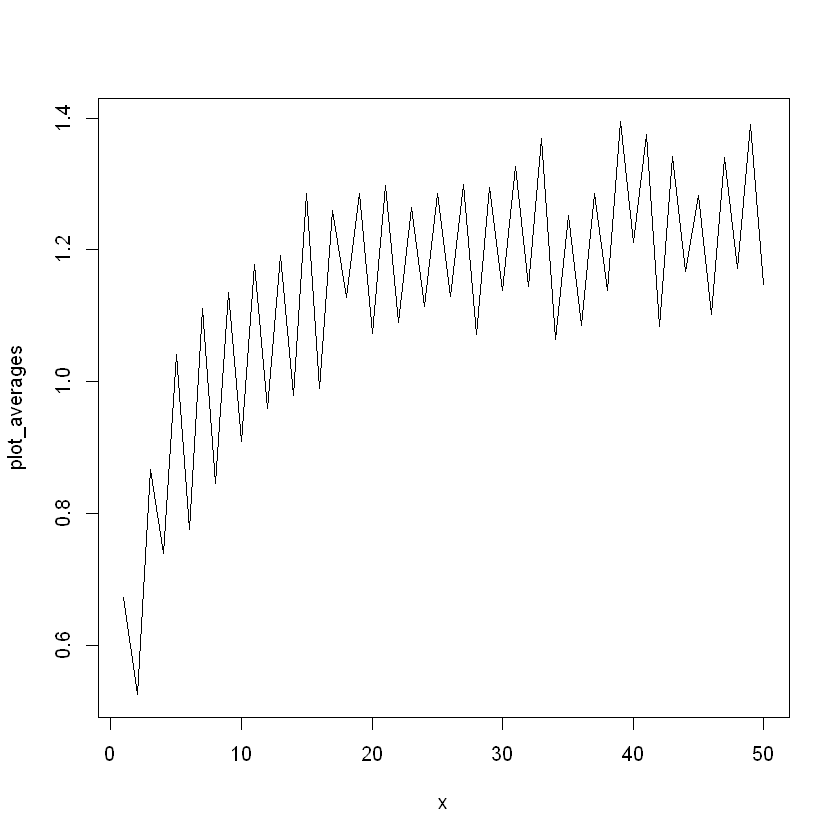

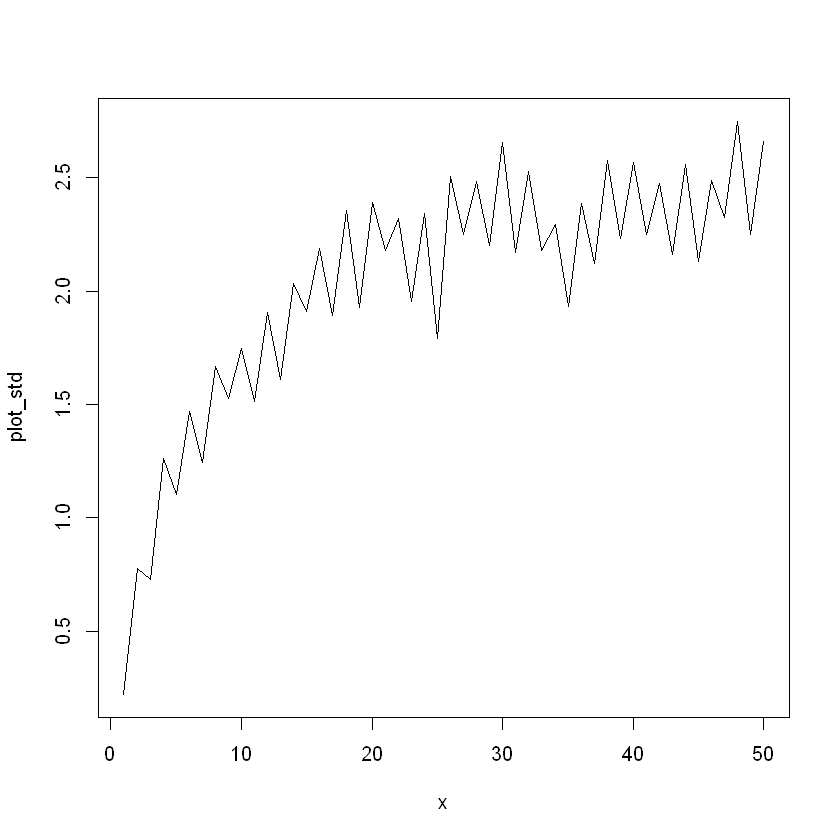

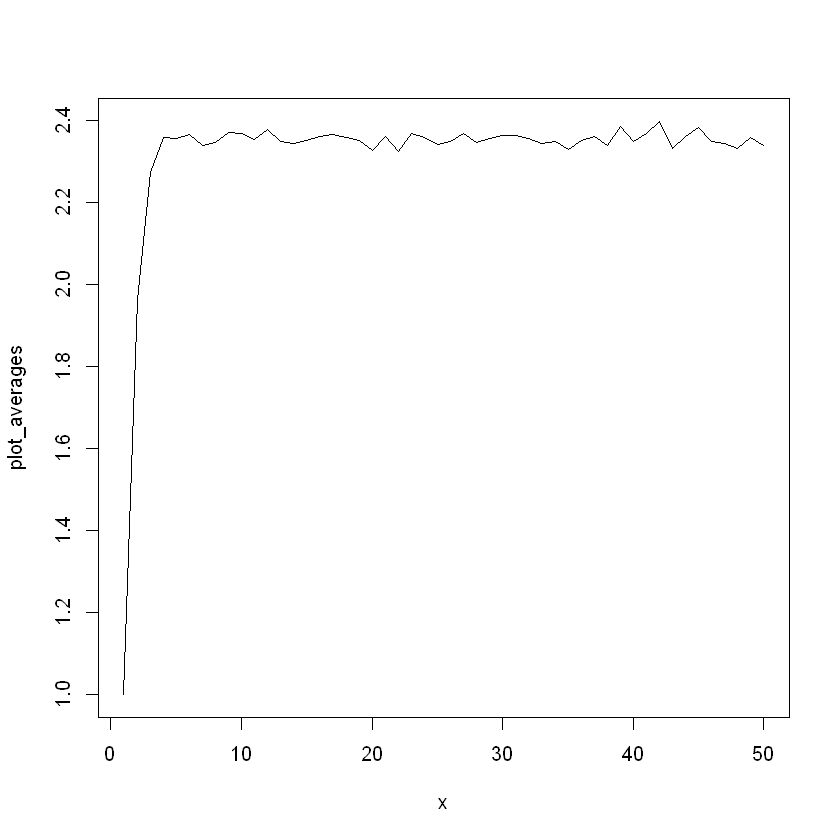

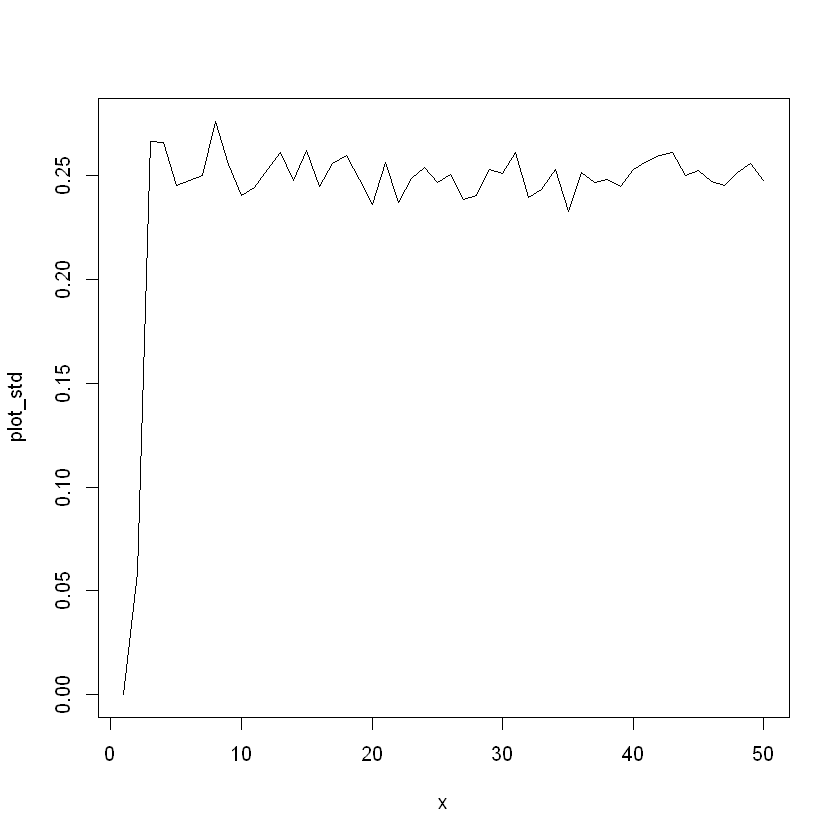

In [141]:
numNodesList = c(100, 10000)

for (numNodes in numNodesList){
    erGraphRW <- erdos.renyi.game(numNodes, 0.01, directed=F)
    distMatrix <- shortest.paths(erGraphRW, v=V(erGraphRW), to=V(erGraphRW))
    transition_matrix = create_transition_matrix(erGraphRW)

    time_steps = 50
    num_choices = 1000

    plot_averages = c()
    plot_std = c()

    for(t in 1:time_steps){

        distances = c()

        for (choice in 1:num_choices){
            startNode = sample(1:vcount(erGraphRW),1)
            lastNode = random_walk(erGraphRW, t, startNode, transition_matrix)

            distance = distMatrix[startNode, lastNode]
            distances = c(distances, distance)
        }
        plot_averages = c(plot_averages, mean(distances))
        plot_std = c(plot_std, var(distances))
    }

    x <- seq(from = 1, to = time_steps)
    plot(x, plot_averages, type='l')
    plot(x, plot_std, type='l')
}

In [53]:
numNodesList = c(100, 1000, 10000)
for (numNodes in numNodesList){
    erGraphRW <- erdos.renyi.game(numNodes, 0.01, directed=F)
    print(numNodes)
    print(diameter(erGraphRW))
}

[1] 100
[1] 6
[1] 1000
[1] 6
[1] 10000
[1] 3


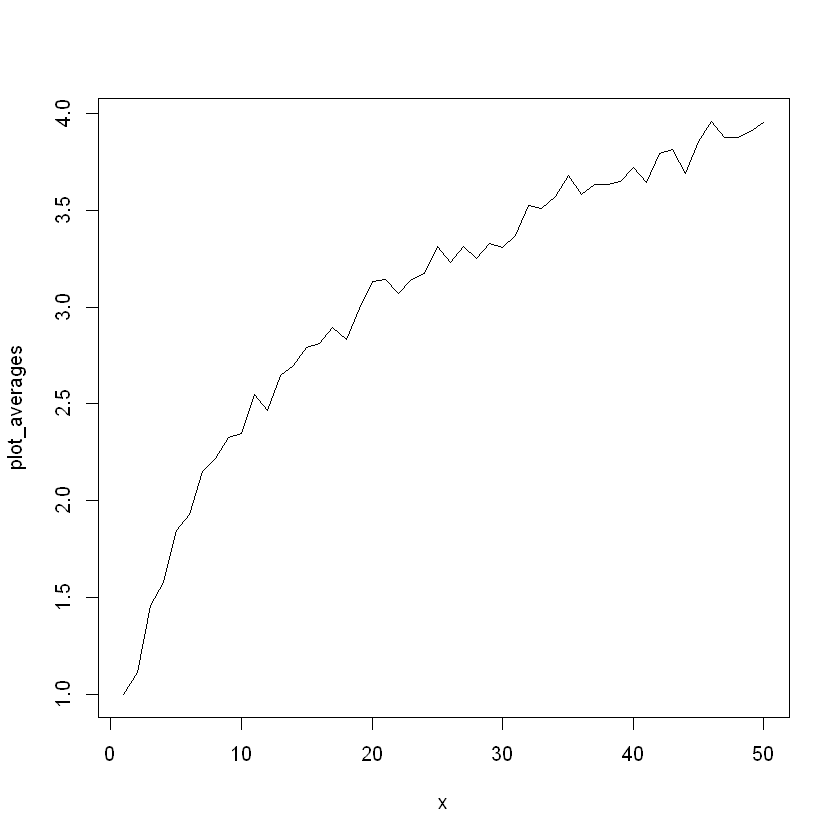

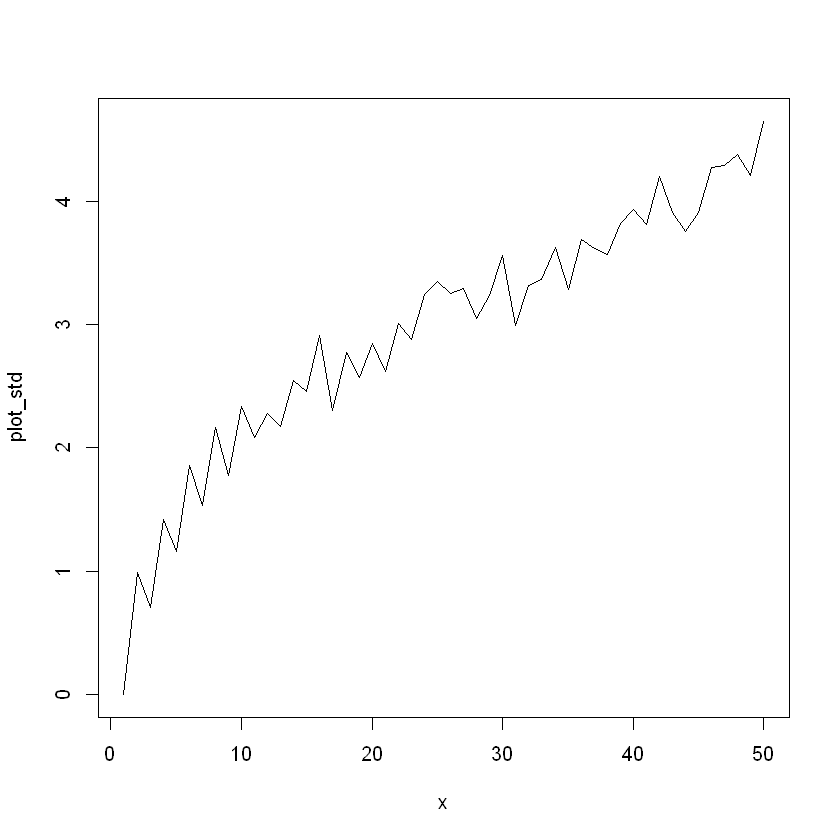

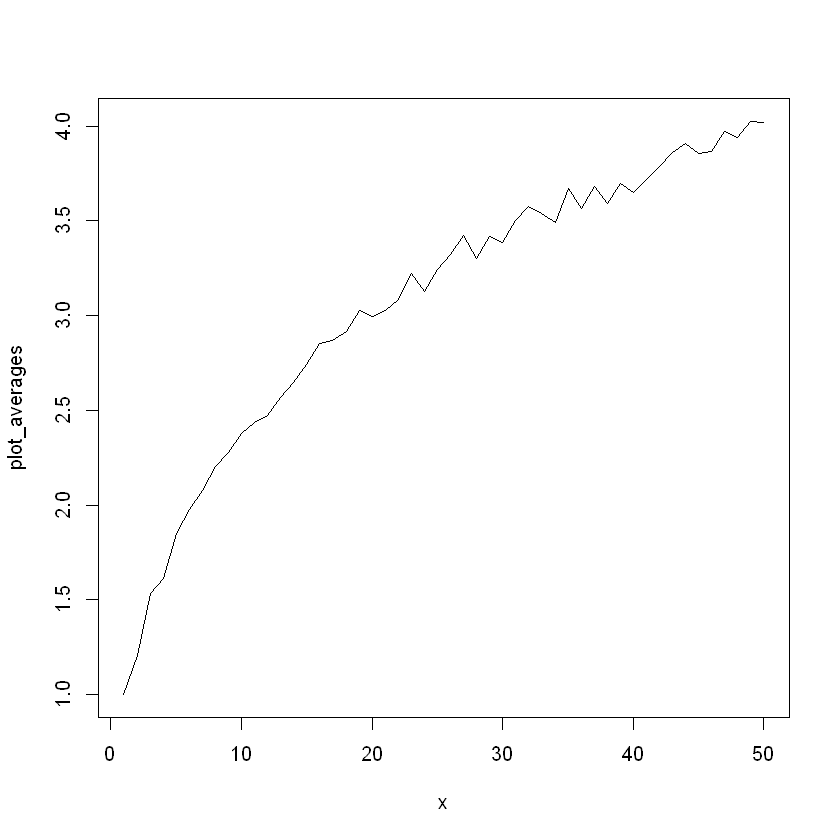

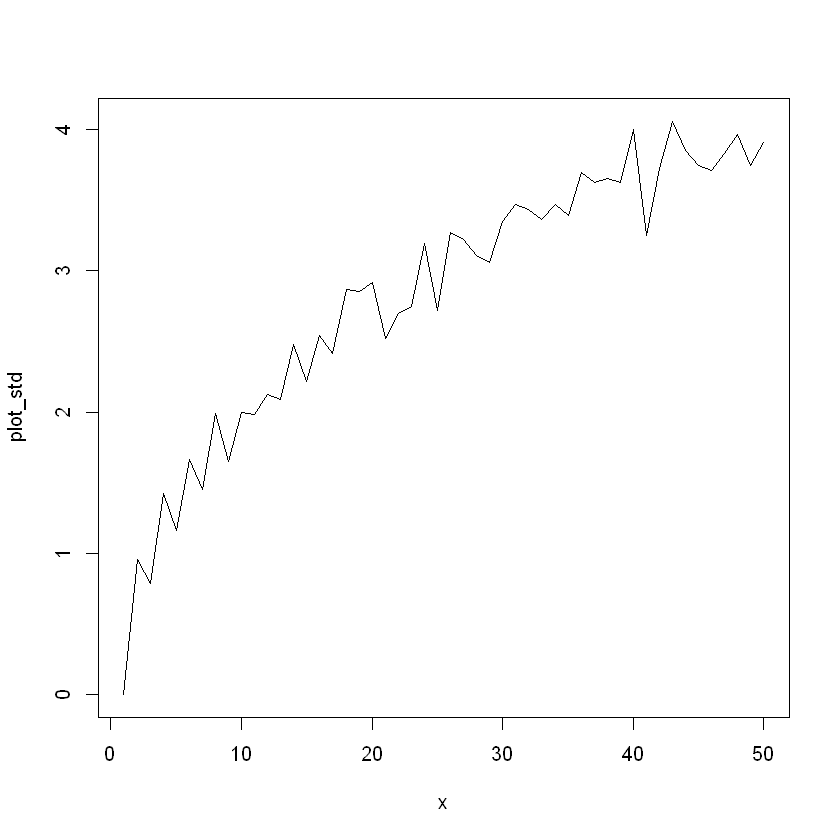

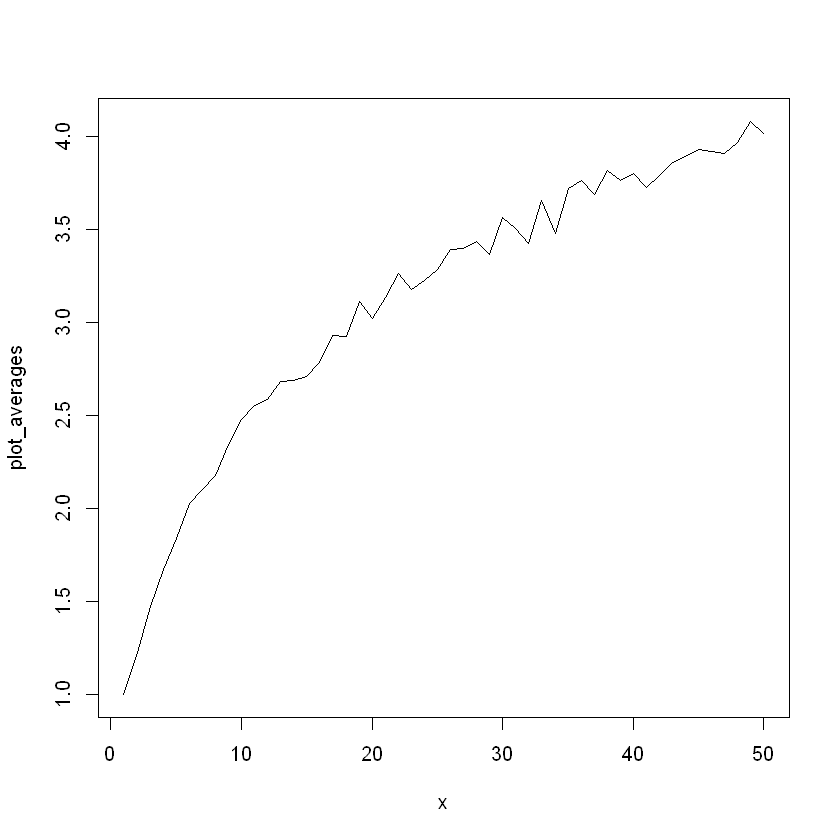

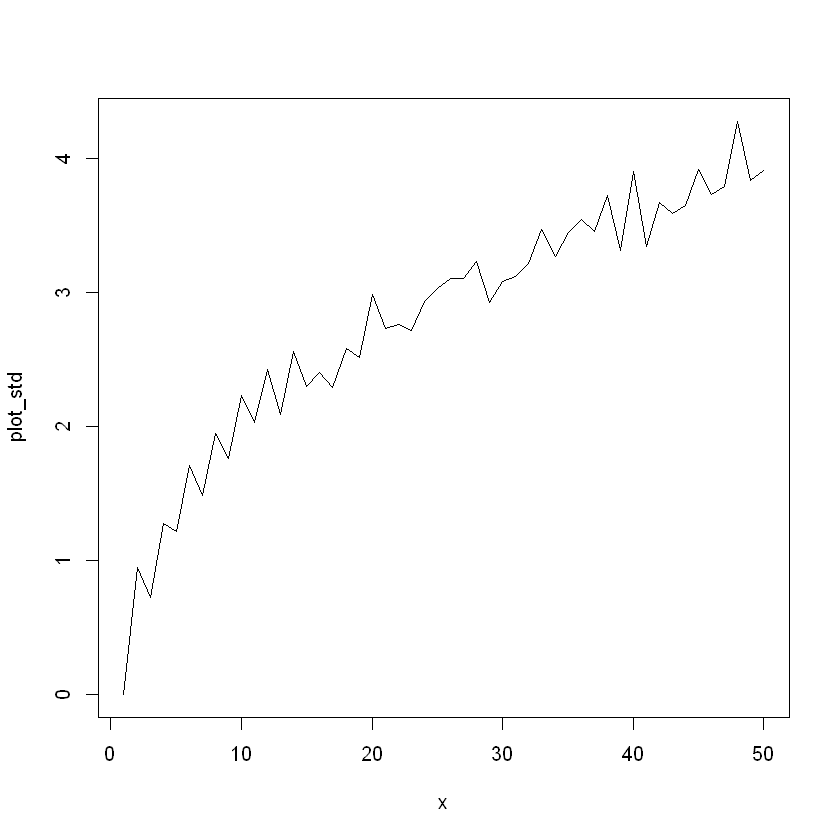

In [142]:
numNodesList = c(100, 1000, 10000)
# numNodesList = c(1000)

for (numNodes in numNodesList){
    fatGraphRW <- barabasi.game(numNodes, m=1, directed=F)
    distMatrix <- shortest.paths(fatGraphRW, v=V(fatGraphRW), to=V(fatGraphRW))
    transition_matrix = create_transition_matrix(fatGraphRW)

    time_steps = 50
    num_choices = 1000

    plot_averages = c()
    plot_std = c()

    for(t in 1:time_steps){

        distances = c()

        for (choice in 1:num_choices){
            startNode = sample(1:vcount(fatGraphRW),1)
            lastNode = random_walk(fatGraphRW, t, startNode, transition_matrix)

            distance = distMatrix[startNode, lastNode]
            distances = c(distances, distance)
        }
        plot_averages = c(plot_averages, mean(distances))
        plot_std = c(plot_std, var(distances))
    }

    x <- seq(from = 1, to = time_steps)
    plot(x, plot_averages, type='l')
    plot(x, plot_std, type='l')
}

In [157]:
fatGraphRW <- barabasi.game(1000, m=1, directed=F)
distMatrix <- shortest.paths(fatGraphRW, v=V(fatGraphRW), to=V(fatGraphRW))
transition_matrix = create_transition_matrix(fatGraphRW)


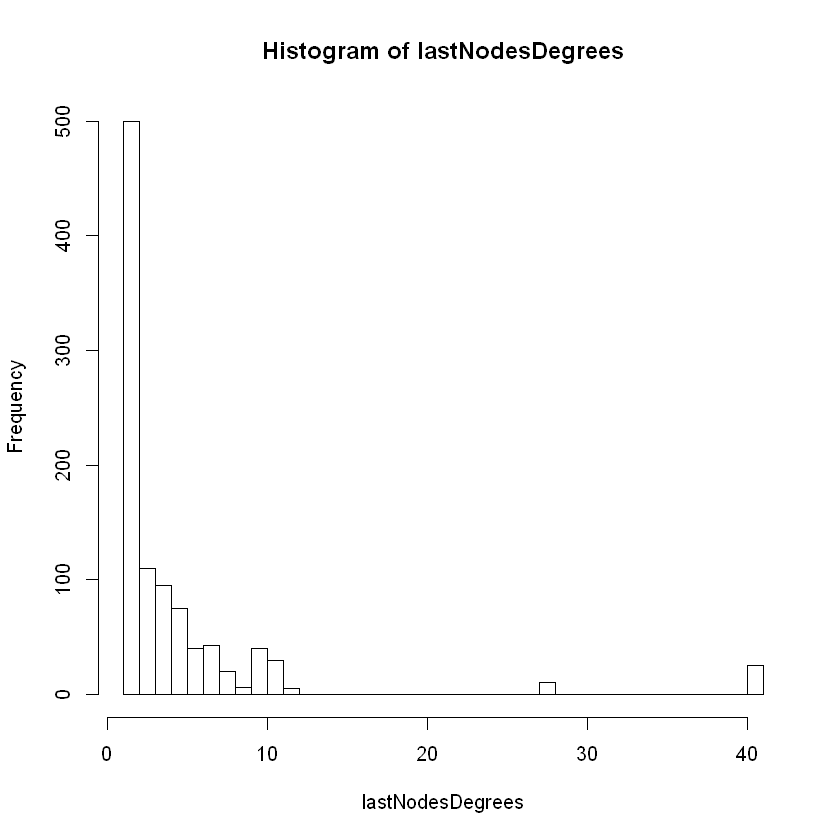

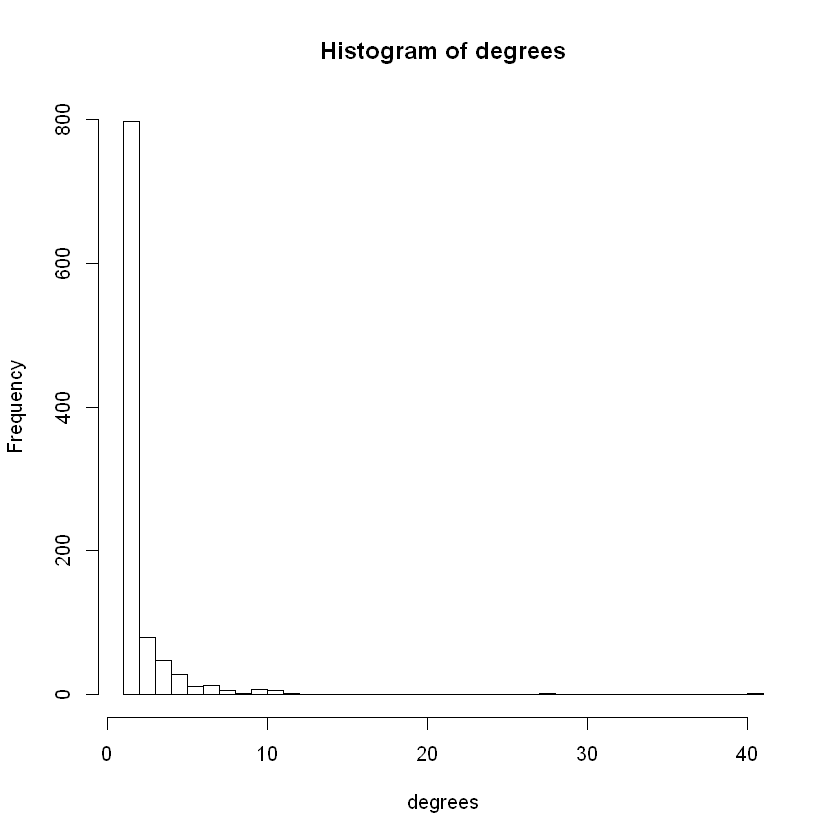

In [159]:
time_steps = 100
num_choices = 1000

lastNodesDegrees = c()

# for(t in 1:time_steps){    
    for (choice in 1:num_choices){
        startNode = sample(1:vcount(fatGraphRW),1)
        lastNode = random_walk(fatGraphRW, time_steps, startNode, transition_matrix)
    
        lastNodesDegrees = c(lastNodesDegrees, degree(fatGraphRW, v=lastNode))
    }
# }

degrees = degree(fatGraphRW)
hist(lastNodesDegrees, breaks = max(degrees) - min(degrees))
hist(degrees, breaks = max(degrees) - min(degrees))

## pagerank 2.3(a)

In [31]:
# page_rank_random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
#     if(is.null(transition_matrix))
#         transition_matrix = create_transition_matrix(g)
#     rwSeq = c()    
#     v = start_node
#     for(i in 1:num_steps){
#         rwSeq = c(rwSeq, v)
#         #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
#         PMF = transition_matrix[v, ]
#         v = sample(1:vcount(g), 1, prob = PMF)    
#     }
    
#     return(rwSeq)
# }

In [132]:
# prGraphRW <- barabasi.game(100, m=4, directed=T)
# transition_matrix = create_transition_matrix(prGraphRW)

# startNode = sample(1:vcount(prGraphRW), 1)  

# numStepsRandomWalk = 100
# seq = page_rank_random_walk(prGraphRW, numStepsRandomWalk, startNode, transition_matrix)

# # degrees = degree(prGraphRW)
# res = hist(seq, breaks = 100)

# visitCounts = res$counts

# adjList = as_adj_list(prGraphRW, mode="all")
# degrees = c()

# for (i in 1:vcount(prGraphRW)){
#     degree = length(adjList[[i]])
#     degrees = c(degrees, degree)
# }

# hist(degrees, breaks = 100)

# probsVisitCounts = visitCounts / numStepsRandomWalk

# degrees

In [25]:
page_rank_random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    rwSeq = c()    
    v = start_node
    for(i in 1:num_steps){
        rwSeq = c(rwSeq, v)
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)    
    }
    
    return(v)
}

In [138]:
numNodes = 1000
prGraphRW <- barabasi.game(numNodes, m=4, directed=T)
transition_matrix = create_transition_matrix(prGraphRW)

In [139]:
adjList = as_adj_list(prGraphRW, mode="all")
degrees = c()

for (i in 1:vcount(prGraphRW)){
    degree = length(adjList[[i]])
    degrees = c(degrees, degree)
}
degrees

[1] 341 309 285 211 146 160   7 181 106   8  67  17  28  33  72  43  30  82
  [19]  22   5  25  30  17  47 106  19  14  16  11  20  98   9  14   4   6  18
  [37]  26  14  35  15  39   4   9  21   7   6  25  37   5  11  14  21   8   8
  [55]  18  10  13  20  12   9  10   7  27   8   4   4  15  15  61  18   6  13
  [73]   4   9   5   8  12   9  12   5   4   9  10  11  11   6   9   5   4  17
  [91]   4   6   9   9   4   6  23   6   8   4  13  13   6  18   8   4  13  12
 [109]   7  11   5  14   6   8   7   6  20   6   9   4  15   4  17   5  18  19
 [127]   8   8   5   8  13   6   5   7   6   6   6  11   9   6  12  13  13  16
 [145]   4   6   6   8   5   8   8   9  13   4   6   6   9   5   9   5  11   8
 [163]  13   6  14   4   4   9  12   5   4   7   5  19   9   5   7   5   5   7
 [181]   6   7   4   4  13   7   7   4  13   4   4   6   4   6  11   6   6  12
 [199]   4   6   4   4   4   4   4   6   5   5   4   4   4   4   9   5  11   7
 [217]   5   5   6   6  24   4   7  10  14   4   5   6  19   6   4   6   4   7
 [235]  11   8   4   4   5   9   4   5   5   4   6   6   7   6   4   5   6   4
 [253]   4   5   9   5   9   4   5   6   4   8   4   5   8  11   8   5   4   8
 [271]   9   4   5   4   5   6   7   4   5   7   7   4   4   4   5   6   8   6
 [289]   4   9   5   4   5   5   4   8   4   6   6   4   5   5   5   5   4   4
 [307]   5   7   5   4   4   7   5   5   4   4   4   4   8   5   5   4   7   5
 [325]   4   6   4   4   5   9   4   5   4   4   4   8   4   4   4   5   4   6
 [343]  16   4   4   4   9   4   5   5   6   4   4   6   7   5   4   4   4   8
 [361]   7   4   5   4   4   5   4   4   4   5   5   4   6   5   6   4   4   4
 [379]   7   4   4   4   9   5   4   7   4   4   9   4   6   7   6   5   6   5
 [397]   4   4   5   6   4   4   4   4   9   6   4   7  10   4   4   4   5   4
 [415]   4   5   7   4   6   4   5   4   5   4   4   8   5   6   6   4   7   4
 [433]   4   4   5   4   6   5   5   5   4   5   4   8   6   6   6   4   4   5
 [451]   5   4   7   9   5   5   4   4   4   5   4   8   5   5   4   6   4   4
 [469]   4   5   5   4   4   5   6   4   4   5   5   4  10   4   4   4   5   7
 [487]   5   4   4   4   4   4   4   4   4   4   5   6   4   4   4   4   4   5
 [505]   4   4   4   5   5   4   4   4   4   4   4   4   4   5   4   4   4   4
 [523]   4   4   4   4   4   5   4   5   4   4   4   5   4   4   4   4   5   4
 [541]   5   4   4   4   4   4   4   4   5   4   4   5   4   4   4   4   4   4
 [559]   4   4   4   5   4   4   4   4   4   4   4   4   5   4   4   4   5   6
 [577]   4   4   5   4   9   4   4   4   4   4  10   5   4   8   4   7   5   5
 [595]   4   4   6   4   4   4   5   4   4   5   5   4   5   5   6   4   4   4
 [613]   4   5   4   4   6   4   5   5   5   5   4   4   4   5   4   4   4   4
 [631]   5   4   5   5   5   4   5   4   4   4   4   4   6   5   5   4   4   5
 [649]   4   6   5   4   4   4   5   4   5   5   4   5   5   4   5   4   4   4
 [667]   4   4   4   5   4   5   4   4   5   4   4   6   5   4   4   4   4   4
 [685]   4   4   4   4   4   4   4   4   5   4   4   5   4   4   4   4   4   4
 [703]   4   4   4   4   5   4   5   4   4   5   5   4   4   4   4   4   5   4
 [721]   4   4   4   4   5   4   4   4   4   5   4   5   4   5   4   4   4   4
 [739]   4   4   4   4   4   4   5   4   4   4   4   4   4   4   5   4   4   6
 [757]   6   4   4   4   4   4   4   4   4   4   4   4   4   5   4   4   4   4
 [775]   4   4   4   4   4   4   4   5   5   4   4   4   4   4   4   4   4   6
 [793]   4   5   5   4   4   4   4   4   4   4   4   5   4   4   4   4   5   4
 [811]   4   4   4   5   4   4   4   4   4   4   4   5   4   4   4   5   4   4
 [829]   4   4   4   4   4   4   4   5   4   4   4   4   4   4   4   4   4   4
 [847]   4   5   4   4   4   4   4   5   6   4   4   4   4   4   4   4   4   5
 [865]   4   4   4   5   4   4   5   4   4   4   4   4   4   4   6   4   4   4
 [883]   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
 [901]   4   4   5   4   4   4   4   4   4   4   4   

In [140]:
# numNodes = 1000
# prGraphRW <- barabasi.game(numNodes, m=4, directed=T)
# transition_matrix = create_transition_matrix(prGraphRW)

nodeProbs = rep(0,numNodes)
numStepsRandomWalk = 100
nItr = 100
for(itr in 1:nItr){
    startNode = sample(1:vcount(prGraphRW), 1)  

    lastNode = page_rank_random_walk(prGraphRW, numStepsRandomWalk, startNode, transition_matrix)
    nodeProbs[[lastNode]] = nodeProbs[[lastNode]]+1
}
pageRankVector = nodeProbs / nItr
# hist(pageRankVector, breaks = numNodes )

adjList = as_adj_list(prGraphRW, mode="all")
degrees = c()

for (i in 1:vcount(prGraphRW)){
    degree = length(adjList[[i]])
    degrees = c(degrees, degree)
}


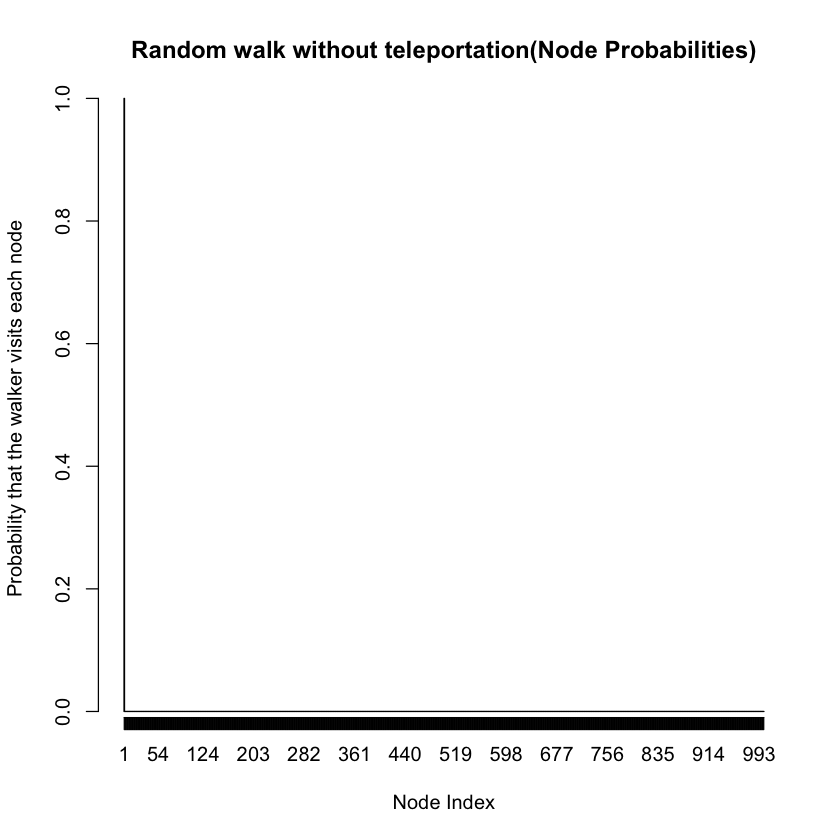

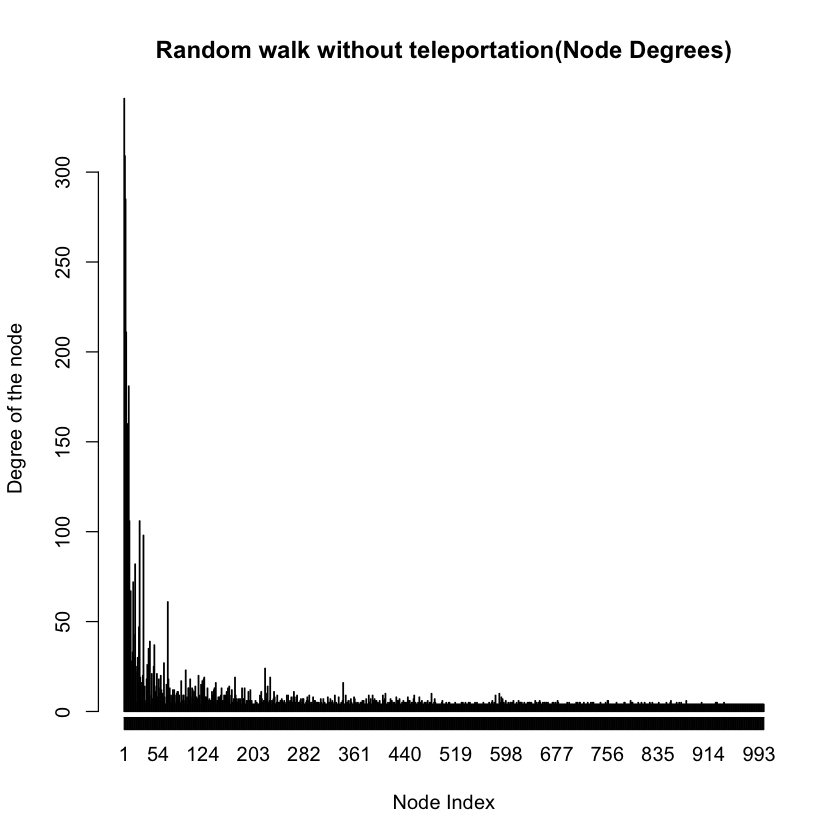

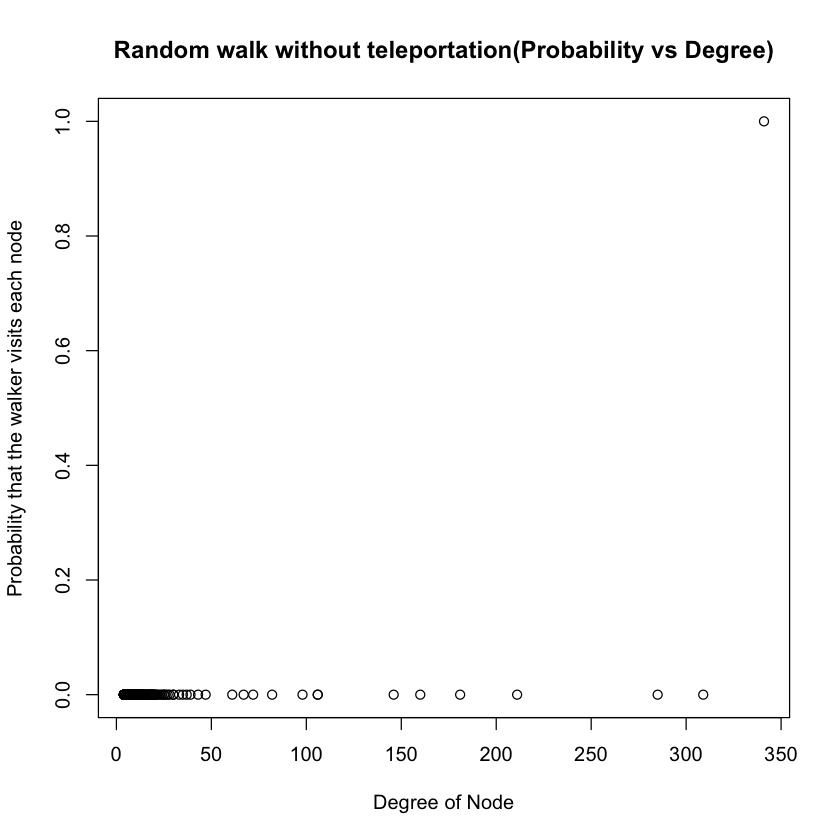

In [141]:
mp1 <- barplot(pageRankVector, main='Random walk without teleportation(Node Probabilities)', xlab='Node Index', ylab='Probability that the walker visits each node')
axis(1,at=mp1,labels=seq(1,1000,1))
mp2 <- barplot(degrees, main='Random walk without teleportation(Node Degrees)', xlab='Node Index', ylab='Degree of the node')
axis(1,at=mp2,labels=seq(1,1000,1))
plot(degrees, pageRankVector, main='Random walk without teleportation(Probability vs Degree)', xlab='Degree of Node', ylab='Probability that the walker visits each node')

## 2.3(b)

In [142]:
page_rank_random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    rwSeq = c()    
    v = start_node
    for(i in 1:num_steps){
        rwSeq = c(rwSeq, v)
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)    
    }
    
    return(v)
}

In [143]:
# numNodes = 1000
# prGraphRW <- barabasi.game(numNodes, m=4, directed=T)
# transition_matrix = create_transition_matrix(prGraphRW)

# print(transition_matrix)

nodeProbs = rep(0,numNodes)
numStepsRandomWalk = 100
nItr = 100
alpha=0.15

d = 1 - alpha
ones = matrix(1, vcount(prGraphRW), vcount(prGraphRW))
new_transition_matrix = d*transition_matrix + (1-d)*(1/vcount(prGraphRW))*ones

# print(new_transition_matrix)

for(itr in 1:nItr){
    startNode = sample(1:vcount(prGraphRW), 1)  
    lastNode = page_rank_random_walk(prGraphRW, numStepsRandomWalk, startNode, new_transition_matrix)
 
    nodeProbs[[lastNode]] = nodeProbs[[lastNode]]+1
}

pageRankVector2 = nodeProbs / nItr

adjList = as_adj_list(prGraphRW, mode="all")
degrees = c()

for (i in 1:vcount(prGraphRW)){
    degree = length(adjList[[i]])
    degrees = c(degrees, degree)
}

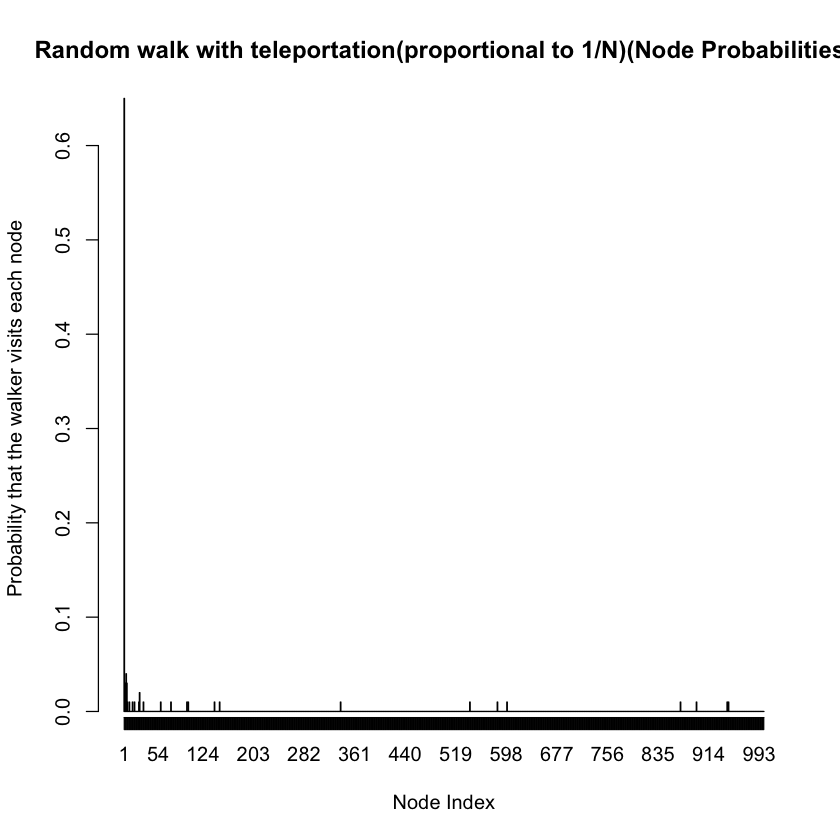

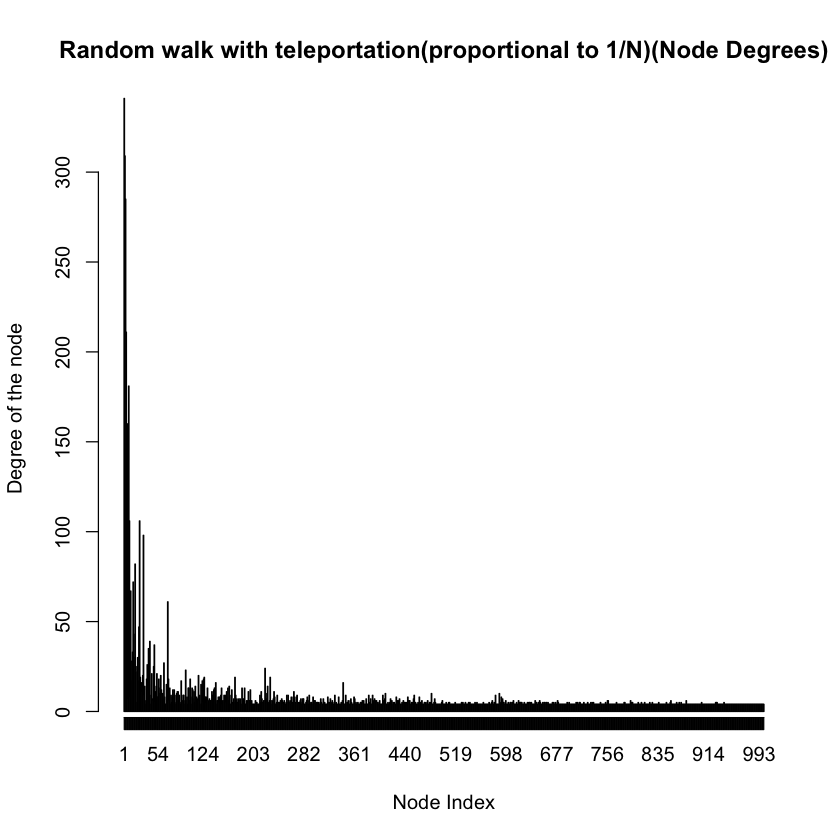

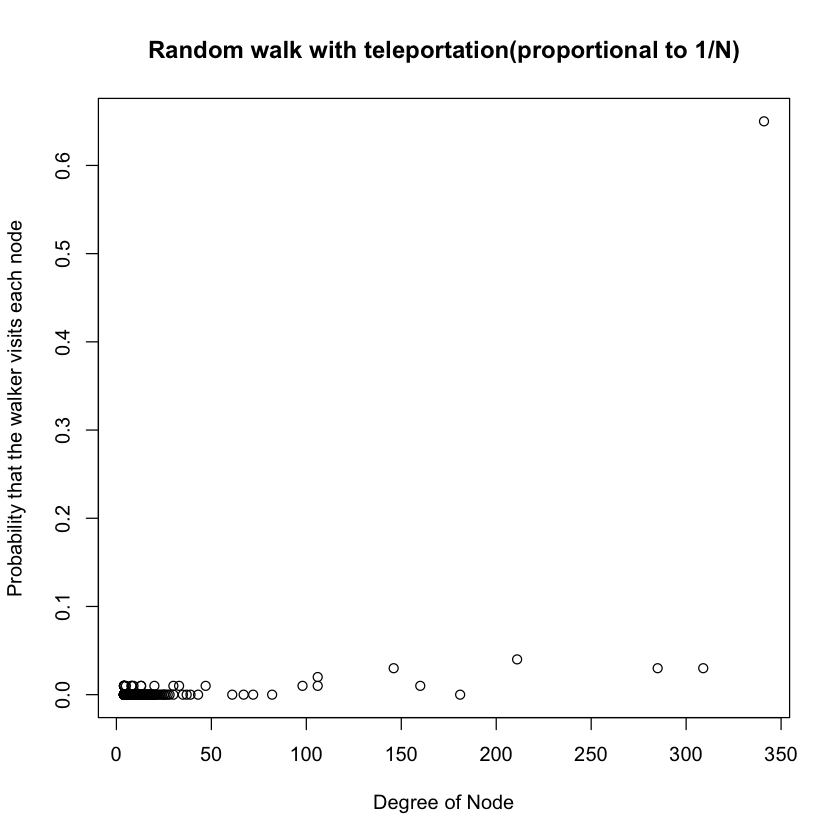

In [144]:
mp1 <- barplot(pageRankVector2, main='Random walk with teleportation(proportional to 1/N)(Node Probabilities)', xlab='Node Index', ylab='Probability that the walker visits each node')
axis(1,at=mp1,labels=seq(1,1000,1))
mp2 <- barplot(degrees, main='Random walk with teleportation(proportional to 1/N)(Node Degrees)', xlab='Node Index', ylab='Degree of the node')
axis(1,at=mp2,labels=seq(1,1000,1))
plot(degrees, pageRankVector2, main='Random walk with teleportation(proportional to 1/N)', xlab='Degree of Node', ylab='Probability that the walker visits each node')

In [145]:
page_rank_random_walk_teleportation = function (g, num_steps, start_node, alpha, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    adjList = as_adj_list(g, mode="out")
    rwSeq = c()    
    v = start_node
    for(i in 1:num_steps){
        rwSeq = c(rwSeq, v)
        
        degree = length(adjList[[v]])
        
#         if (degree == 0){
#             v = sample(1:vcount(g), 1)    
#         } else {
        alphaSample = sample(0:100,1)
        if (alphaSample/100 < alpha){
            v = sample(1:vcount(g), 1)    
        } else {
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)   
        }
#         }
    }
    
    return(v)
}

In [146]:
# numNodes = 1000
# prGraphRW <- barabasi.game(numNodes, m=4, directed=T)
# transition_matrix = create_transition_matrix(prGraphRW)

nodeProbs = rep(0,numNodes)
numStepsRandomWalk = 100
nItr = 100
alpha=0.15

for(itr in 1:nItr){
    startNode = sample(1:vcount(prGraphRW), 1)  
    lastNode = page_rank_random_walk_teleportation(prGraphRW, numStepsRandomWalk, startNode, alpha, transition_matrix)
 
    nodeProbs[[lastNode]] = nodeProbs[[lastNode]]+1
}
pageRankVector22 = nodeProbs / nItr
adjList = as_adj_list(prGraphRW, mode="all")
degrees = c()

for (i in 1:vcount(prGraphRW)){
    degree = length(adjList[[i]])
    degrees = c(degrees, degree)
}

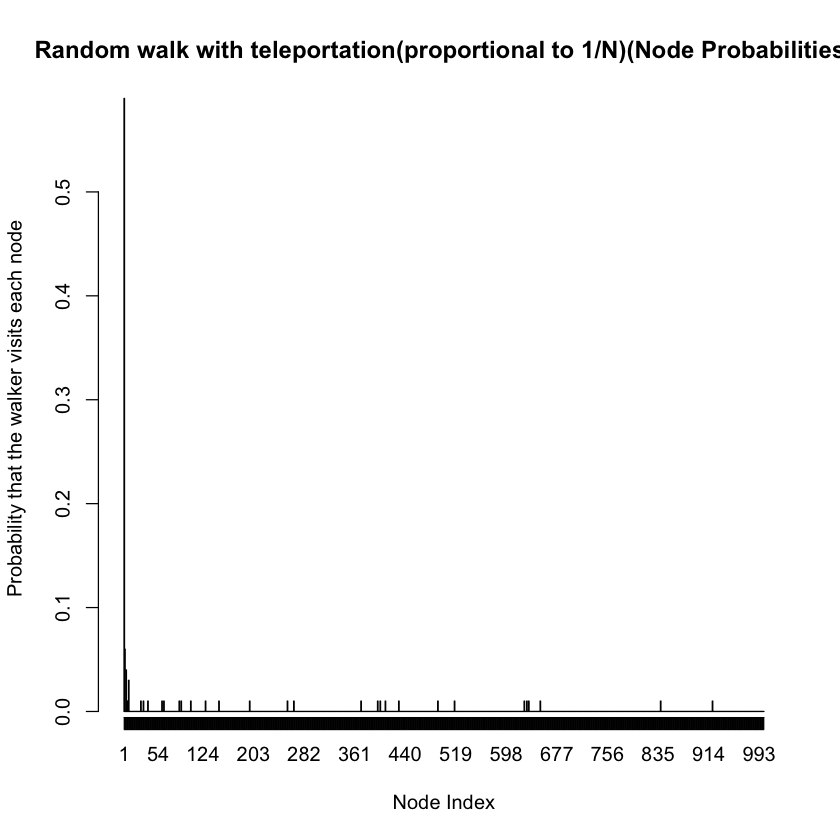

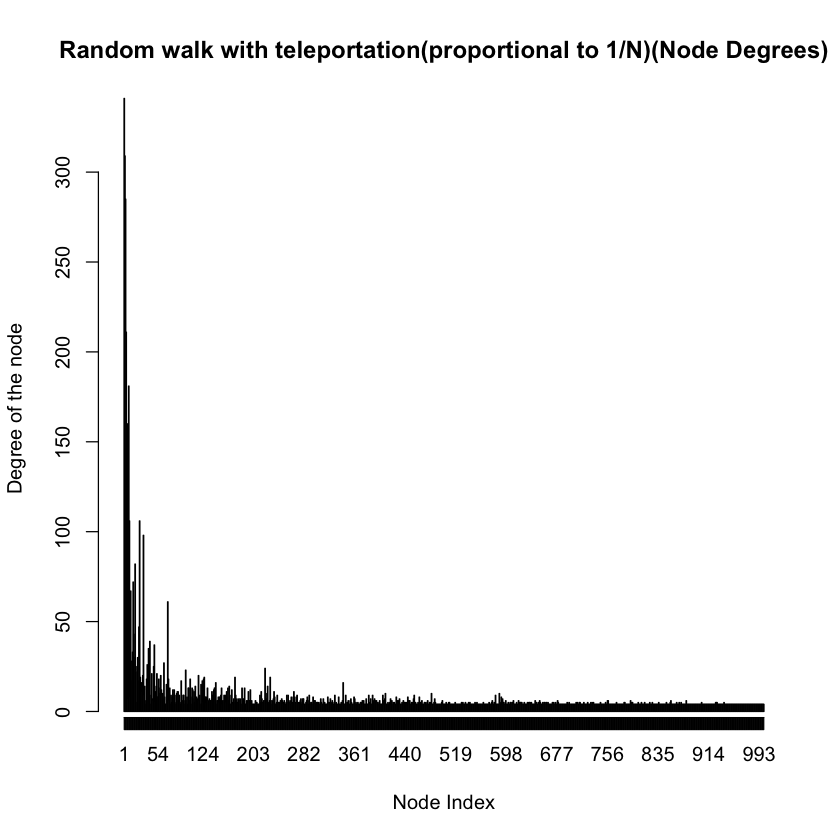

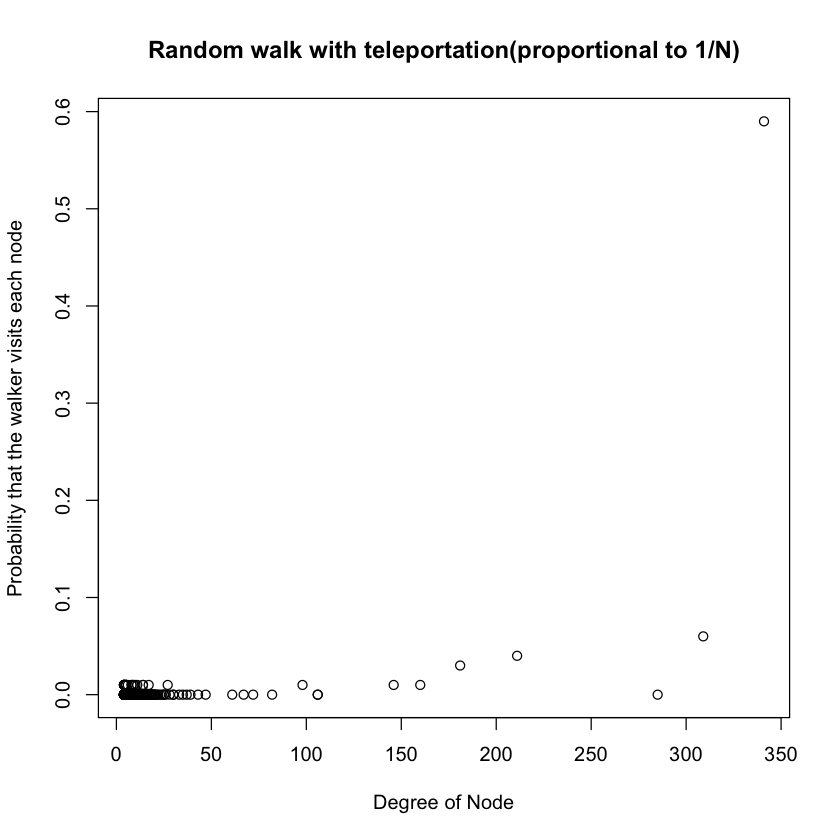

In [147]:
mp1 <- barplot(pageRankVector22, main='Random walk with teleportation(proportional to 1/N)(Node Probabilities)', xlab='Node Index', ylab='Probability that the walker visits each node')
axis(1,at=mp1,labels=seq(1,1000,1))
mp2 <- barplot(degrees, main='Random walk with teleportation(proportional to 1/N)(Node Degrees)', xlab='Node Index', ylab='Degree of the node')
axis(1,at=mp2,labels=seq(1,1000,1))
plot(degrees, pageRankVector22, main='Random walk with teleportation(proportional to 1/N)', xlab='Degree of Node', ylab='Probability that the walker visits each node')

## 2.4 (a)

In [148]:
# numNodes = 1000
# prGraphRW <- barabasi.game(numNodes, m=4, directed=T)
# transition_matrix = create_transition_matrix(prGraphRW)

# print(transition_matrix)

nodeProbs = rep(0,numNodes)
numStepsRandomWalk = 100
nItr = 100
alpha=0.15

d = 1 - alpha
# rep_pr = repmat(pageRankVector, numNodes, 1)
# new_transition_matrix = d*transition_matrix + (1-d)*rep_pr
I = diag(numNodes)
new_transition_matrix = d*transition_matrix + (1-d)*I
# new_transition_matrix = new_transition_matrix + (1-d)
# print(new_transition_matrix)

for(itr in 1:nItr){
    startNode = sample(1:vcount(prGraphRW), 1)  
    lastNode = page_rank_random_walk(prGraphRW, numStepsRandomWalk, startNode, new_transition_matrix)
 
    nodeProbs[[lastNode]] = nodeProbs[[lastNode]]+1
}

pageRankVector31 = nodeProbs / nItr

adjList = as_adj_list(prGraphRW, mode="all")
degrees = c()

for (i in 1:vcount(prGraphRW)){
    degree = length(adjList[[i]])
    degrees = c(degrees, degree)
}

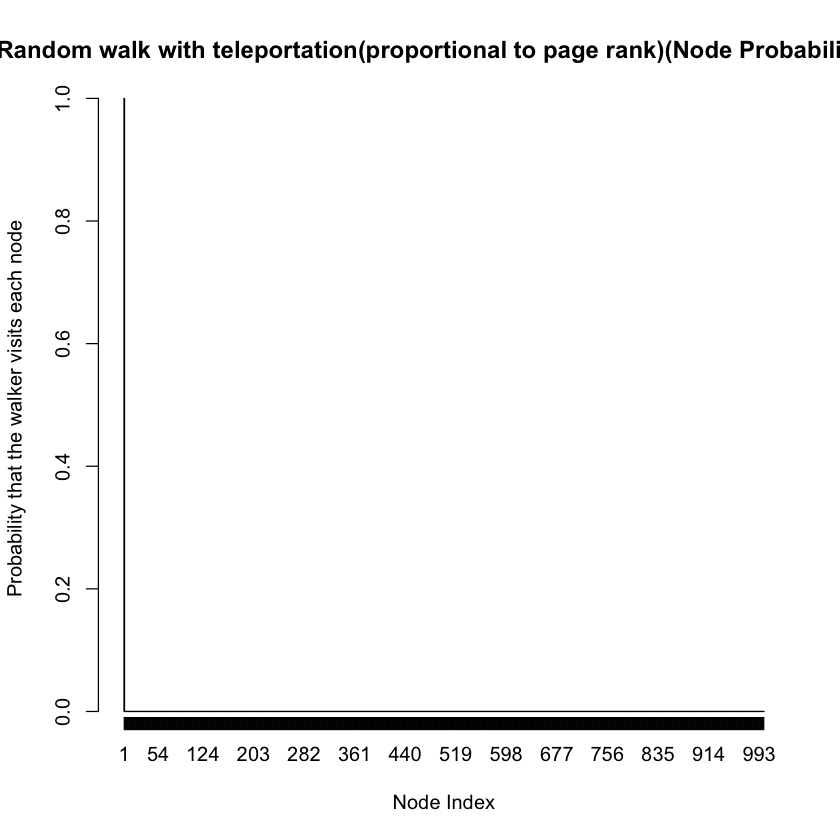

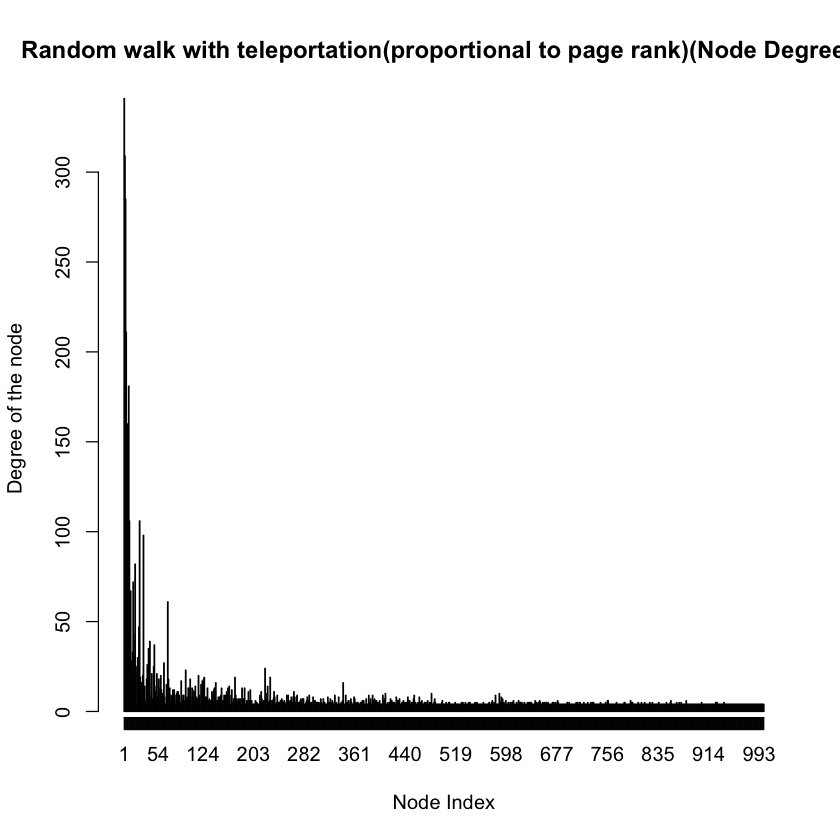

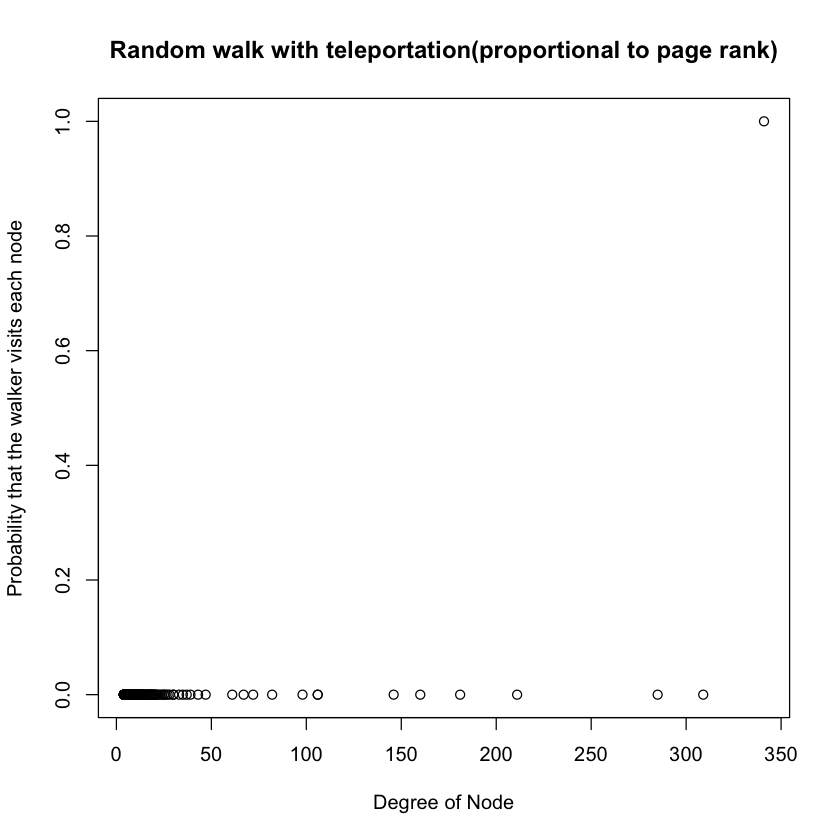

In [149]:
mp1 <- barplot(pageRankVector31, main='Random walk with teleportation(proportional to page rank)(Node Probabilities)', xlab='Node Index', ylab='Probability that the walker visits each node')
axis(1,at=mp1,labels=seq(1,1000,1))
mp2 <- barplot(degrees, main='Random walk with teleportation(proportional to page rank)(Node Degrees)', xlab='Node Index', ylab='Degree of the node')
axis(1,at=mp2,labels=seq(1,1000,1))
plot(degrees, pageRankVector31, main='Random walk with teleportation(proportional to page rank)', xlab='Degree of Node', ylab='Probability that the walker visits each node')

In [112]:
# prGraphRW <- barabasi.game(100, m=4, directed=T)
# transition_matrix = create_transition_matrix(prGraphRW)

# startNode = sample(1:vcount(prGraphRW), 1)  

# numStepsRandomWalk = 100
# alpha=0.15
# seq = page_rank_random_walk_teleportation(prGraphRW, numStepsRandomWalk, startNode, alpha, transition_matrix)

# # degrees = degree(prGraphRW)
# res = hist(seq, breaks = 100)

# visitCounts = res$counts

# adjList = as_adj_list(prGraphRW, mode="all")
# degrees = c()

# for (i in 1:vcount(prGraphRW)){
#     degree = length(adjList[[i]])
#     degrees = c(degrees, degree)
# }

# hist(degrees, breaks = 100)

# probsVisitCounts = visitCounts / numStepsRandomWalk

# degrees
# seq

In [117]:
# prGraphRW <- barabasi.game(100, m=4, directed=T)

# pageRankVector = page_rank(prGraphRW, algo = "power", vids = V(prGraphRW), directed = TRUE)

# startNode = sample(1:vcount(prGraphRW), 1)  

# numStepsRandomWalk = 100
# alpha=0.15
# seq = page_rank_random_walk_personalised_teleportation(prGraphRW, numStepsRandomWalk, startNode, alpha, pageRankVector)

# # degrees = degree(prGraphRW)
# res = hist(seq, breaks = 100)

# visitCounts = res$counts

# adjList = as_adj_list(prGraphRW, mode="all")
# degrees = c()

# for (i in 1:vcount(prGraphRW)){
#     degree = length(adjList[[i]])
#     degrees = c(degrees, degree)
# }

# hist(degrees, breaks = 100)

# probsVisitCounts = visitCounts / numStepsRandomWalk

# degrees
# seq

## 2.4(b)

In [151]:
page_rank_random_walk_personalised_median_teleportation = function (g, num_steps, start_node, alpha, pageRankVector, medianNode1, medianNode2, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)

    adjList = as_adj_list(g, mode="out")
    rwSeq = c()    
    v = start_node
    for(i in 1:num_steps){
        rwSeq = c(rwSeq, v)
        
        degree = length(adjList[[v]])
        
#         if (degree == 0){
#             rs = sample(0:1, 1)
            
#             if (rs == 0){
#                 v = medianNode1
#             } else {
#                 v = medianNode2
#             }
#         } else {
        alphaSample = sample(0:100,1)
        if (alphaSample/100 < alpha){
            rs = sample(0:1, 1)

            if (rs == 0){
                v = medianNode1
            } else {
                v = medianNode2
            }
        } else {
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)                
        }
#         }
    }
    
    return(v)
}

In [152]:
# numNodes = 1000
# prGraphRW <- barabasi.game(numNodes, m=4, directed=T)
# transition_matrix = create_transition_matrix(prGraphRW)

nodeProbs = rep(0,numNodes)
numStepsRandomWalk = 100
nItr = 100
alpha=0.15

medians = sample(2:vcount(prGraphRW), 2)
medianNode1 = medians[[1]]
medianNode2 = medians[[2]]


for(itr in 1:nItr){
    startNode = sample(1:vcount(prGraphRW), 1)  
    lastNode = page_rank_random_walk_personalised_median_teleportation(prGraphRW, numStepsRandomWalk, startNode, alpha, pageRankVector, medianNode1, medianNode2, transition_matrix)
 
    nodeProbs[[lastNode]] = nodeProbs[[lastNode]]+1
}
pageRankVector4 = nodeProbs / nItr
adjList = as_adj_list(prGraphRW, mode="all")
degrees = c()

for (i in 1:vcount(prGraphRW)){
    degree = length(adjList[[i]])
    degrees = c(degrees, degree)
}

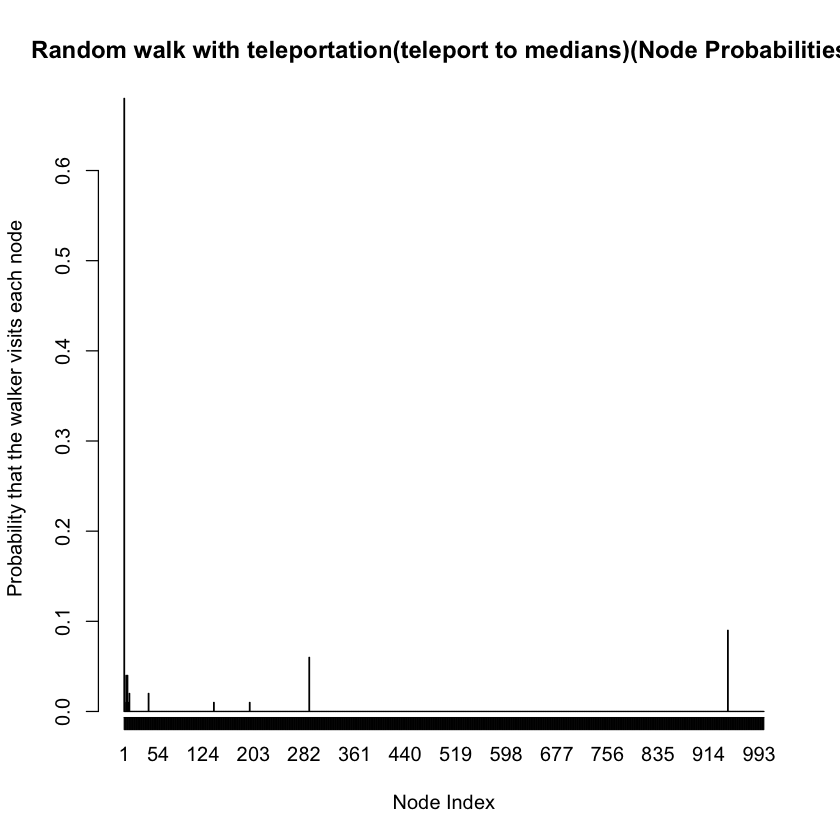

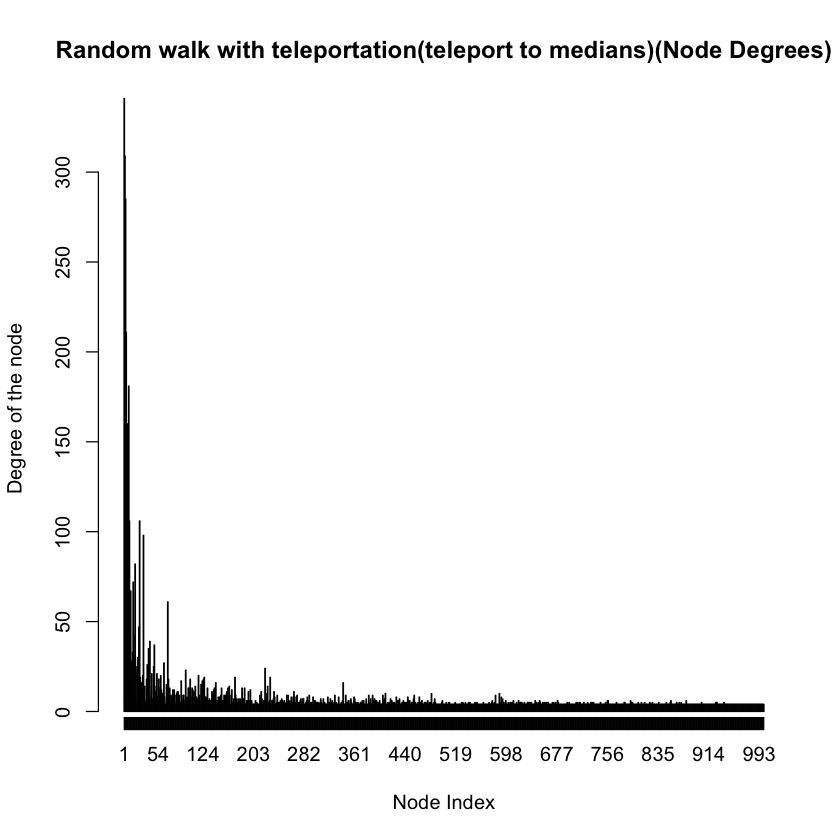

[1] 944
[1] 290


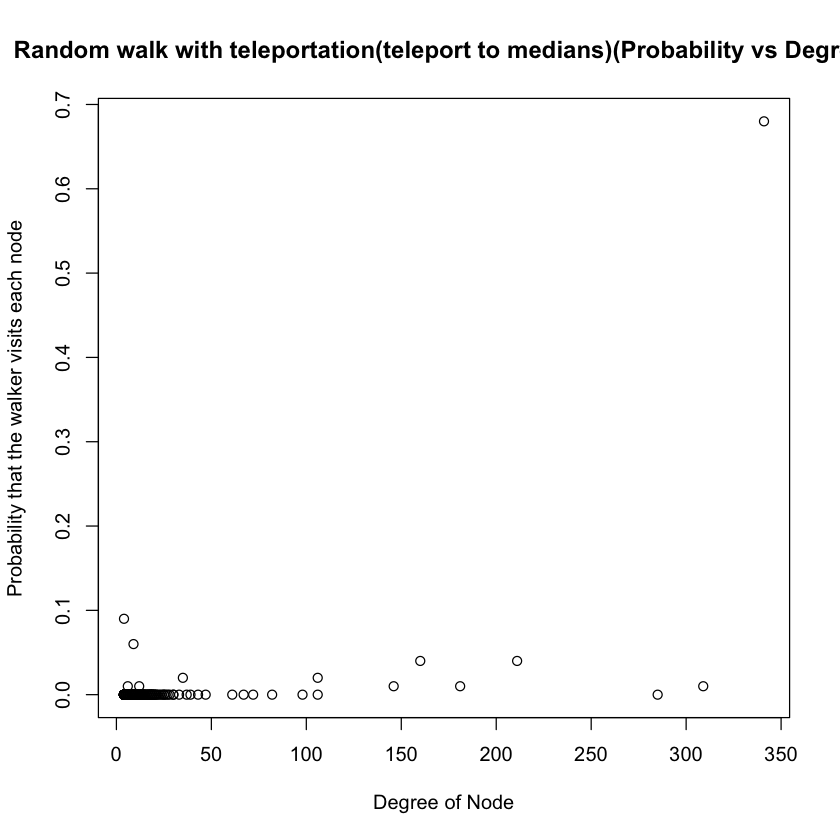

In [153]:
mp1 <- barplot(pageRankVector4, main='Random walk with teleportation(teleport to medians)(Node Probabilities)', xlab='Node Index', ylab='Probability that the walker visits each node')
axis(1,at=mp1,labels=seq(1,1000,1))
mp2 <- barplot(degrees, main='Random walk with teleportation(teleport to medians)(Node Degrees)', xlab='Node Index', ylab='Degree of the node')
axis(1,at=mp2,labels=seq(1,1000,1))
plot(degrees, pageRankVector4, main='Random walk with teleportation(teleport to medians)(Probability vs Degree)', xlab='Degree of Node', ylab='Probability that the walker visits each node')
print(medianNode1)
print(medianNode2)

In [178]:
# numNodes = 1000
# prGraphRW <- barabasi.game(numNodes, m=4, directed=T)
# transition_matrix = create_transition_matrix(prGraphRW)

nodeProbs = rep(0,numNodes)
numStepsRandomWalk = 100
nItr = 100
alpha=0.15

zeros = rep(0,numNodes)
medians = sample(2:vcount(prGraphRW), 2)
medianNode1 = medians[[1]]
medianNode2 = medians[[2]]
zeros[[medianNode1]] = 0.5
zeros[[medianNode2]] = 0.5

d = 1 - alpha
rep_pr = repmat(zeros, numNodes, 1)
new_transition_matrix = d*transition_matrix + (1-d)*rep_pr

# print(new_transition_matrix)

for(itr in 1:nItr){
    startNode = sample(1:vcount(prGraphRW), 1)  
    lastNode = page_rank_random_walk(prGraphRW, numStepsRandomWalk, startNode, new_transition_matrix)
 
    nodeProbs[[lastNode]] = nodeProbs[[lastNode]]+1
}

pageRankVector4 = nodeProbs / nItr

adjList = as_adj_list(prGraphRW, mode="all")
degrees = c()

for (i in 1:vcount(prGraphRW)){
    degree = length(adjList[[i]])
    degrees = c(degrees, degree)
}

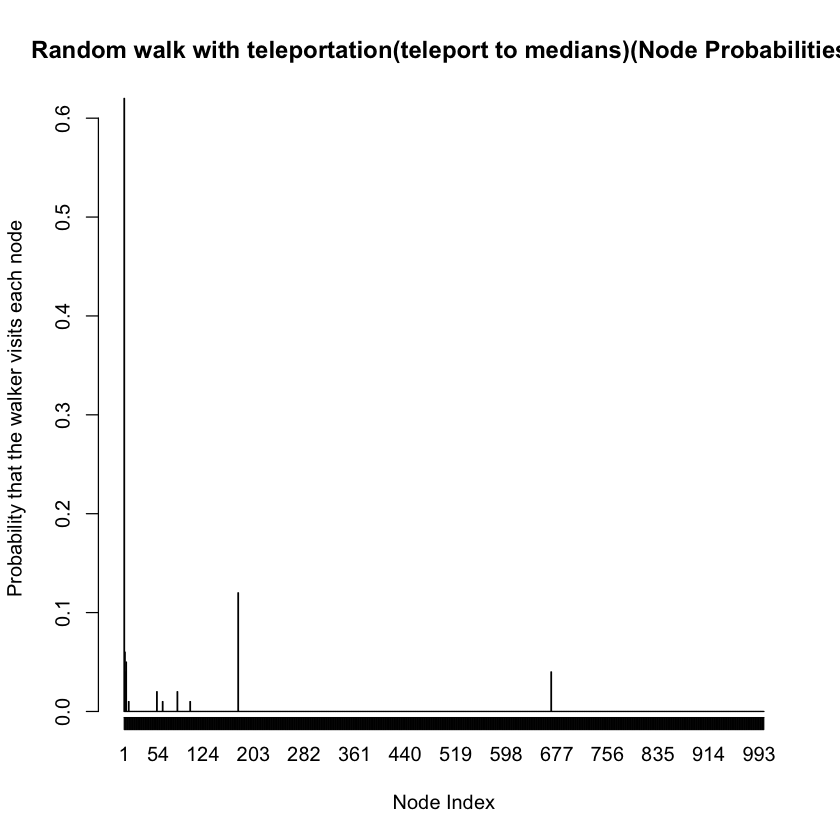

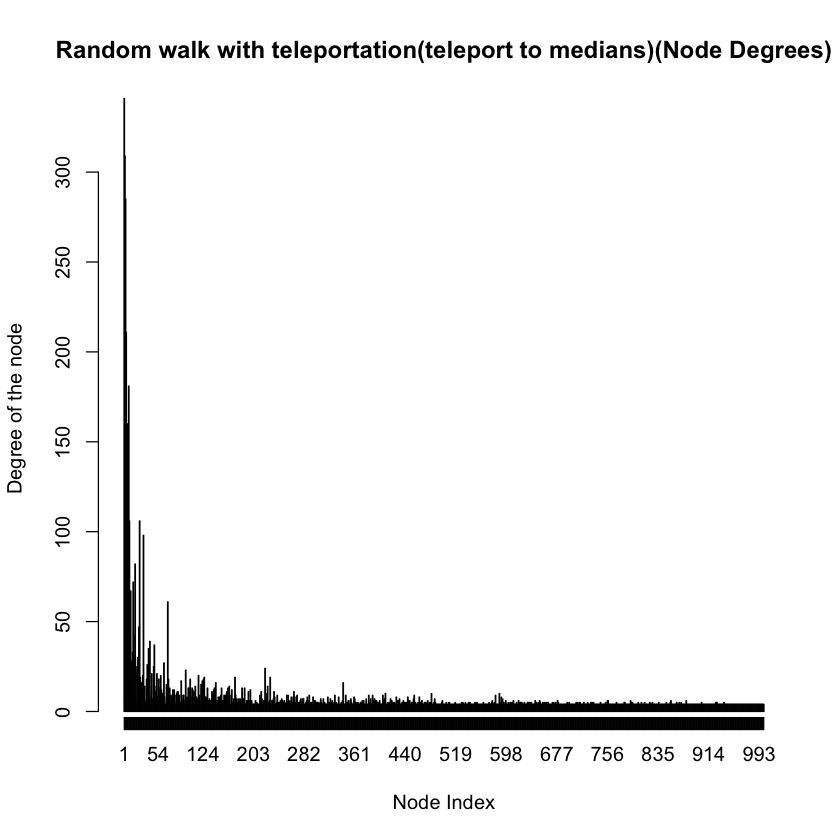

[1] 668
[1] 4
[1] 179
[1] 5


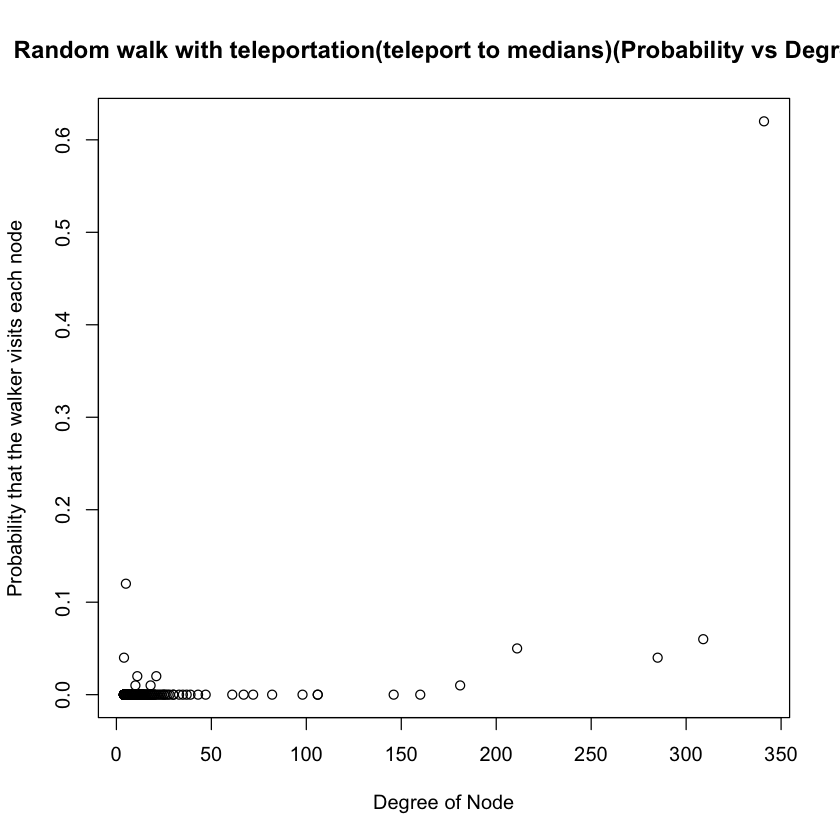

In [179]:
mp1 <- barplot(pageRankVector4, main='Random walk with teleportation(teleport to medians)(Node Probabilities)', xlab='Node Index', ylab='Probability that the walker visits each node')
axis(1,at=mp1,labels=seq(1,1000,1))
mp2 <- barplot(degrees, main='Random walk with teleportation(teleport to medians)(Node Degrees)', xlab='Node Index', ylab='Degree of the node')
axis(1,at=mp2,labels=seq(1,1000,1))
plot(degrees, pageRankVector4, main='Random walk with teleportation(teleport to medians)(Probability vs Degree)', xlab='Degree of Node', ylab='Probability that the walker visits each node')

print(medianNode1)
print(degrees[[medianNode1]])
print(medianNode2)
print(degrees[[medianNode2]])
